In [1]:
import os
import re
import csv
import numpy as np
import pandas as pd
import scipy.interpolate as interp
import glob
import matplotlib.pyplot as plt
import matplotlib
# Matplotlib settings
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

In [3]:
# Base directory where all the folders are located
base_dir = "/home/sanjana/apps/Lorene/Codes/"

# List of folder names
folders = [
    "Nrotstar_(APR100)_(0.06-0.9)_44Hz_nrot",
    "Nrotstar_(BBB100)_(0.05-0.8)_44Hz_nrot",
    "Nrotstar_(BPAL100)_(0.06-0.6)_44Hz_nrot",
    "Nrotstar_(FPS100)_(0.04-0.9)_44Hz_nrot",
    "Nrotstar_(Glendenning100)_(0.06-0.68)_44Hz_nrot",
    "Nrotstar_(SLy100)_(0.04-0.9)_44Hz_nrot",
    "Nrotstar_(Balberg100)_(0.08-0.7)_44Hz_nrot"
]

# Define the quantities to extract and their corresponding regex patterns
patterns = {
    "Central enthalpy": r"Central enthalpy\s*:\s*([\d.eE+-]+) c\^2",
    "Central proper baryon density": r"Central proper baryon density\s*:\s*([\d.eE+-]+) x 0.1 fm\^-3",
    "Central proper energy density": r"Central proper energy density\s*:\s*([\d.eE+-]+) rho_nuc c\^2",
    "Central pressure": r"Central pressure\s*:\s*([\d.eE+-]+) rho_nuc c\^2",
    "Coordinate equatorial radius": r"Coordinate equatorial radius \(phi=0\) a1\s*=\s*([\d.eE+-]+) km",
    "Coordinate polar radius": r"Coordinate polar radius a3\s*=\s*([\d.eE+-]+) km",
    "Baryon mass": r"Baryon mass\s*:\s*([\d.eE+-]+) M_sol",
    "Gravitational mass": r"Gravitational mass\s*:\s*([\d.eE+-]+) M_sol",
    "Omega": r"Omega\s*:\s*([\d.eE+-]+) rad/s",
    "f": r"f\s*:\s*([\d.eE+-]+) Hz",
    "Rotation period": r"Rotation period\s*:\s*([\d.eE+-]+) ms",
    "Compactness": r"Compactness G M_g /\(c\^2 R_circ\)\s*:\s*([\d.eE+-]+)",
    "Quadrupole moment Q": r"Quadrupole moment Q\s*:\s*([\d.eE+-]+) 10\^38 kg m\^2",
    "Angular momentum J": r"Angular momentum J\s*:\s*([\d.eE+-]+) G M_sol\^2 / c",
    "Moment of inertia": r"Moment of inertia\s*:\s*([\d.eE+-]+) 10\^38 kg m\^2",
    "Circumferential equatorial radius": r"Circumferential equatorial radius R_circ\s*:\s*([\d.eE+-]+) km",
    "Circumferential polar radius": r"Circumferential polar \(meridional\) radius R_circ_merid\s*:\s*([\d.eE+-]+) km",
    "Surface area": r"Surface area\s*:\s*([\d.eE+-]+) km\^2",
    "Mean radius": r"Mean radius\s*:\s*([\d.eE+-]+) km",
    "Coordinate equatorial radius r_eq": r"Coordinate equatorial radius r_eq\s*:\s*([\d.eE+-]+) km",
    "Redshift at the equator (forward)": r"Redshift at the equator \(forward\)\s*:\s*([\d.eE+-]+)",
    "Redshift at the equator (backward)": r"Redshift at the equator \(backward\)\s*:\s*([\d.eE+-]+)",
    "Redshift at the pole": r"Redshift at the pole\s*:\s*([\d.eE+-]+)"
}

# Process each main folder separately
for folder_name in folders:
    folder_path = os.path.join(base_dir, folder_name)

    # Check if folder exists
    if not os.path.exists(folder_path):
        print(f"Skipping {folder_name}: Folder not found.")
        continue

    # Generate CSV file name for this folder
    output_csv = f"{folder_name}_extracted_data.csv"

    # Open CSV file for writing
    with open(output_csv, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)

        # Write the header row
        header = ["Folder", "Subfolder (H value)", "File"] + list(patterns.keys())
        writer.writerow(header)

        # Iterate through subfolders (results_H_XXXXX)
        for subfolder_name in sorted(os.listdir(folder_path)):
            subfolder_path = os.path.join(folder_path, subfolder_name)

            # Ensure it's a directory and matches the expected format
            if os.path.isdir(subfolder_path) and subfolder_name.startswith("results_H_"):
                # Extract enthalpy value from folder name
                enthalpy_value = subfolder_name.replace("results_H_", "")

                # Define output.txt file path
                file_path = os.path.join(subfolder_path, "result.txt")

                # Check if output.txt exists
                if os.path.exists(file_path):
                    with open(file_path, "r") as file:
                        content = file.read()

                    # Extract values using regex
                    data_row = [folder_name, enthalpy_value, "result.txt"]  # Store folder and subfolder name
                    for key, pattern in patterns.items():
                        match = re.search(pattern, content)
                        data_row.append(match.group(1) if match else "N/A")  # Extracted value or "N/A" if not found

                    # Write data to CSV
                    writer.writerow(data_row)

    print(f"Extraction complete for {folder_name}! Data saved in {output_csv}.")

Extraction complete for Nrotstar_(APR100)_(0.06-0.9)_44Hz_nrot! Data saved in Nrotstar_(APR100)_(0.06-0.9)_44Hz_nrot_extracted_data.csv.
Extraction complete for Nrotstar_(BBB100)_(0.05-0.8)_44Hz_nrot! Data saved in Nrotstar_(BBB100)_(0.05-0.8)_44Hz_nrot_extracted_data.csv.
Extraction complete for Nrotstar_(BPAL100)_(0.06-0.6)_44Hz_nrot! Data saved in Nrotstar_(BPAL100)_(0.06-0.6)_44Hz_nrot_extracted_data.csv.
Extraction complete for Nrotstar_(FPS100)_(0.04-0.9)_44Hz_nrot! Data saved in Nrotstar_(FPS100)_(0.04-0.9)_44Hz_nrot_extracted_data.csv.
Extraction complete for Nrotstar_(Glendenning100)_(0.06-0.68)_44Hz_nrot! Data saved in Nrotstar_(Glendenning100)_(0.06-0.68)_44Hz_nrot_extracted_data.csv.
Extraction complete for Nrotstar_(SLy100)_(0.04-0.9)_44Hz_nrot! Data saved in Nrotstar_(SLy100)_(0.04-0.9)_44Hz_nrot_extracted_data.csv.
Extraction complete for Nrotstar_(Balberg100)_(0.08-0.7)_44Hz_nrot! Data saved in Nrotstar_(Balberg100)_(0.08-0.7)_44Hz_nrot_extracted_data.csv.


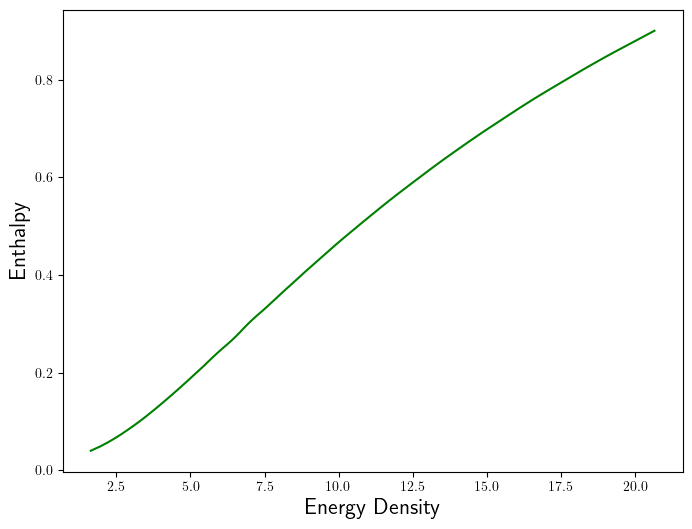

cutoff_index= 130
enthalpy= 130


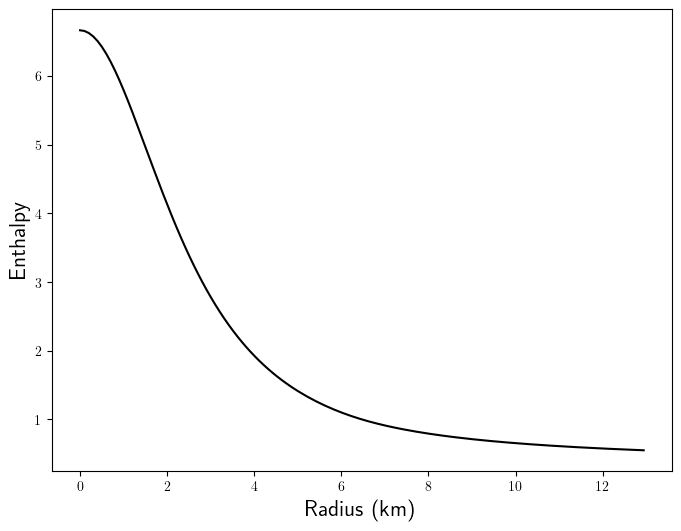

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.8236/radius_density_relation.csv


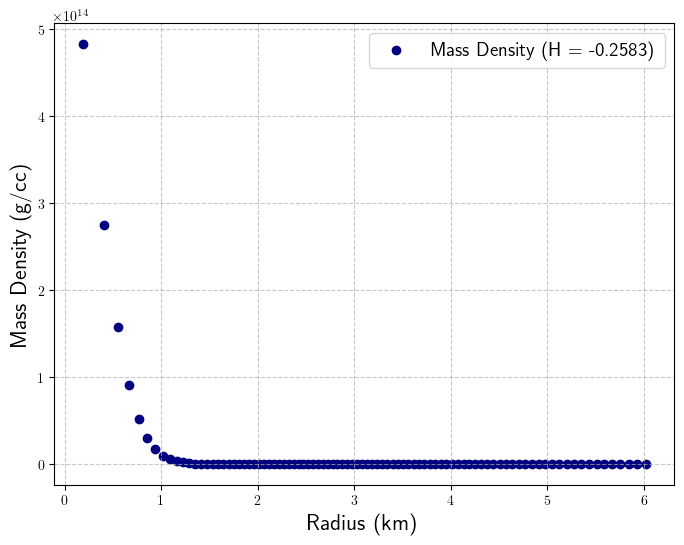

cutoff_index= 137
enthalpy= 137


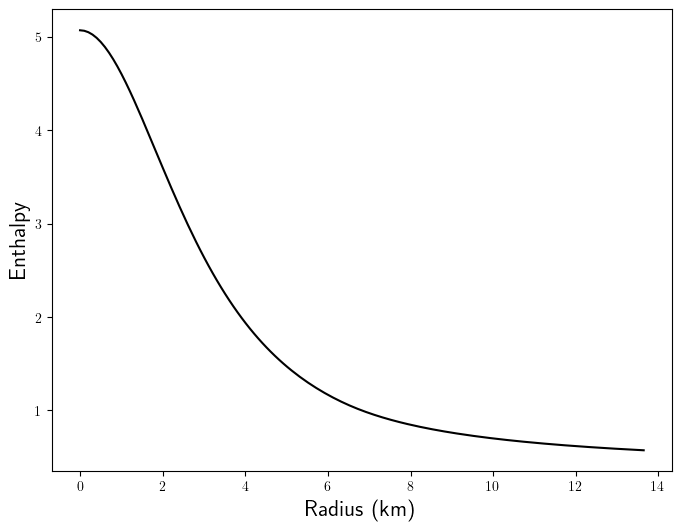

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7048/radius_density_relation.csv


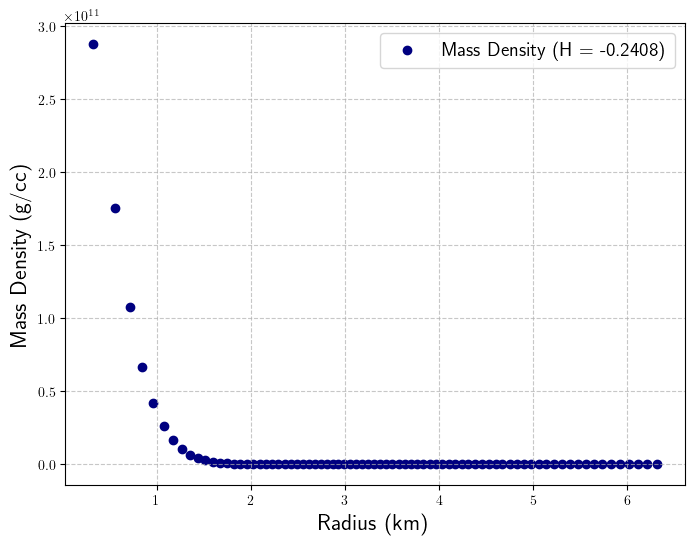

cutoff_index= 141
enthalpy= 141


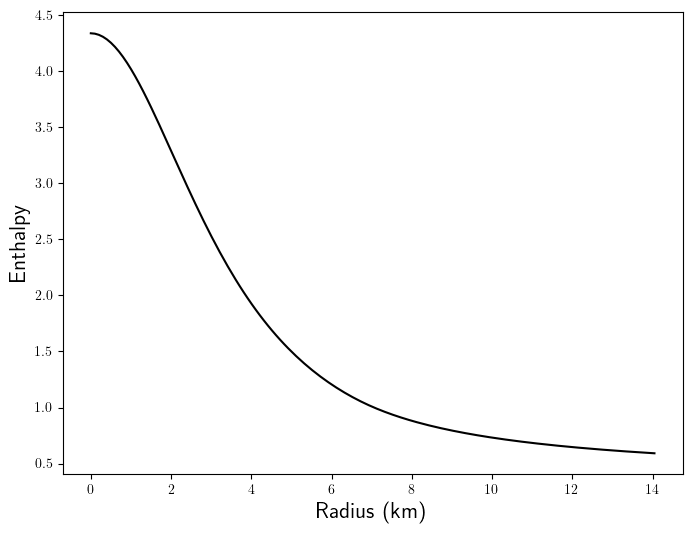

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6370/radius_density_relation.csv


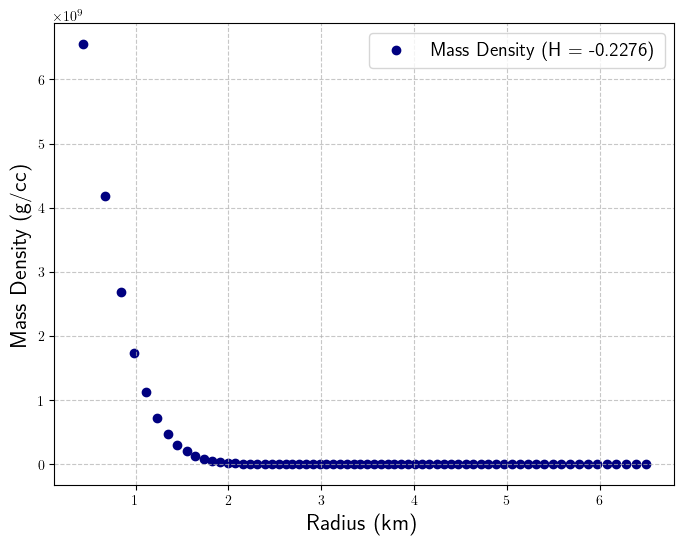

cutoff_index= 169
enthalpy= 169


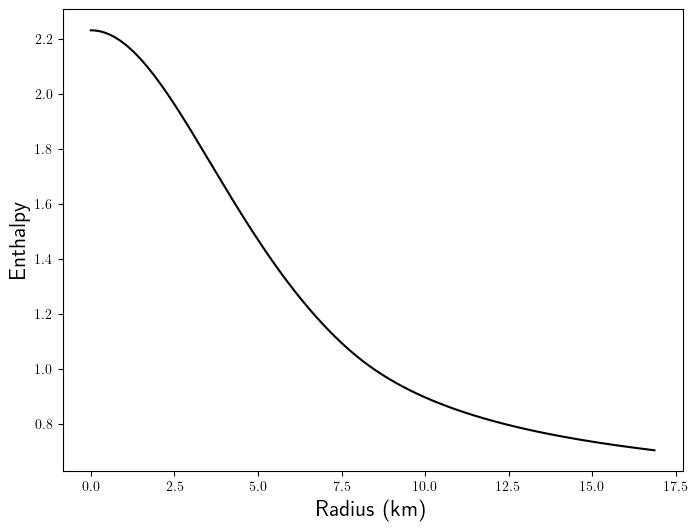

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3485/radius_density_relation.csv


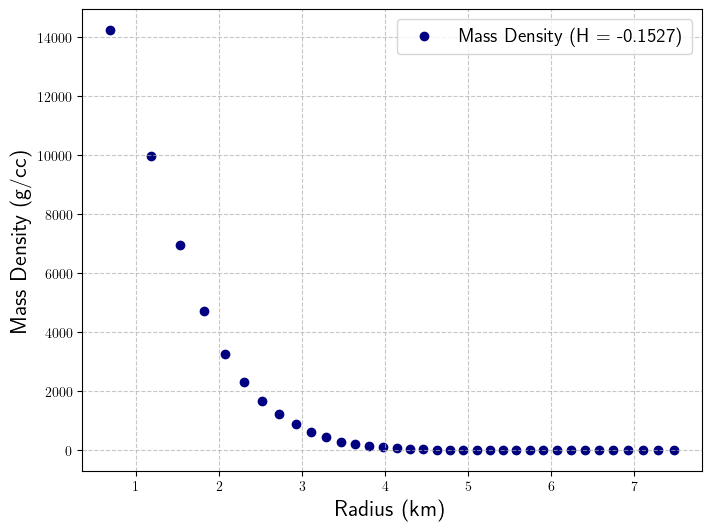

cutoff_index= 139
enthalpy= 139


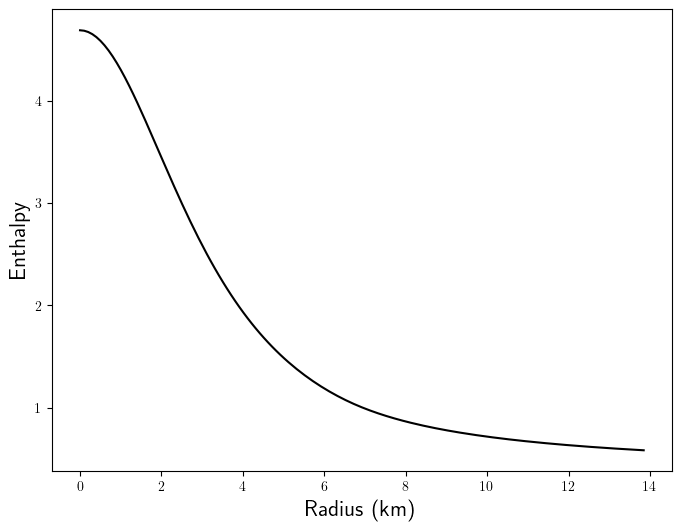

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6709/radius_density_relation.csv


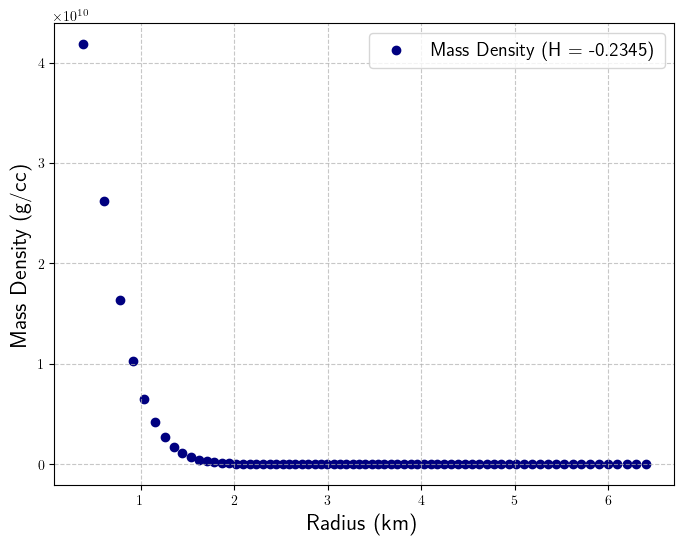

cutoff_index= 173
enthalpy= 173


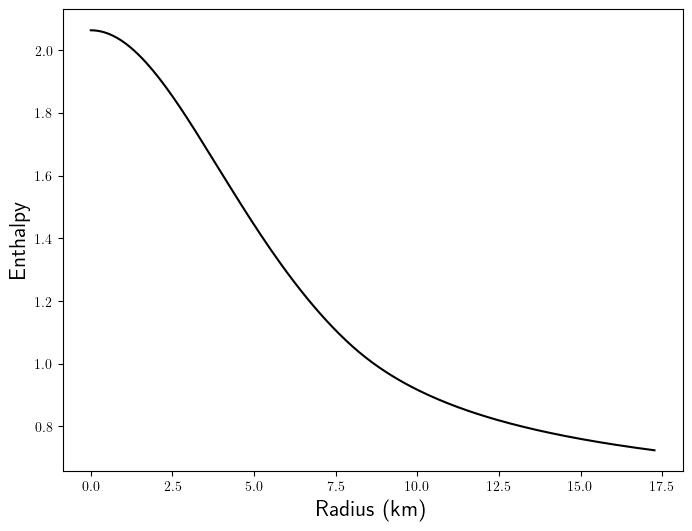

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3145/radius_density_relation.csv


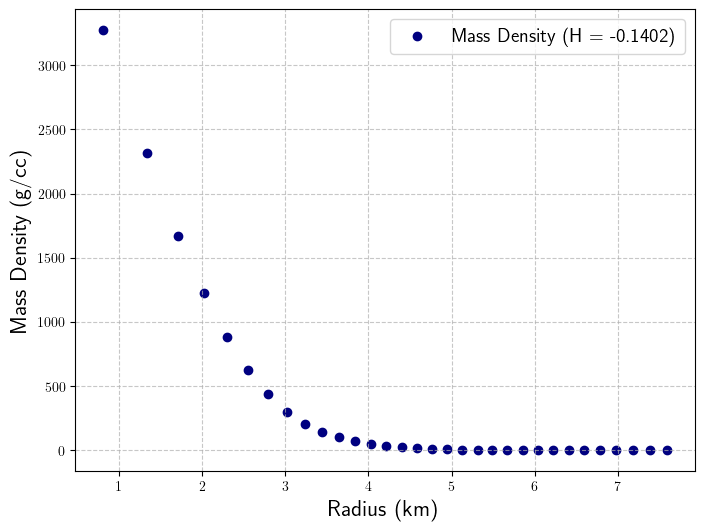

cutoff_index= 141
enthalpy= 141


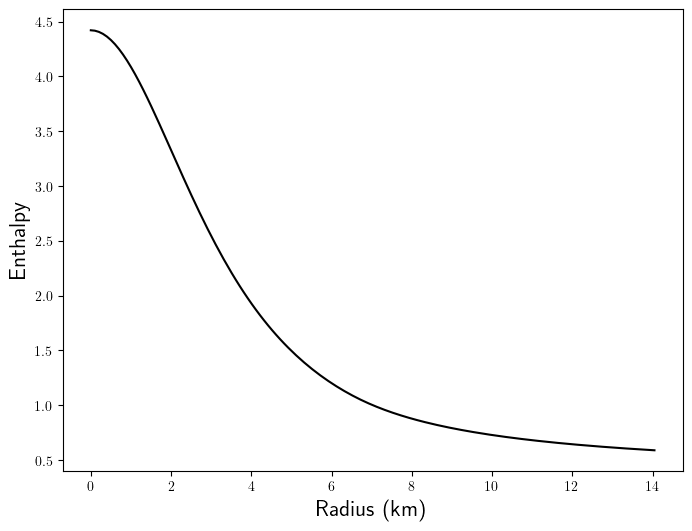

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6455/radius_density_relation.csv


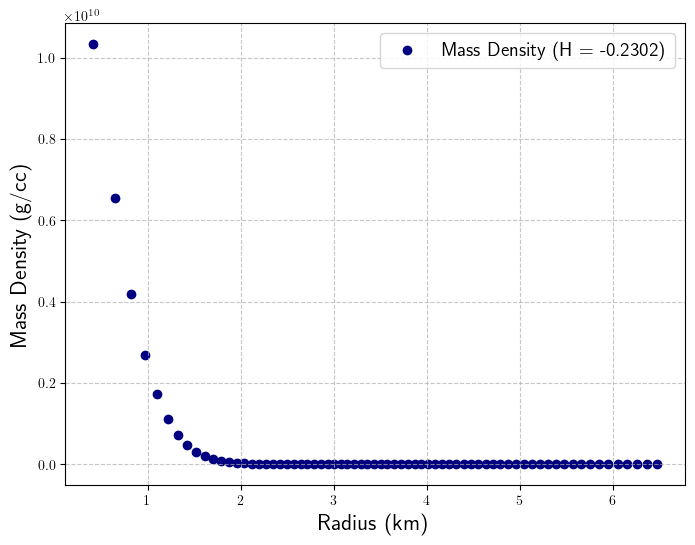

cutoff_index= 180
enthalpy= 180


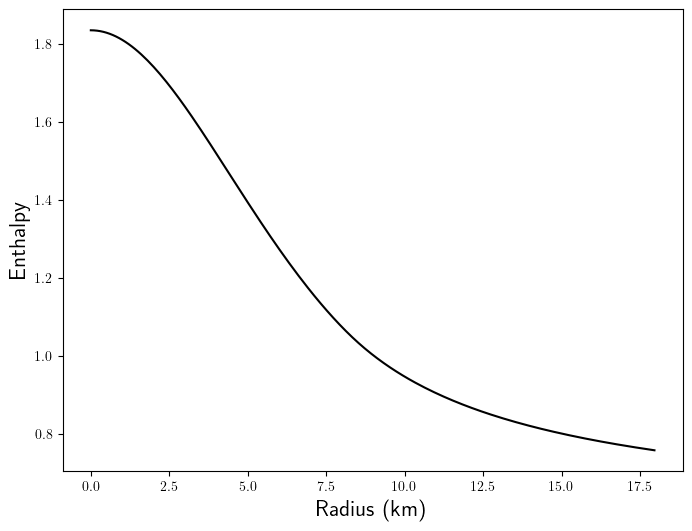

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2636/radius_density_relation.csv


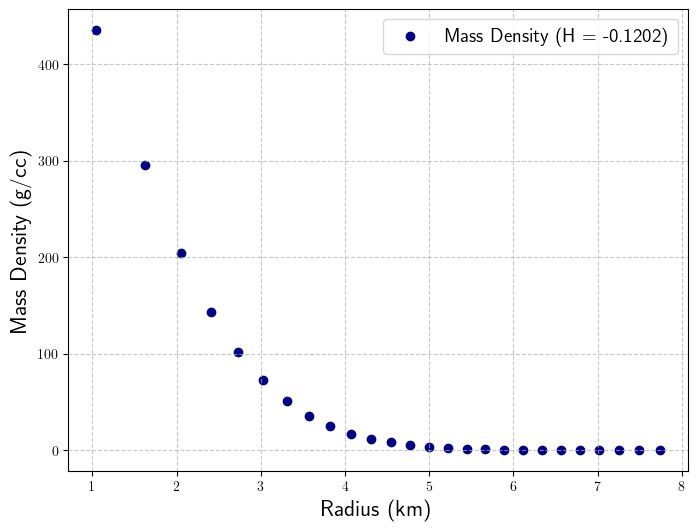

cutoff_index= 179
enthalpy= 179


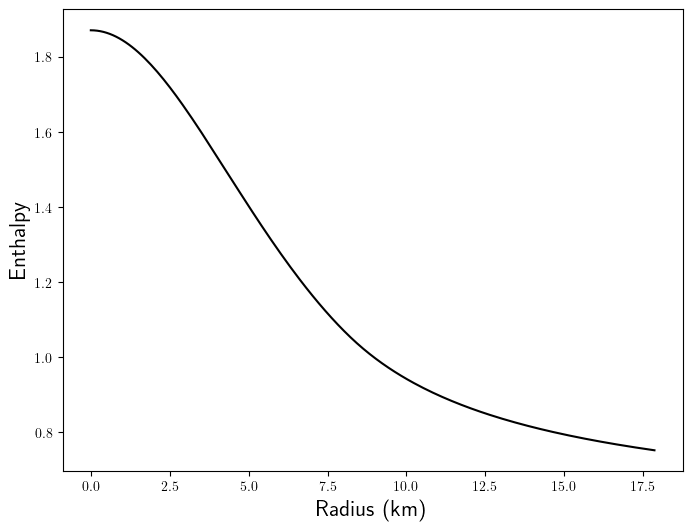

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2721/radius_density_relation.csv


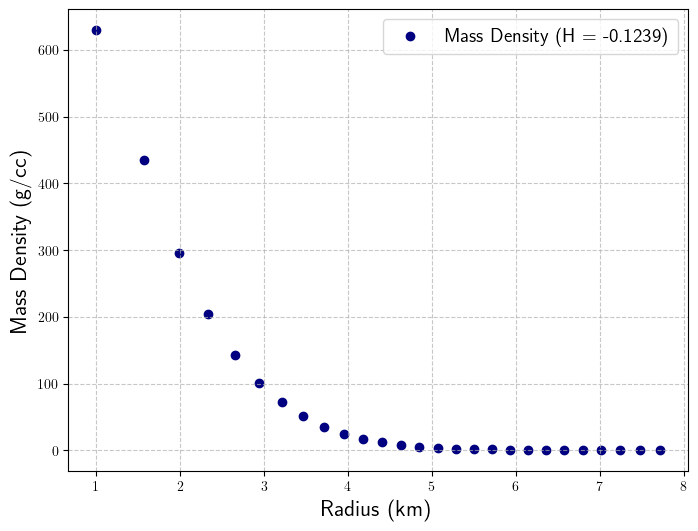

cutoff_index= 196
enthalpy= 196


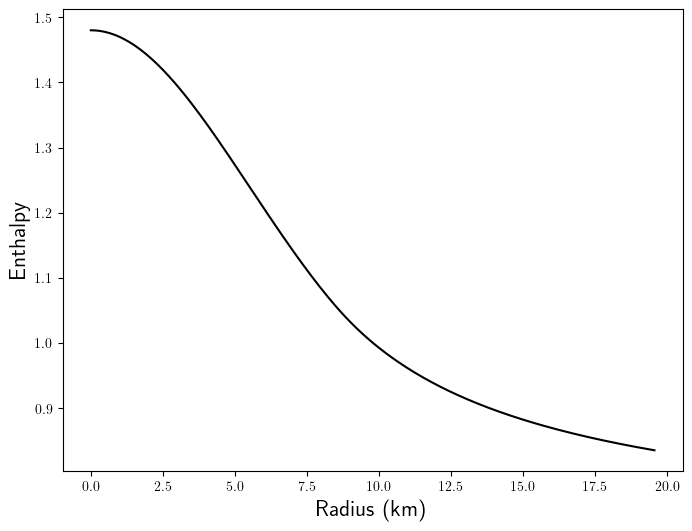

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1703/radius_density_relation.csv


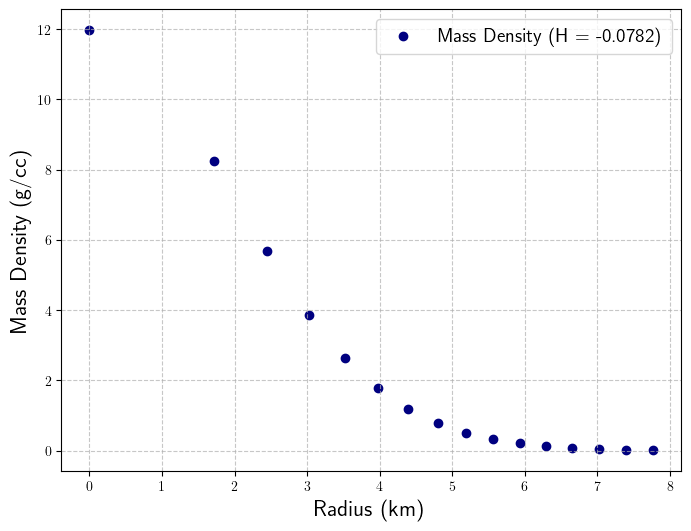

cutoff_index= 174
enthalpy= 174


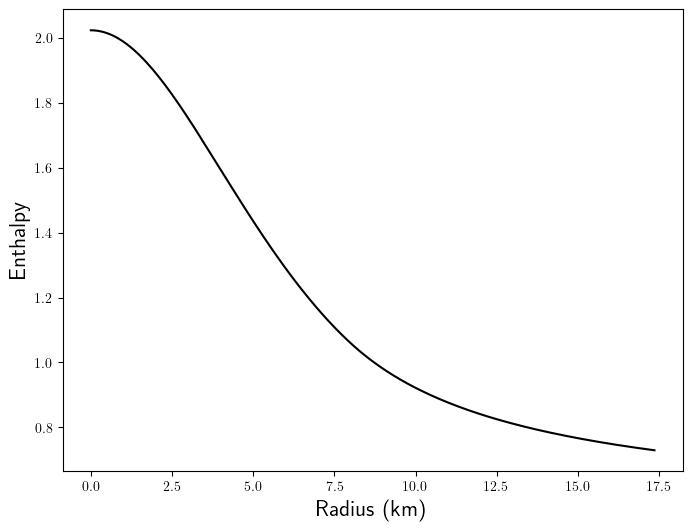

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3061/radius_density_relation.csv


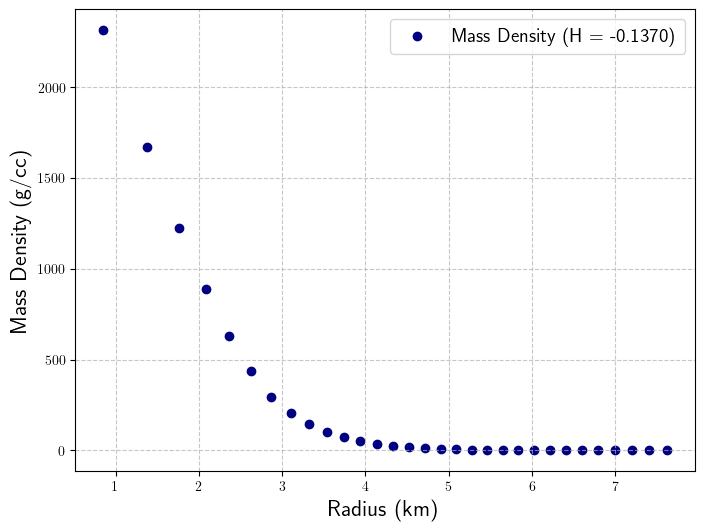

cutoff_index= 207
enthalpy= 207


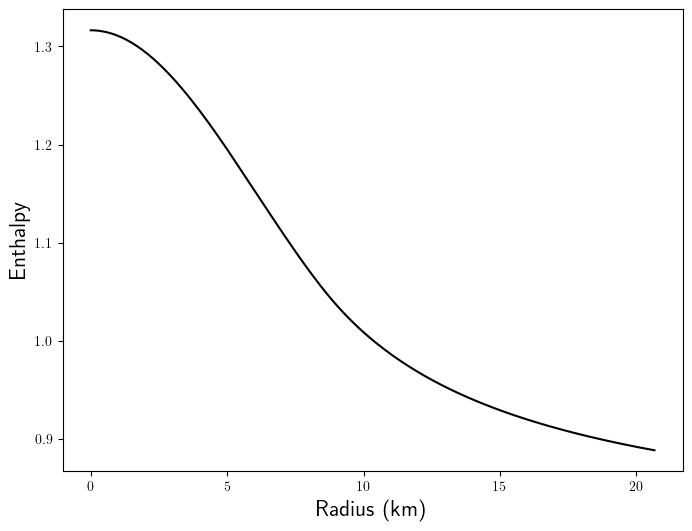

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1194/radius_density_relation.csv


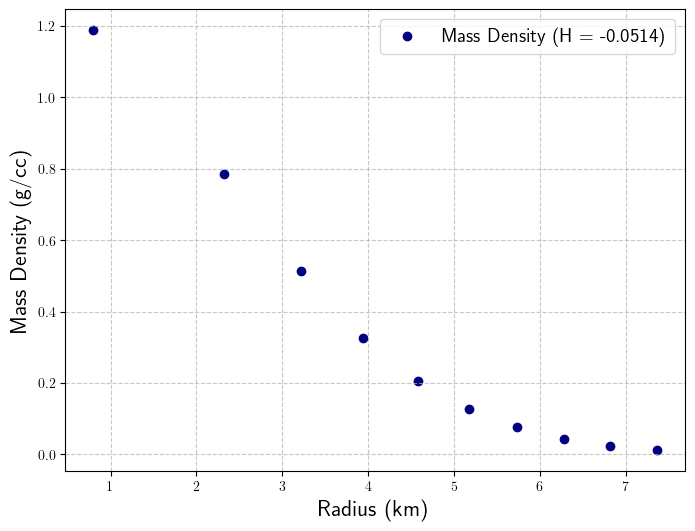

cutoff_index= 142
enthalpy= 142


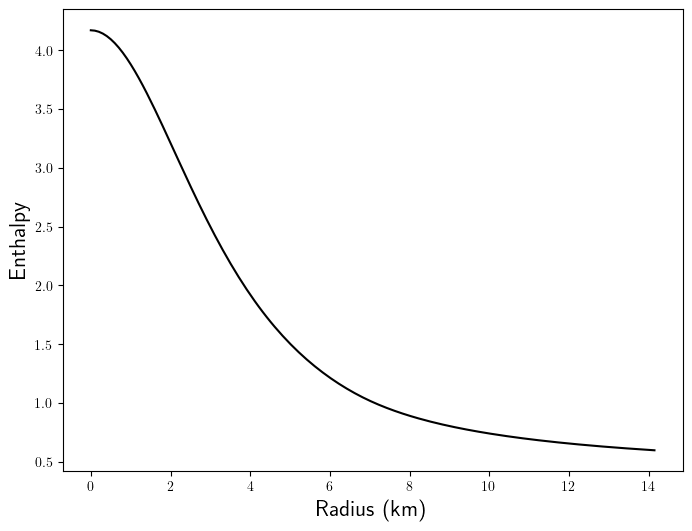

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6200/radius_density_relation.csv


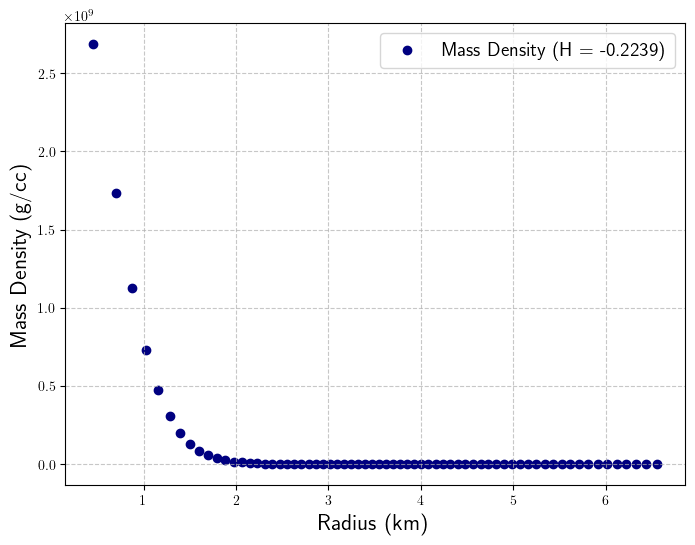

cutoff_index= 147
enthalpy= 147


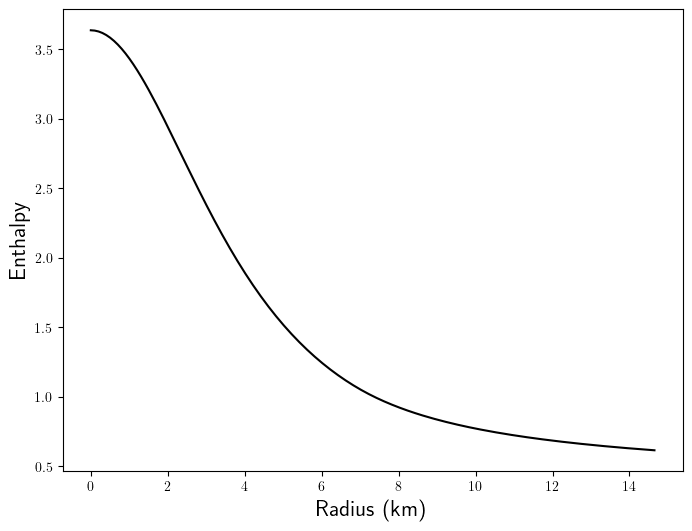

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5606/radius_density_relation.csv


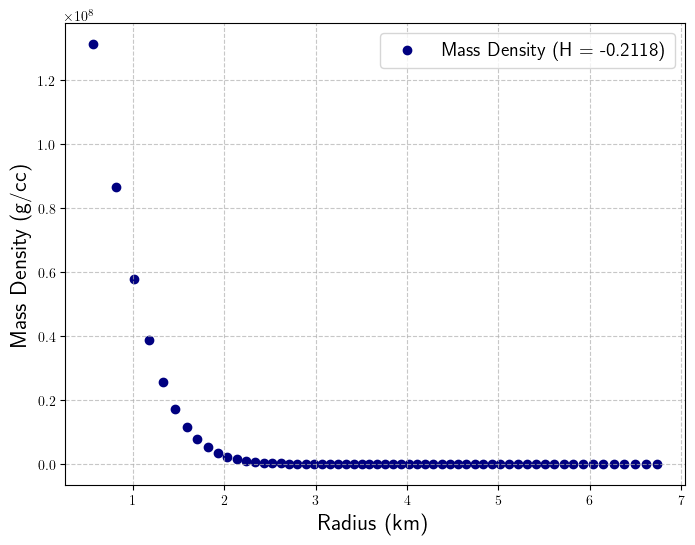

cutoff_index= 127
enthalpy= 127


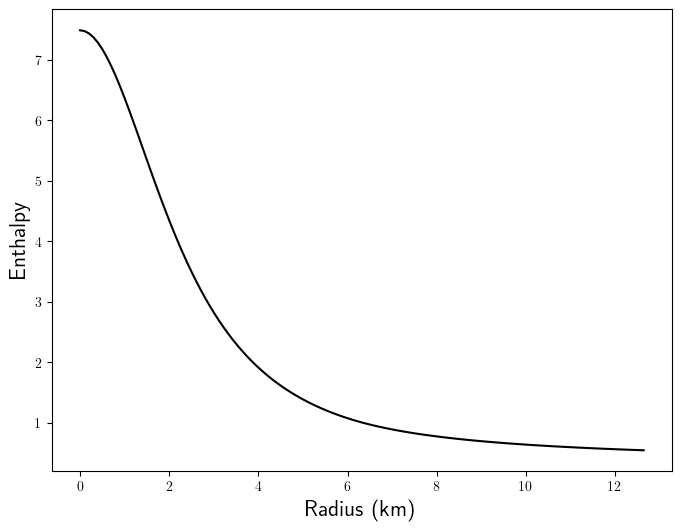

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.8745/radius_density_relation.csv


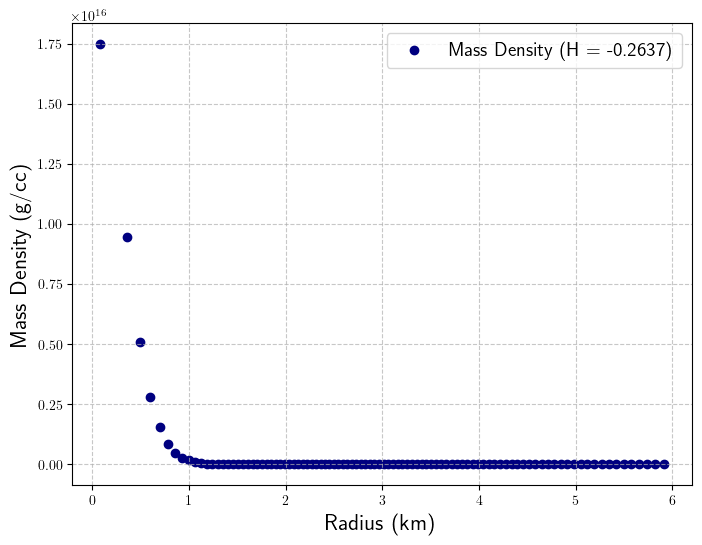

cutoff_index= 146
enthalpy= 146


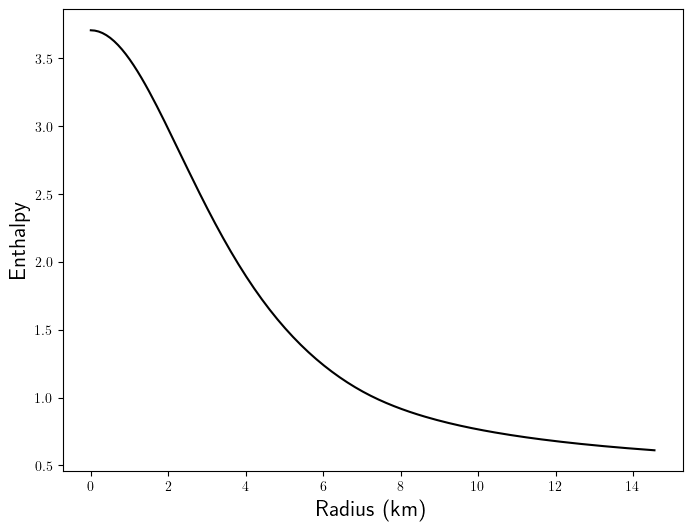

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5691/radius_density_relation.csv


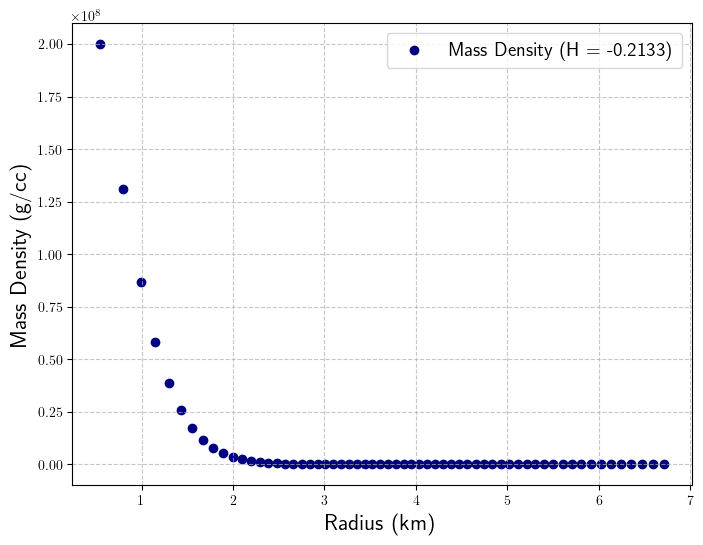

cutoff_index= 216
enthalpy= 216


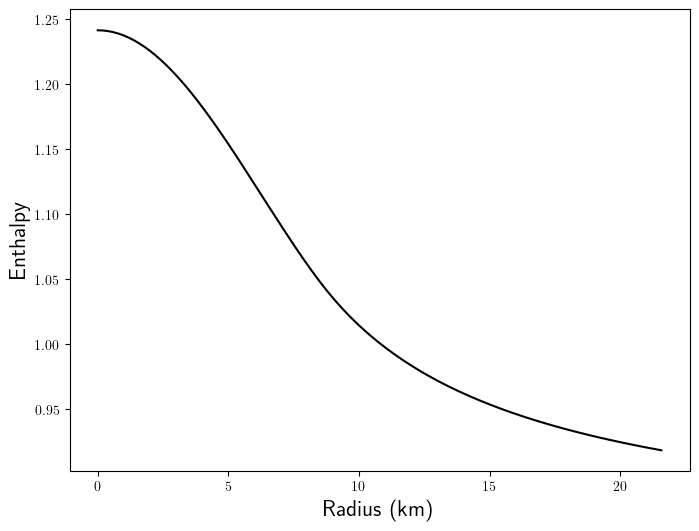

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.0939/radius_density_relation.csv


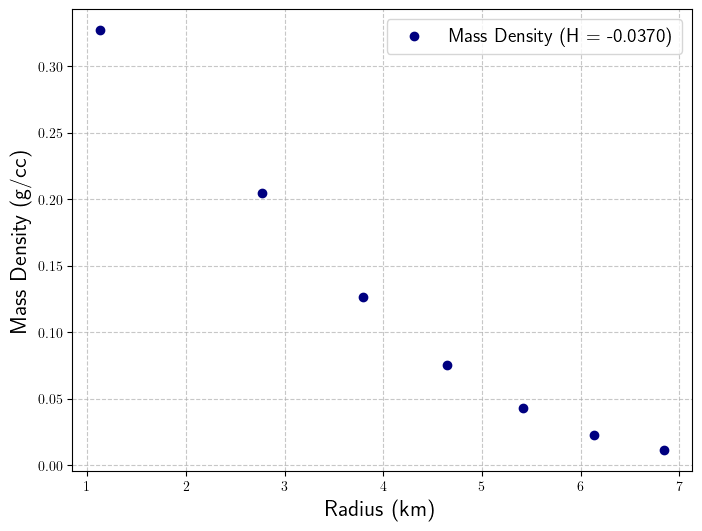

cutoff_index= 205
enthalpy= 205


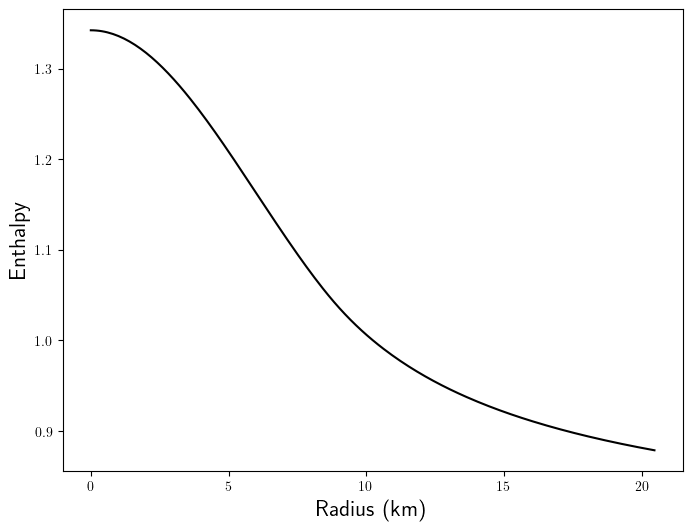

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1279/radius_density_relation.csv


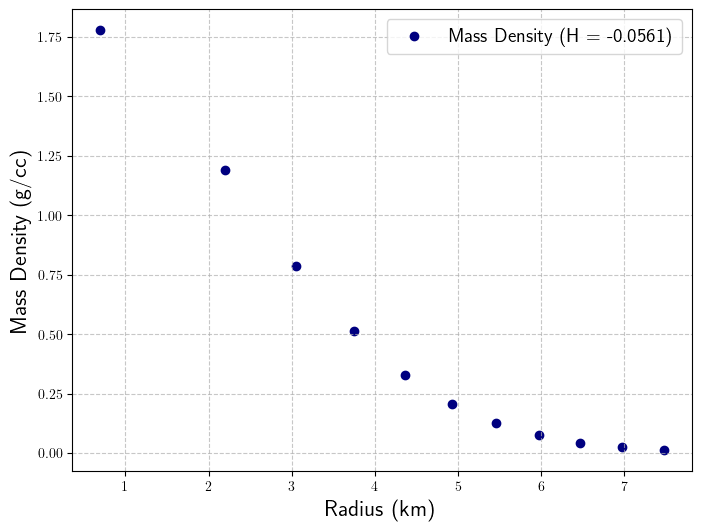

cutoff_index= 154
enthalpy= 154


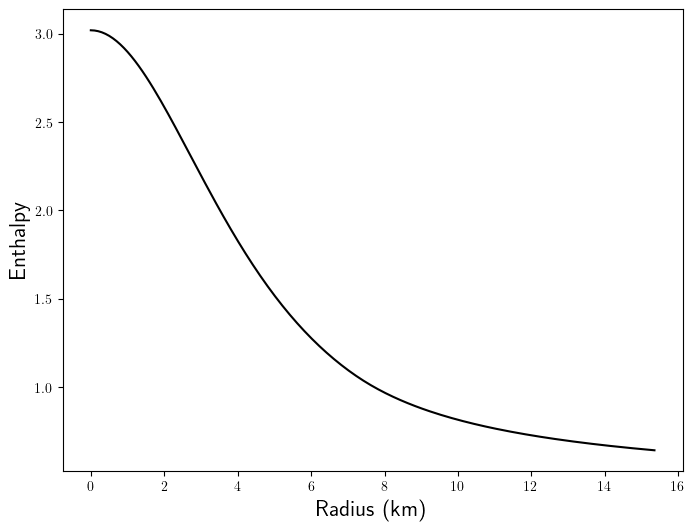

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4800/radius_density_relation.csv


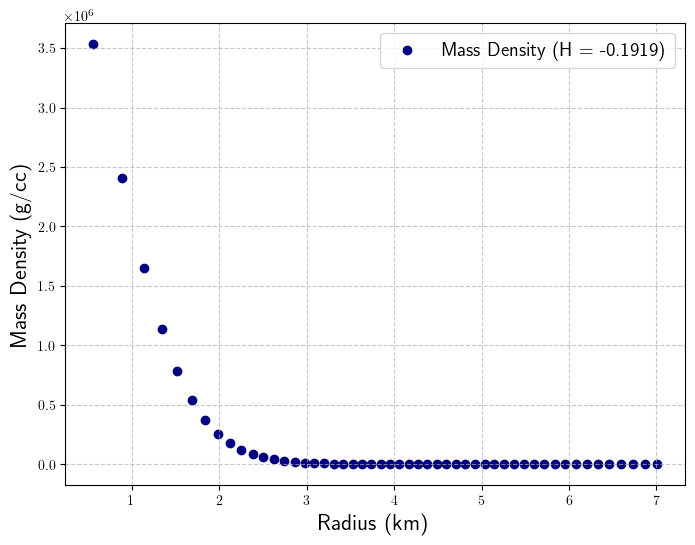

cutoff_index= 190
enthalpy= 190


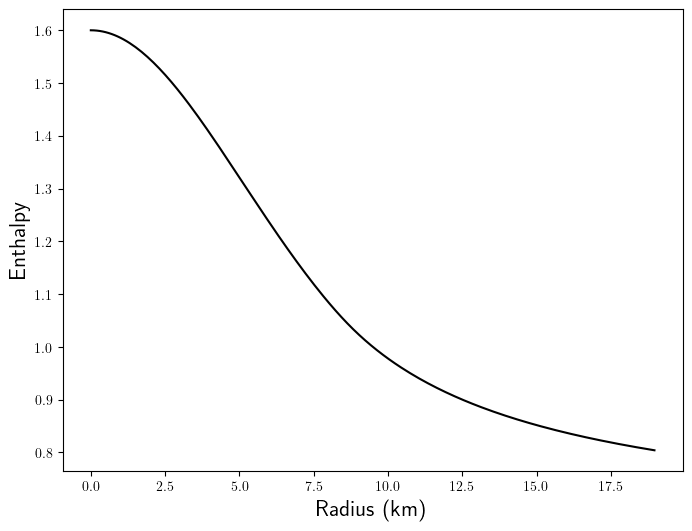

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2042/radius_density_relation.csv


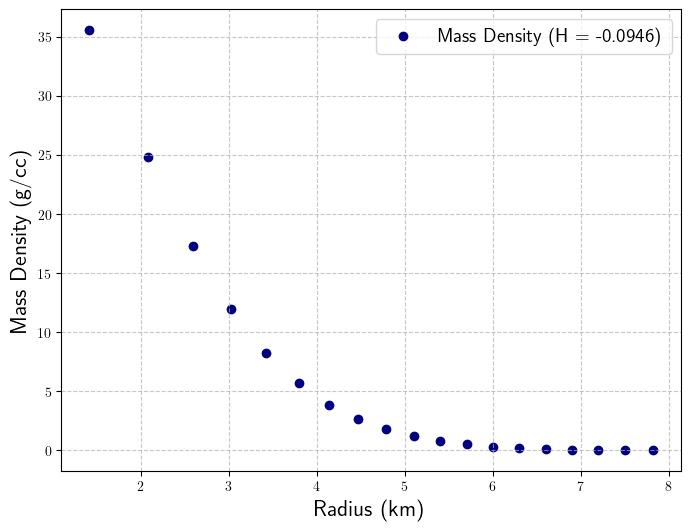

cutoff_index= 182
enthalpy= 182


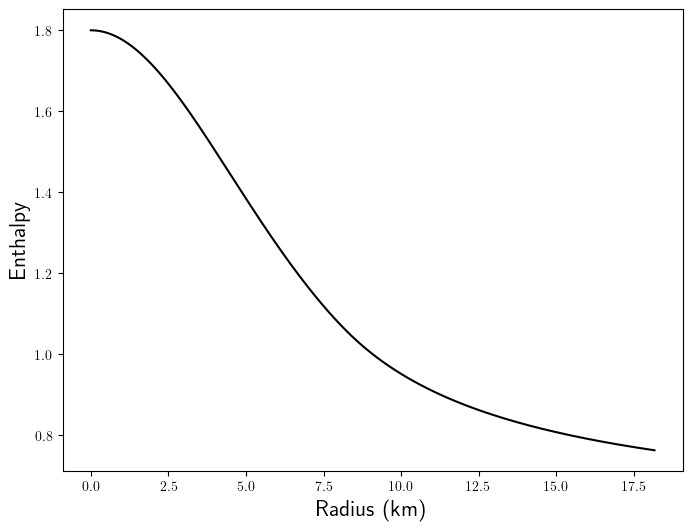

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2552/radius_density_relation.csv


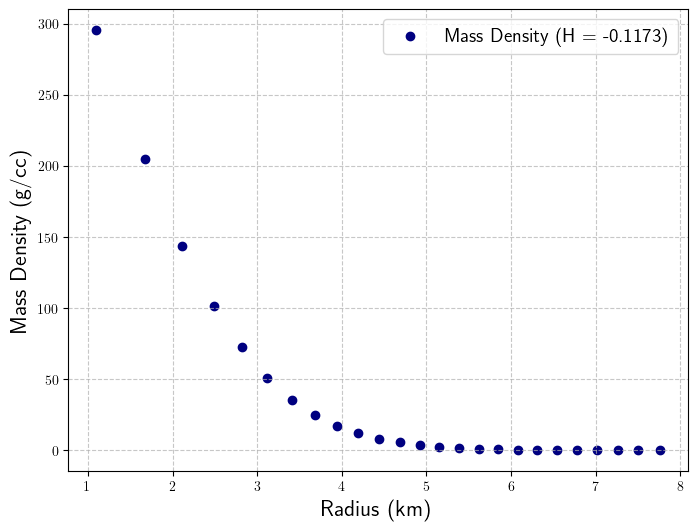

cutoff_index= 148
enthalpy= 148


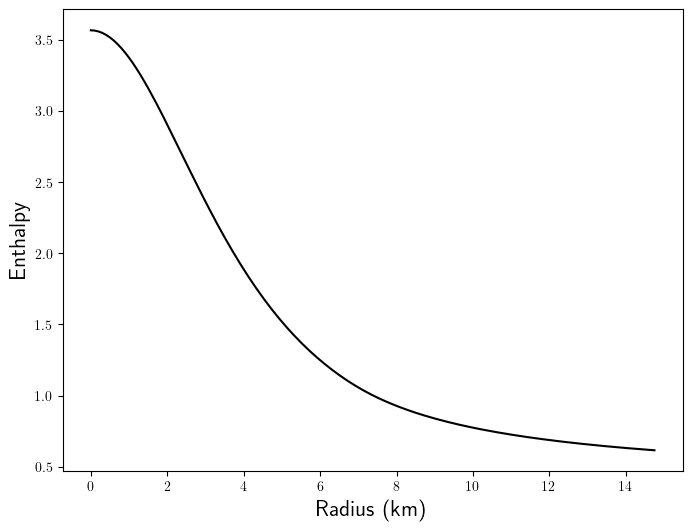

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5521/radius_density_relation.csv


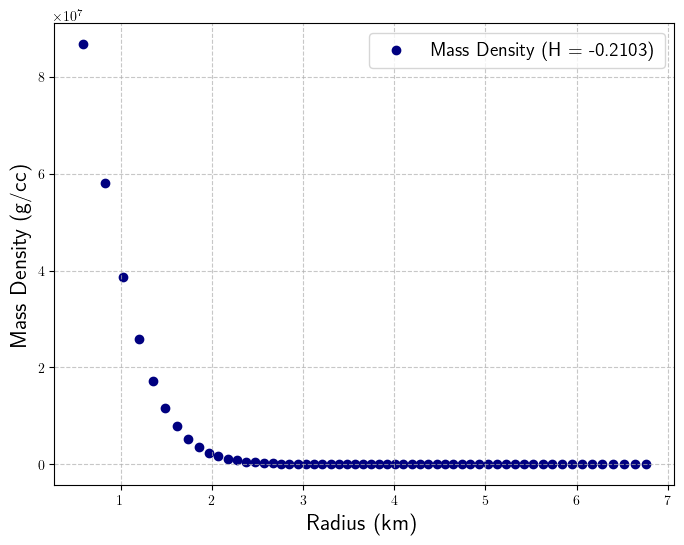

cutoff_index= 164
enthalpy= 164


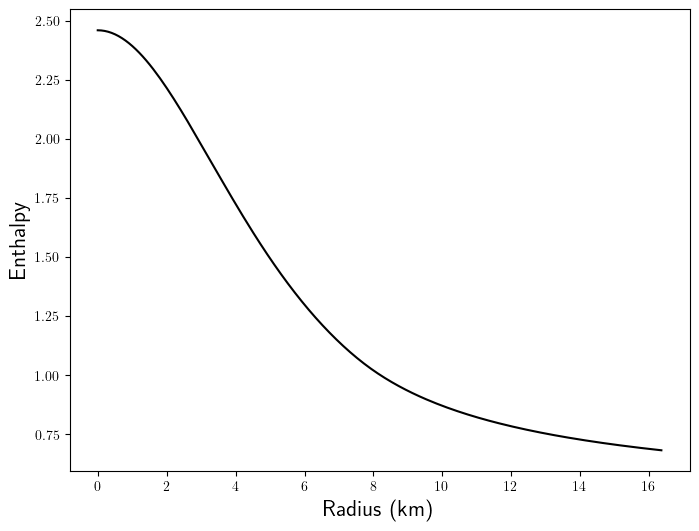

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3909/radius_density_relation.csv


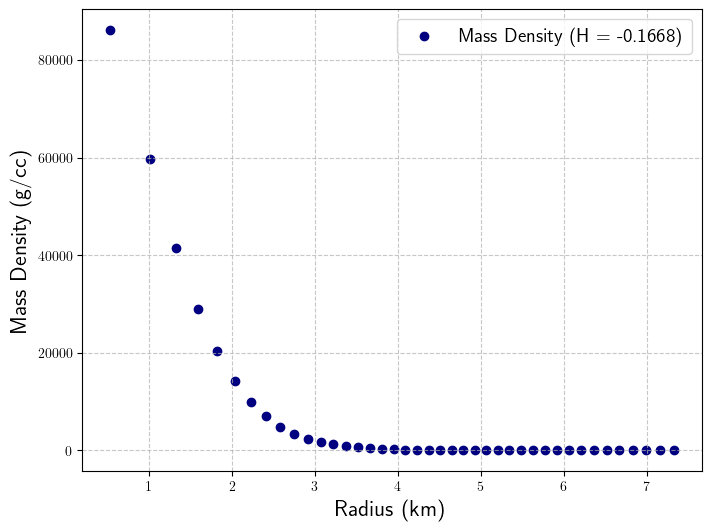

cutoff_index= 135
enthalpy= 135


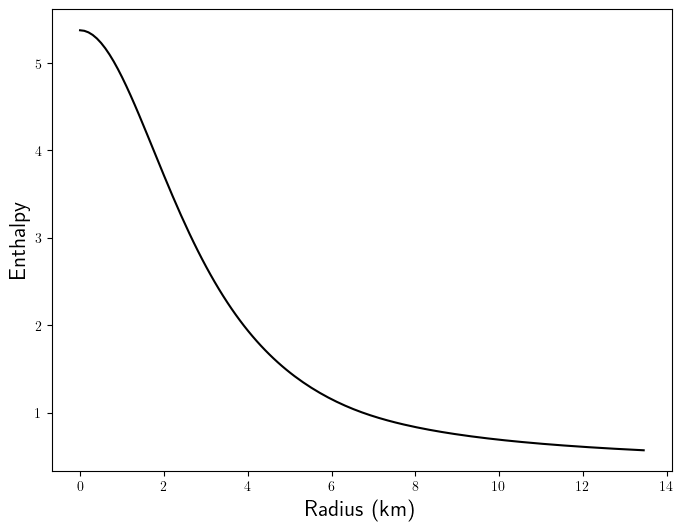

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7303/radius_density_relation.csv


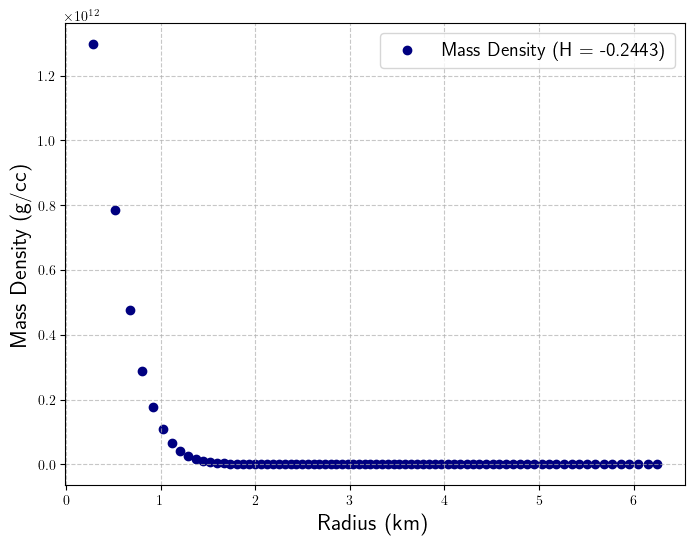

cutoff_index= 210
enthalpy= 210


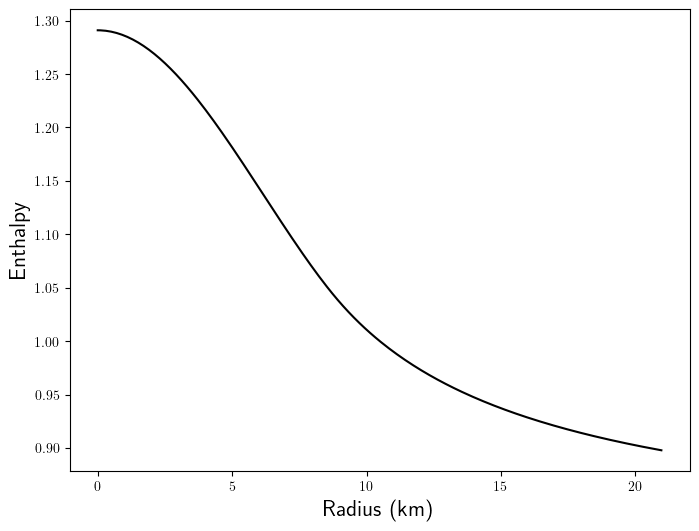

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1109/radius_density_relation.csv


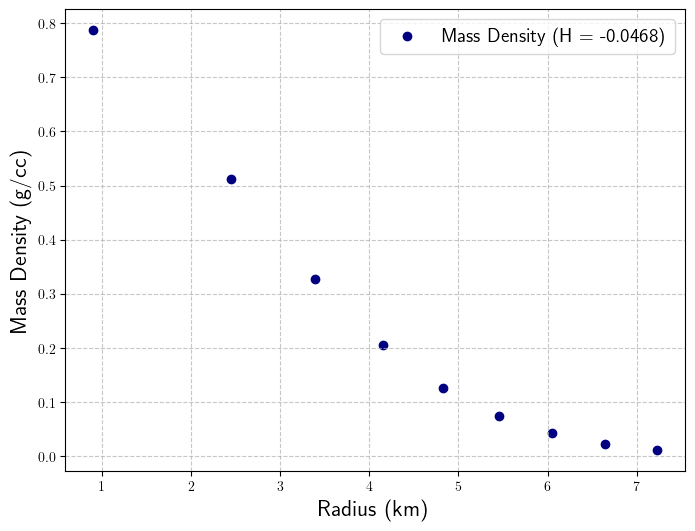

cutoff_index= 146
enthalpy= 146


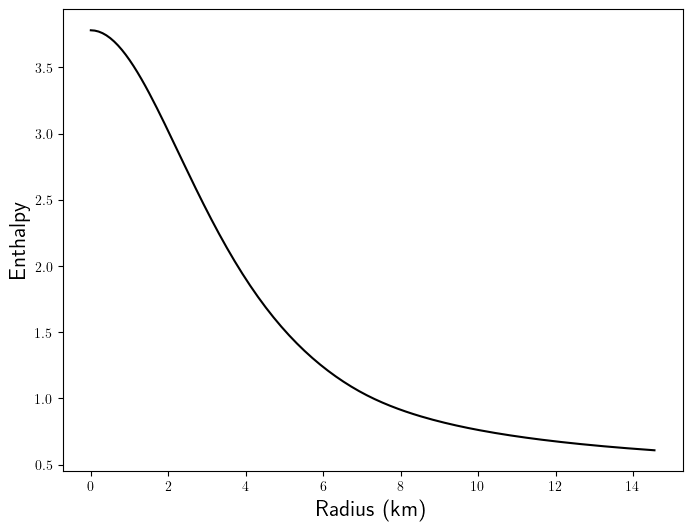

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5776/radius_density_relation.csv


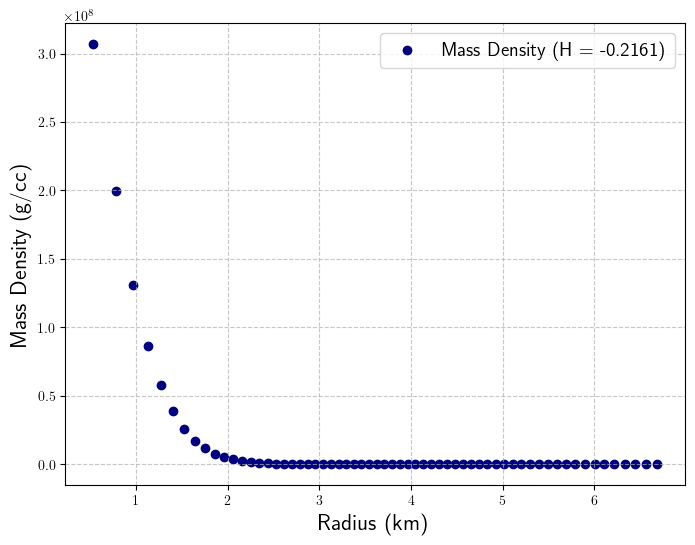

cutoff_index= 167
enthalpy= 167


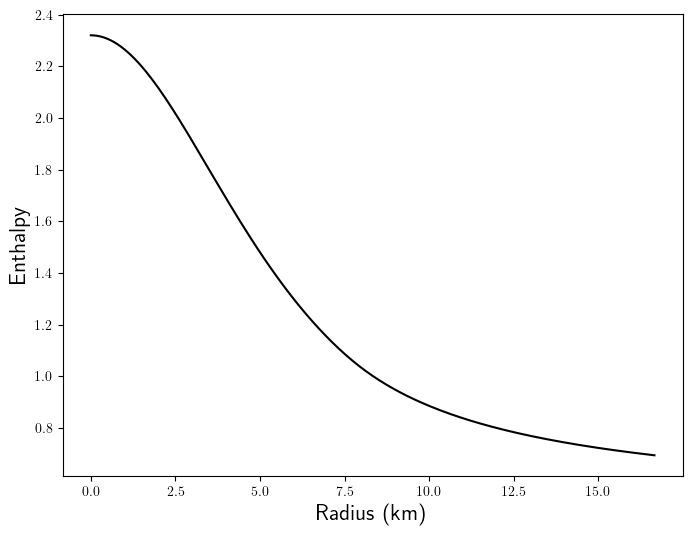

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3655/radius_density_relation.csv


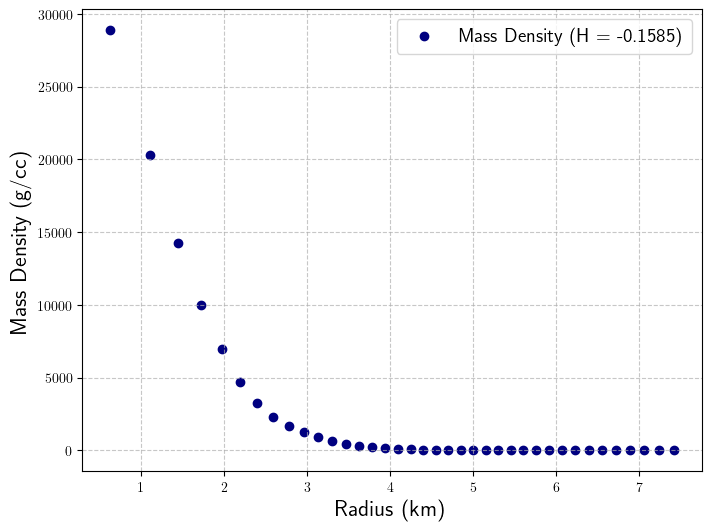

cutoff_index= 157
enthalpy= 157


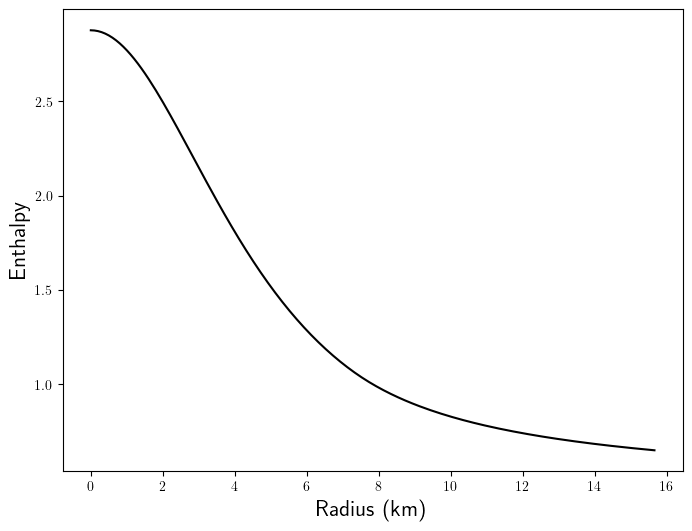

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4588/radius_density_relation.csv


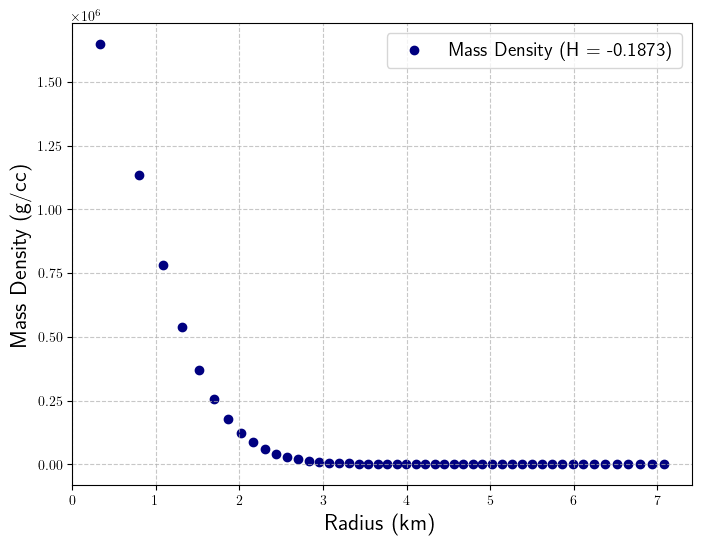

cutoff_index= 149
enthalpy= 149


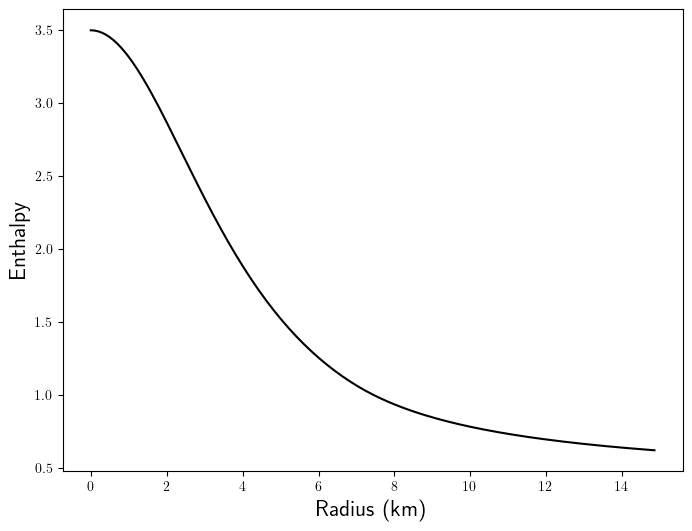

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5436/radius_density_relation.csv


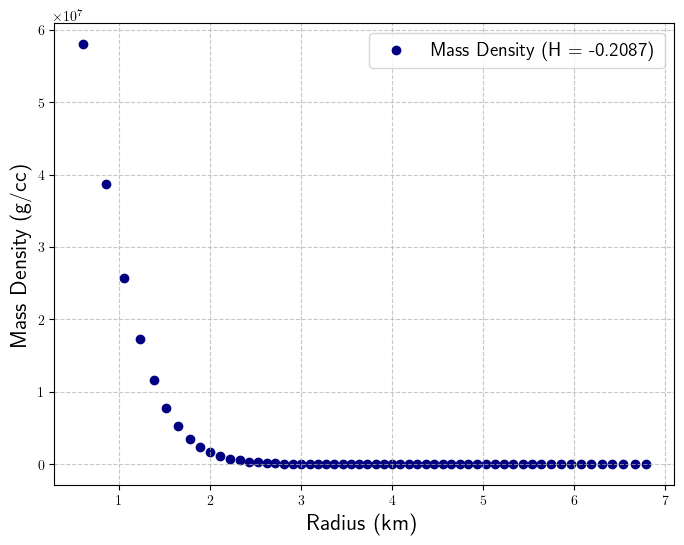

cutoff_index= 184
enthalpy= 184


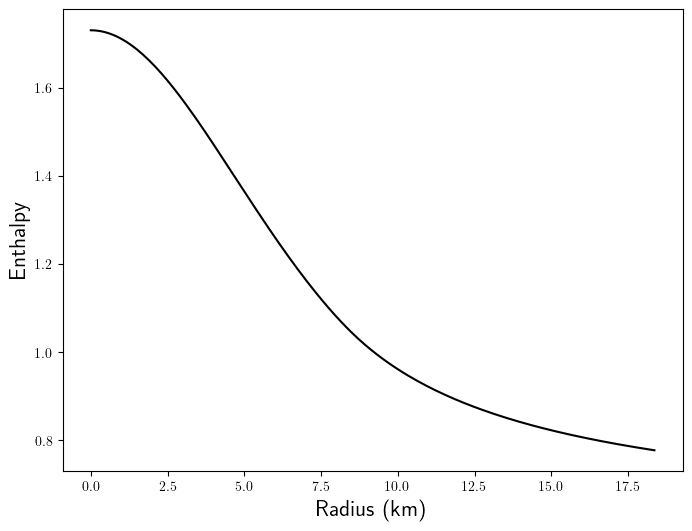

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2382/radius_density_relation.csv


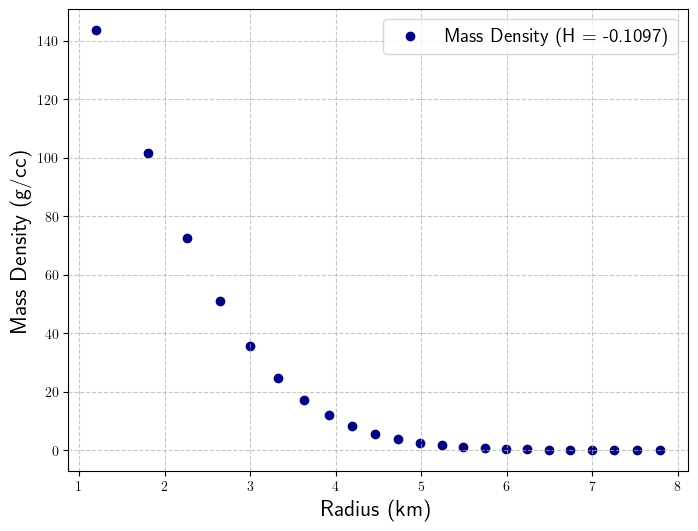

cutoff_index= 227
enthalpy= 227


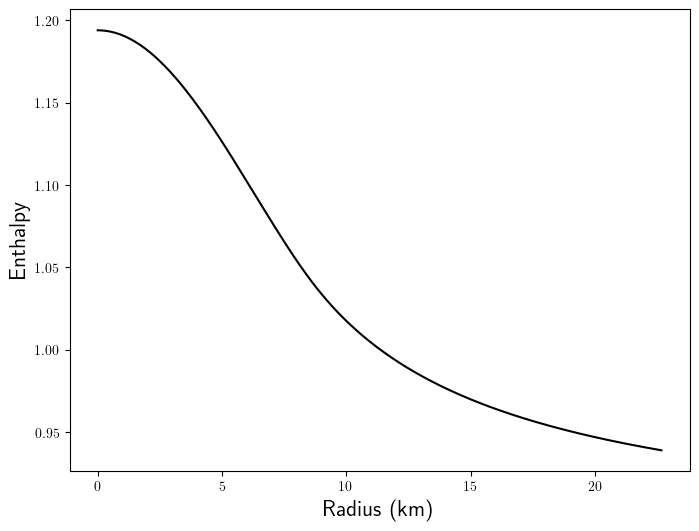

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.0770/radius_density_relation.csv


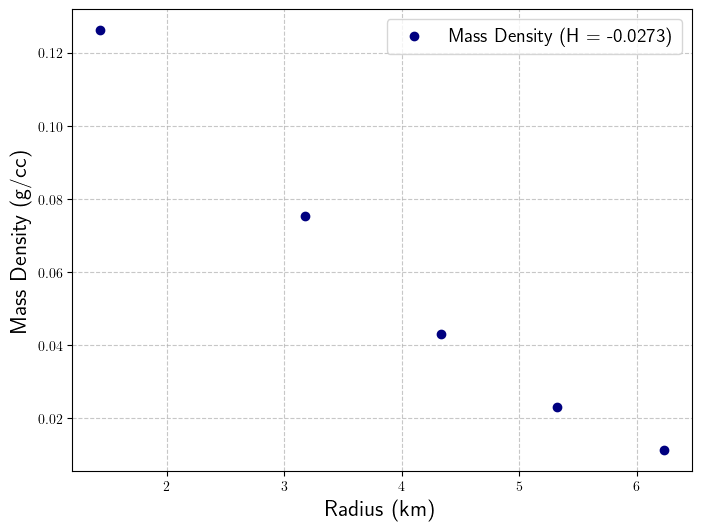

cutoff_index= 133
enthalpy= 133


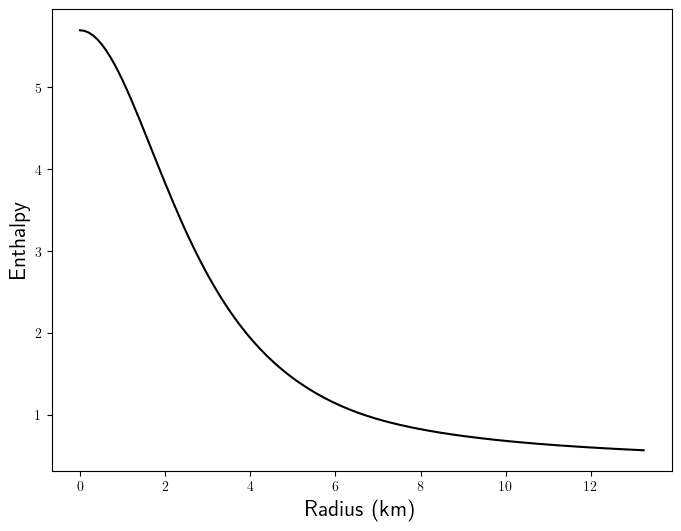

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7558/radius_density_relation.csv


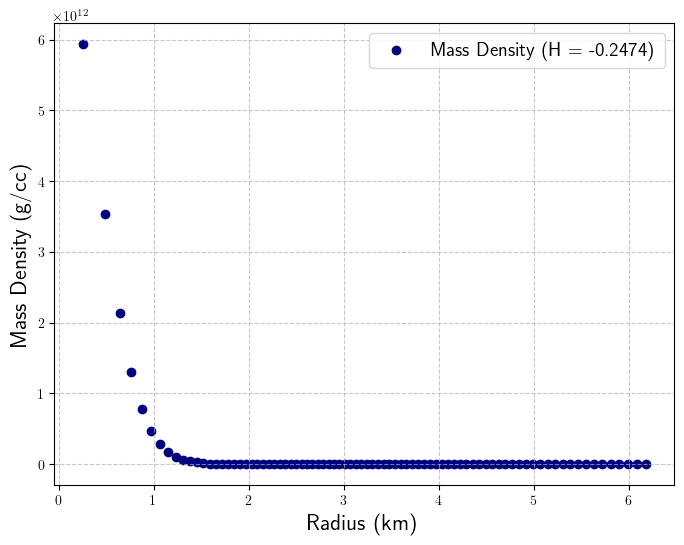

cutoff_index= 142
enthalpy= 142


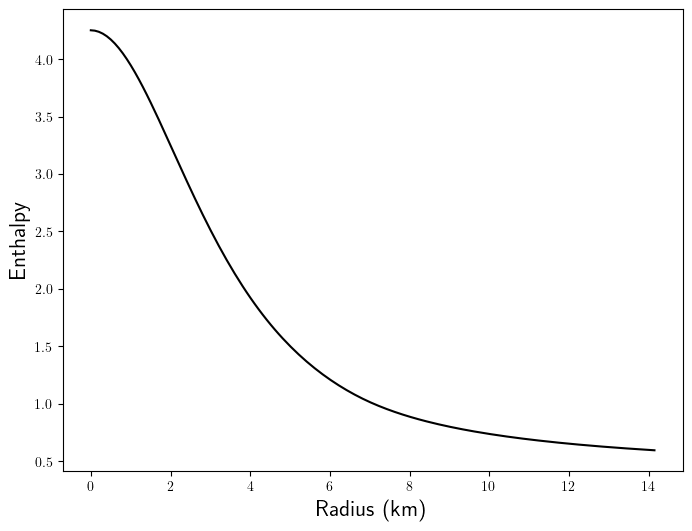

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6285/radius_density_relation.csv


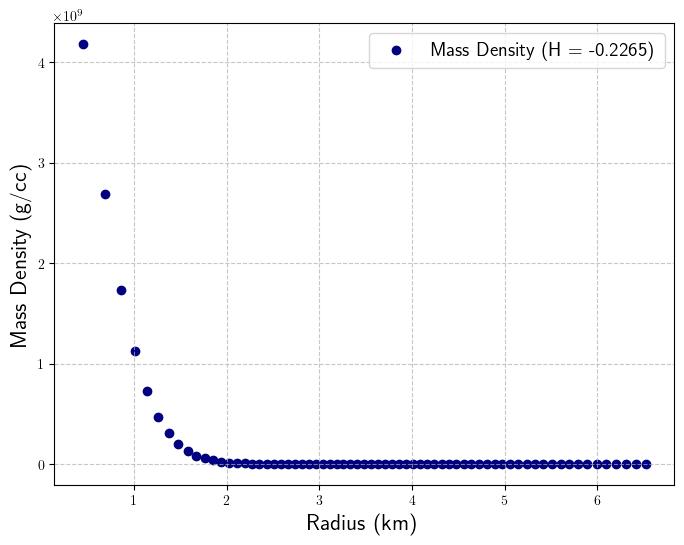

cutoff_index= 151
enthalpy= 151


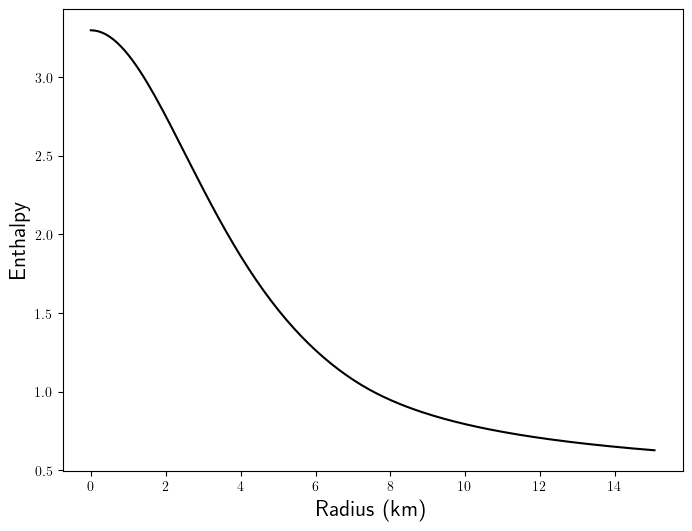

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5182/radius_density_relation.csv


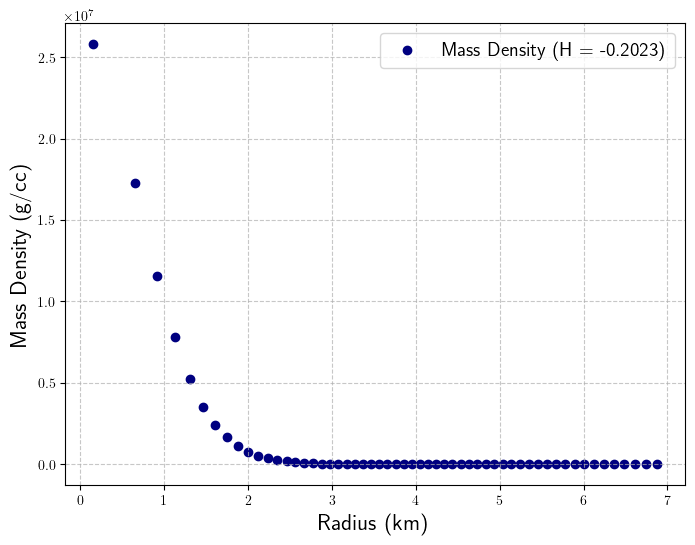

cutoff_index= 138
enthalpy= 138


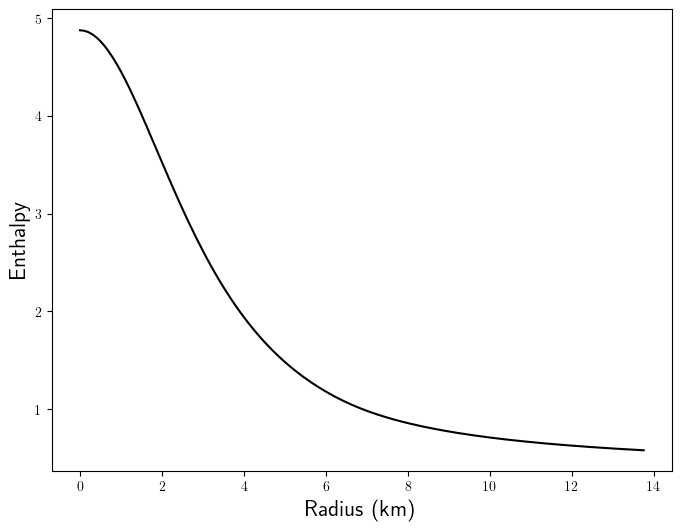

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6879/radius_density_relation.csv


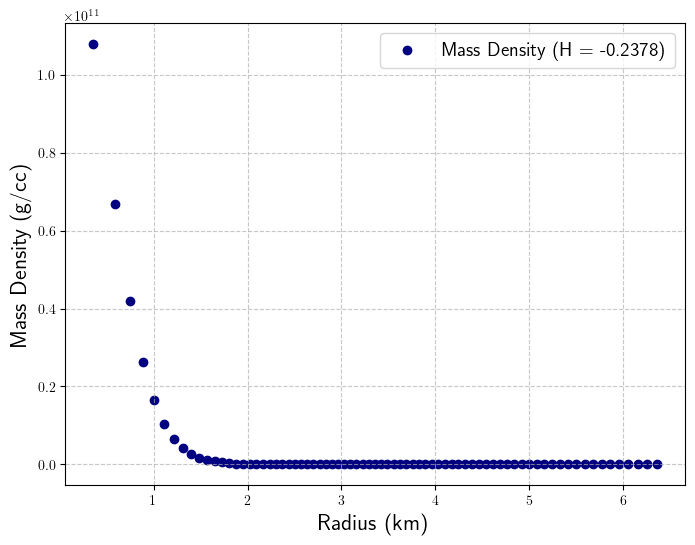

cutoff_index= 154
enthalpy= 154


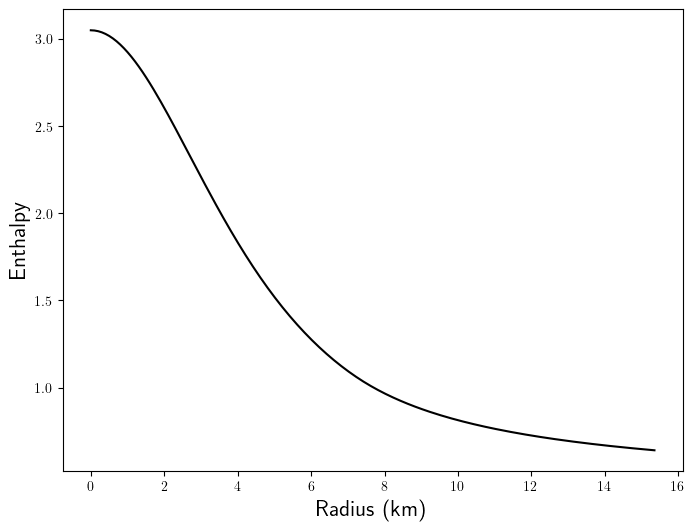

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4842/radius_density_relation.csv


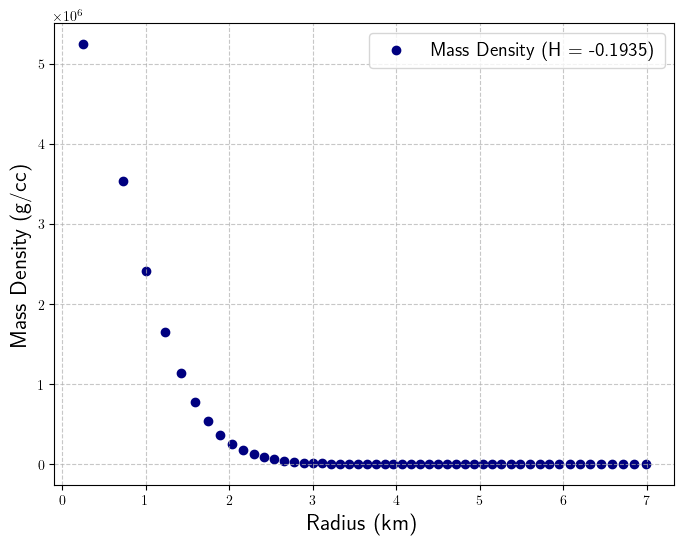

cutoff_index= 130
enthalpy= 130


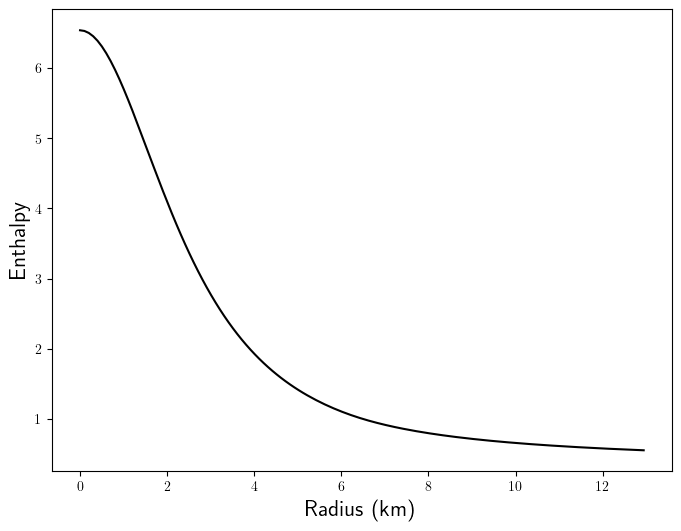

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.8152/radius_density_relation.csv


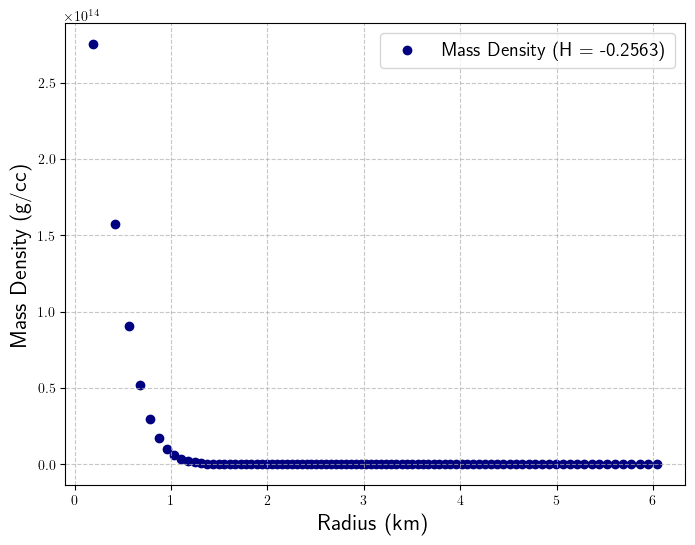

cutoff_index= 143
enthalpy= 143


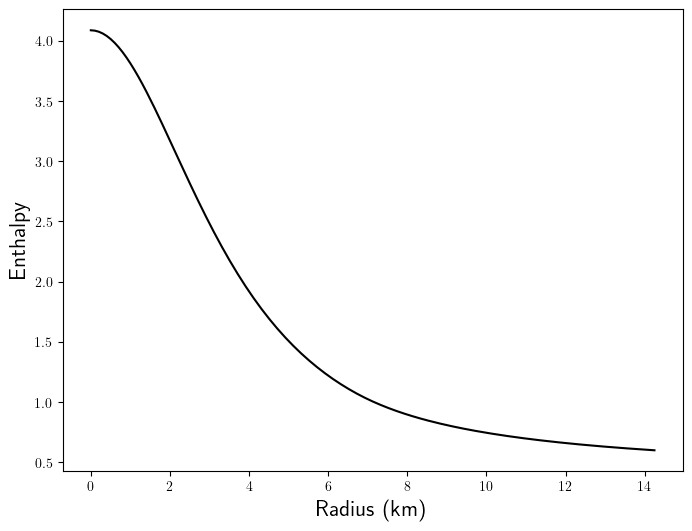

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6115/radius_density_relation.csv


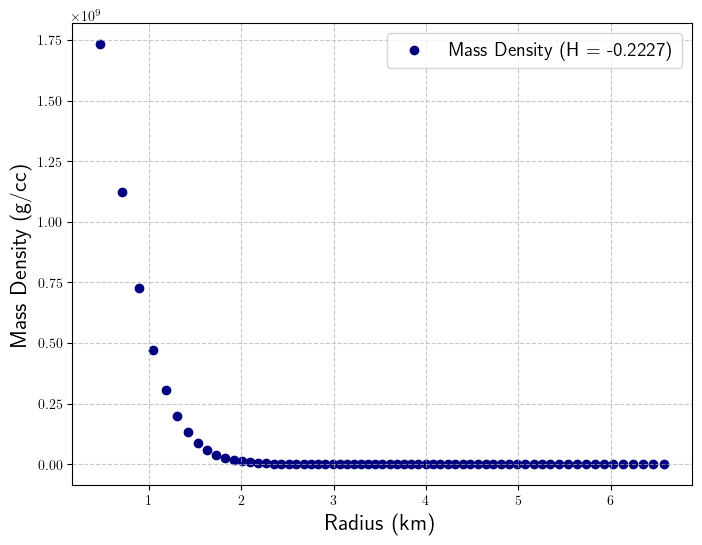

cutoff_index= 129
enthalpy= 129


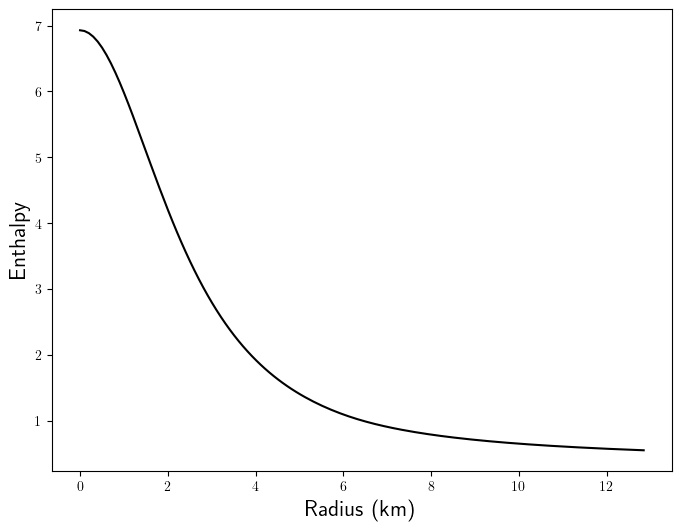

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.8406/radius_density_relation.csv


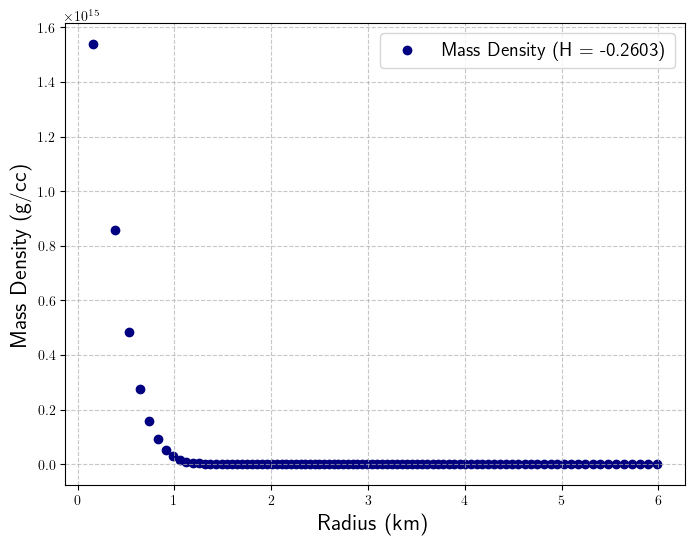

cutoff_index= 135
enthalpy= 135


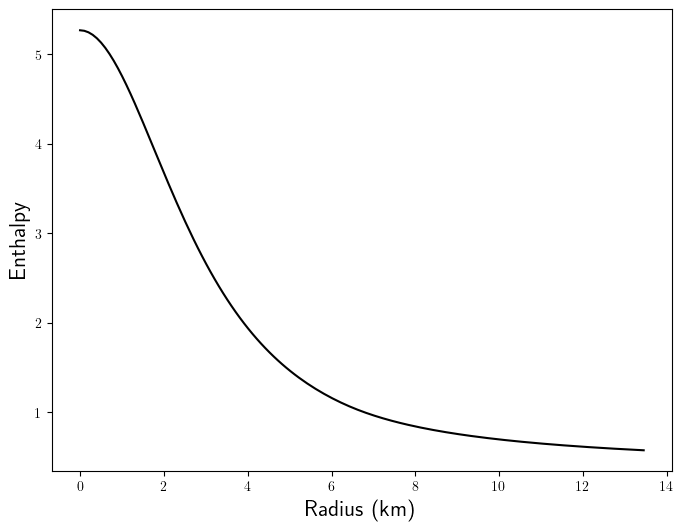

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7218/radius_density_relation.csv


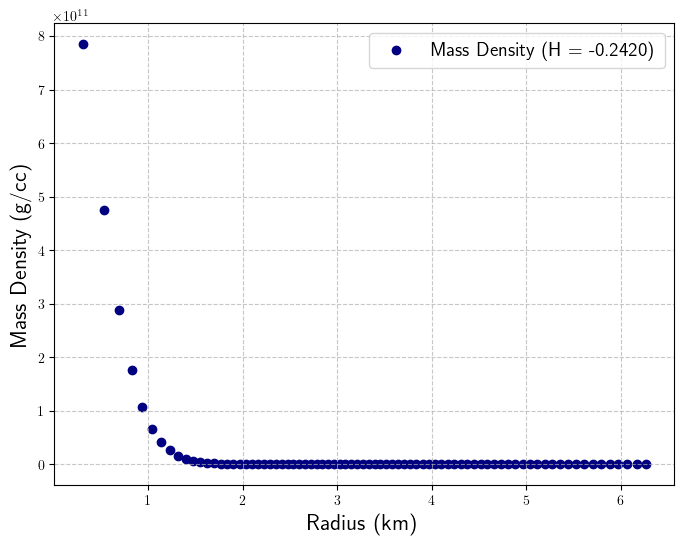

cutoff_index= 153
enthalpy= 153


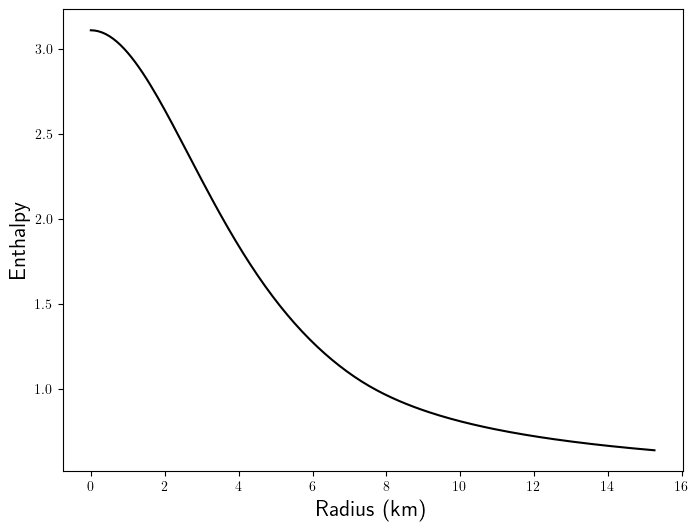

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4927/radius_density_relation.csv


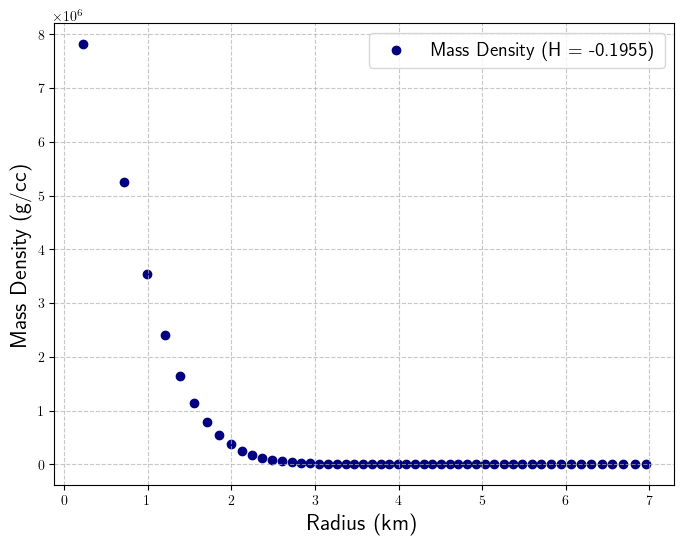

cutoff_index= 127
enthalpy= 127


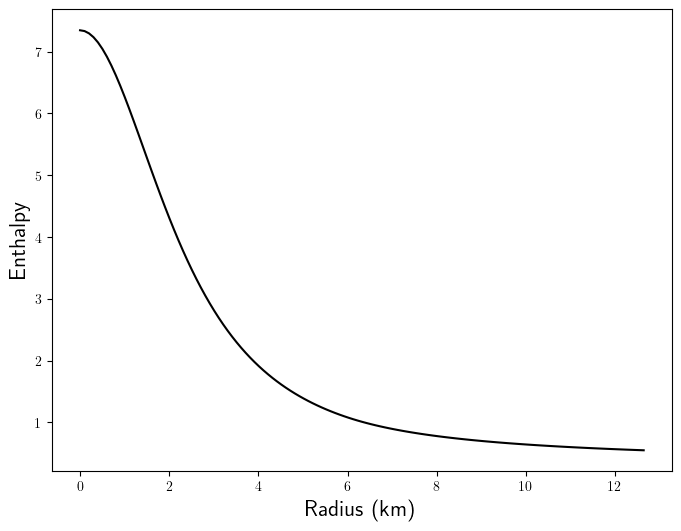

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.8661/radius_density_relation.csv


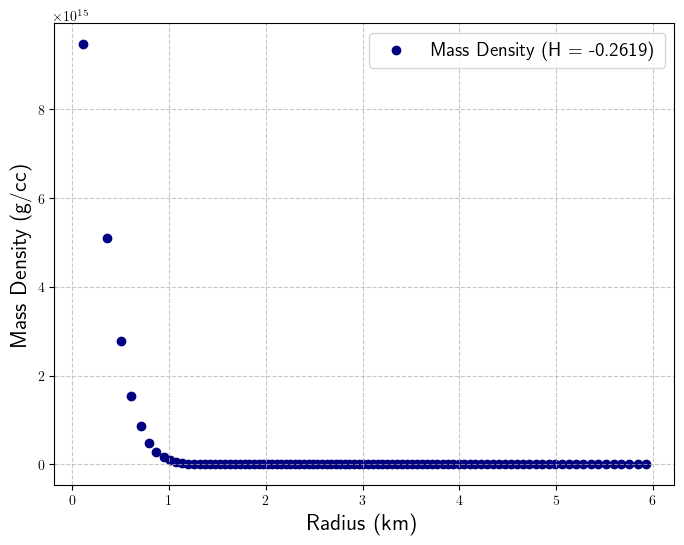

cutoff_index= 203
enthalpy= 203


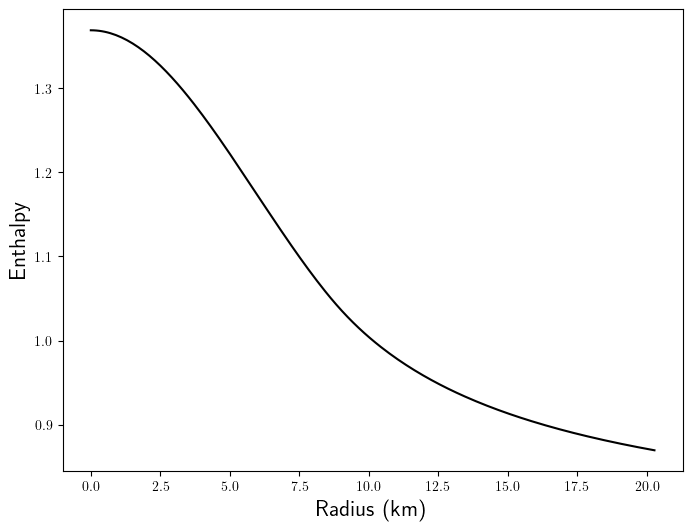

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1364/radius_density_relation.csv


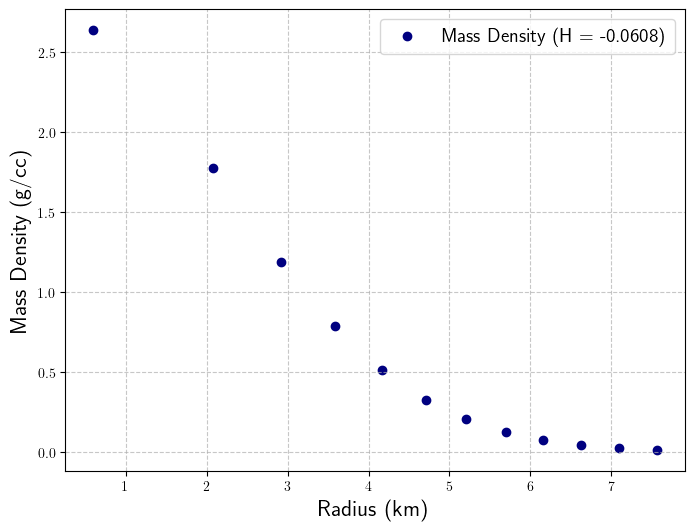

cutoff_index= 145
enthalpy= 145


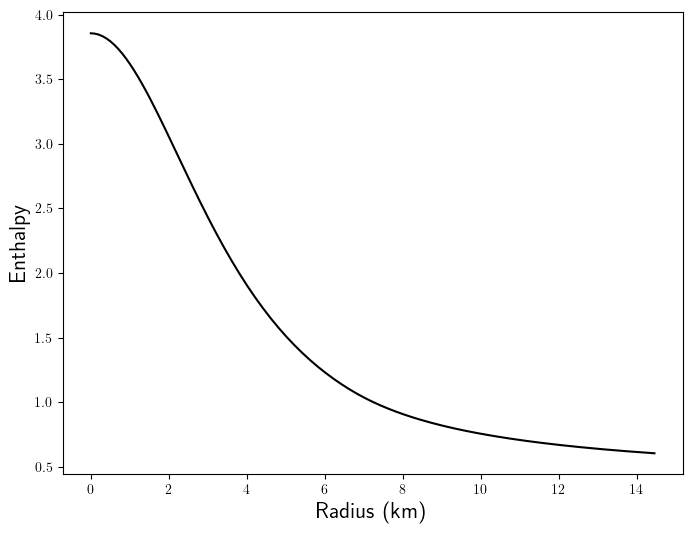

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5861/radius_density_relation.csv


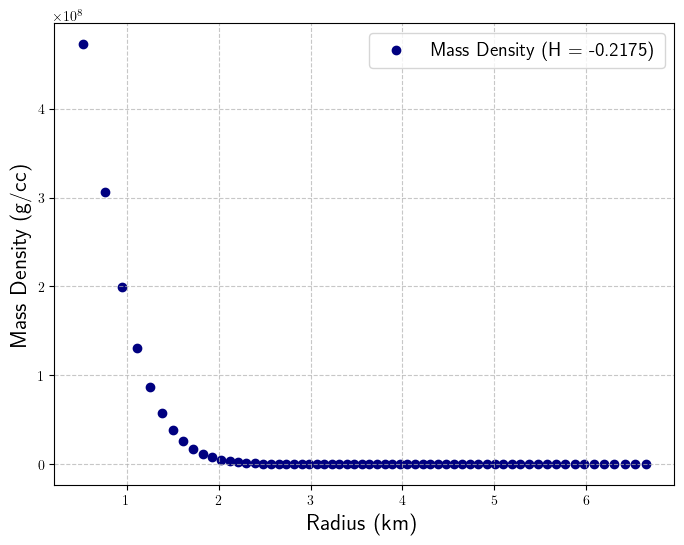

cutoff_index= 137
enthalpy= 137


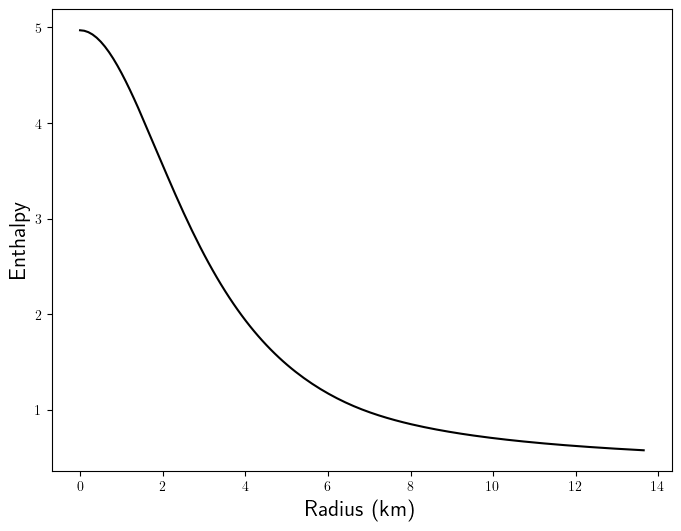

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6964/radius_density_relation.csv


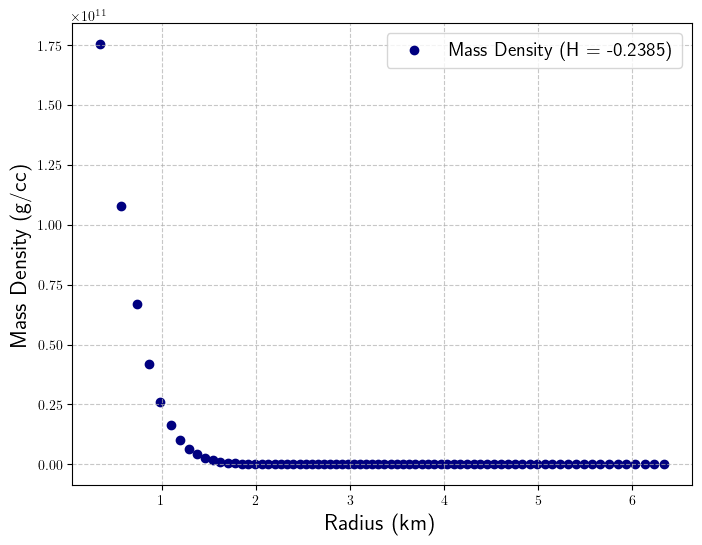

cutoff_index= 129
enthalpy= 129


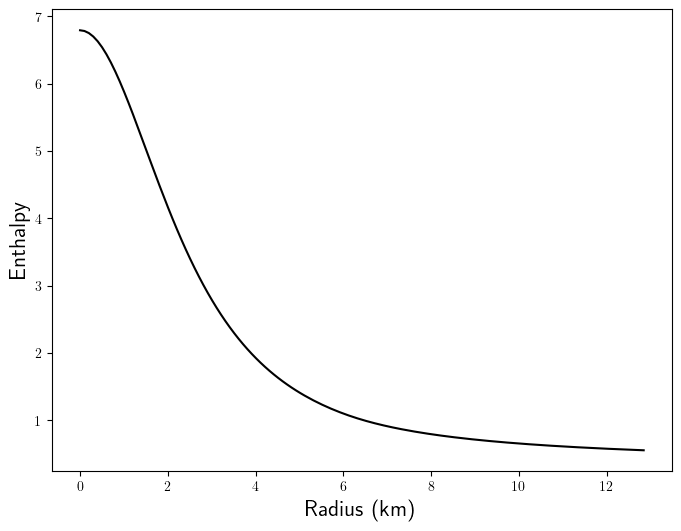

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.8321/radius_density_relation.csv


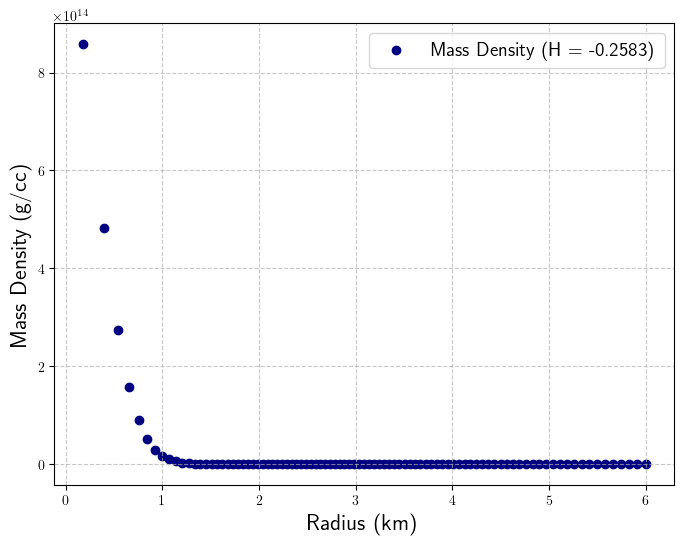

cutoff_index= 194
enthalpy= 194


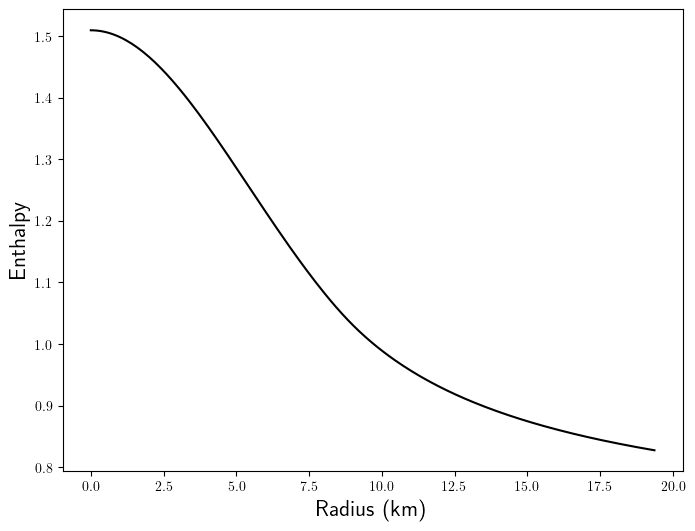

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1788/radius_density_relation.csv


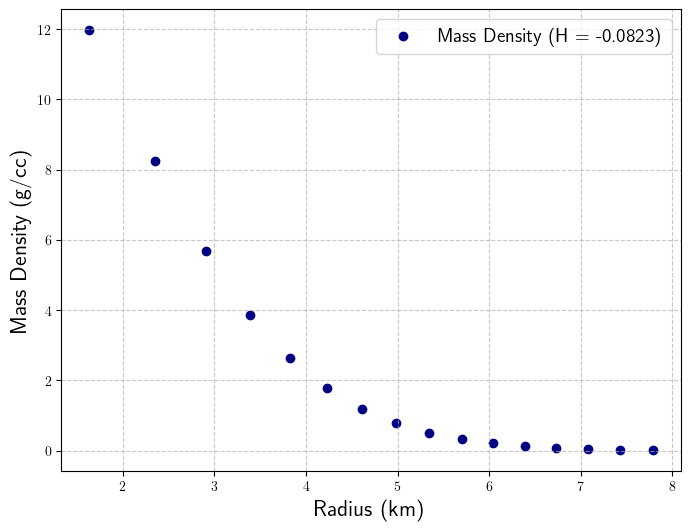

cutoff_index= 126
enthalpy= 126


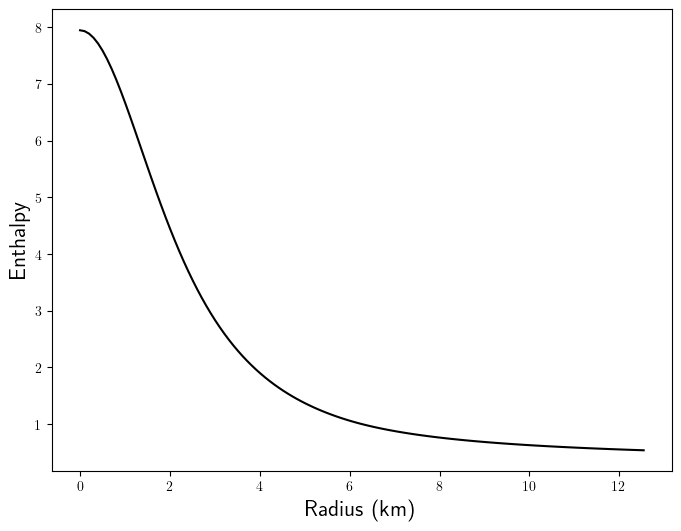

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.9000/radius_density_relation.csv


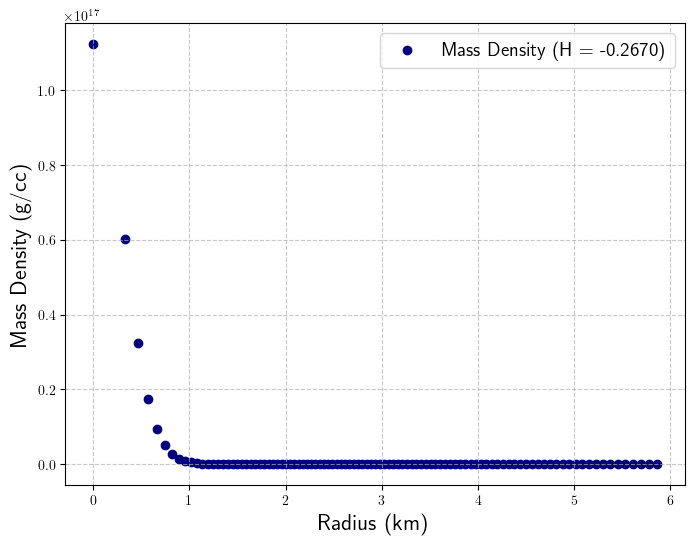

cutoff_index= 134
enthalpy= 134


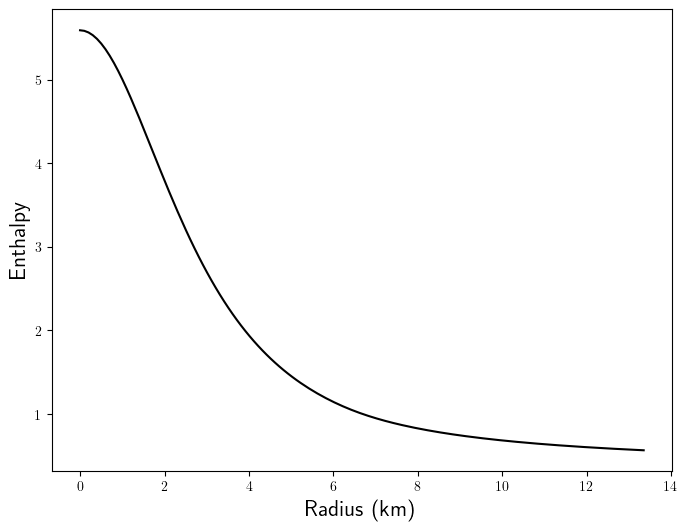

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7473/radius_density_relation.csv


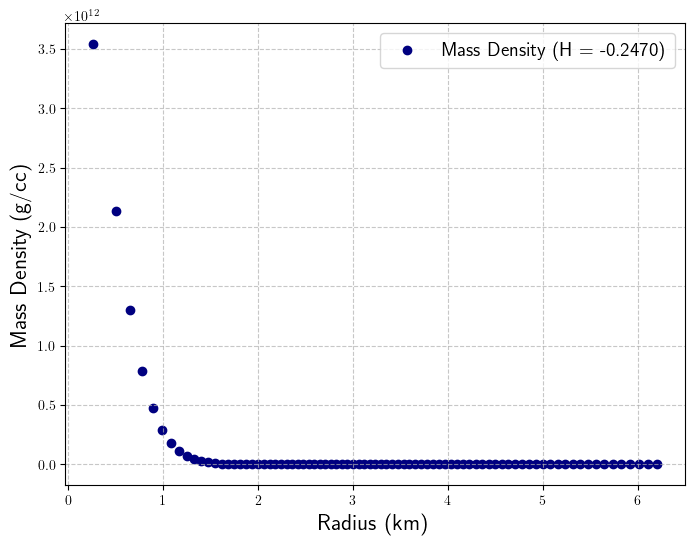

cutoff_index= 152
enthalpy= 152


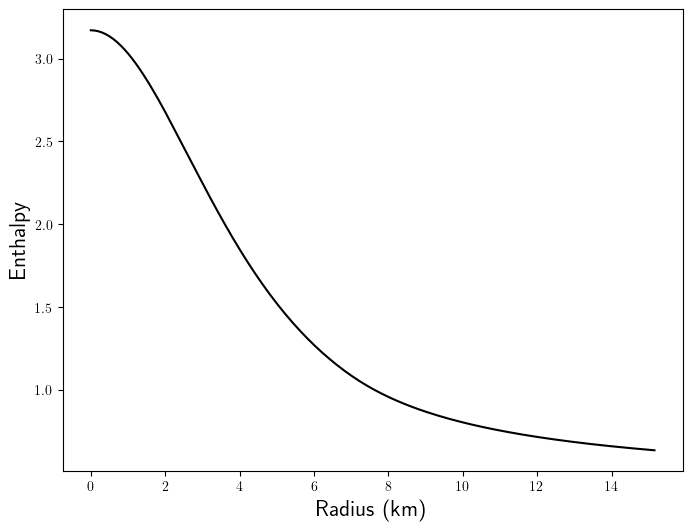

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5012/radius_density_relation.csv


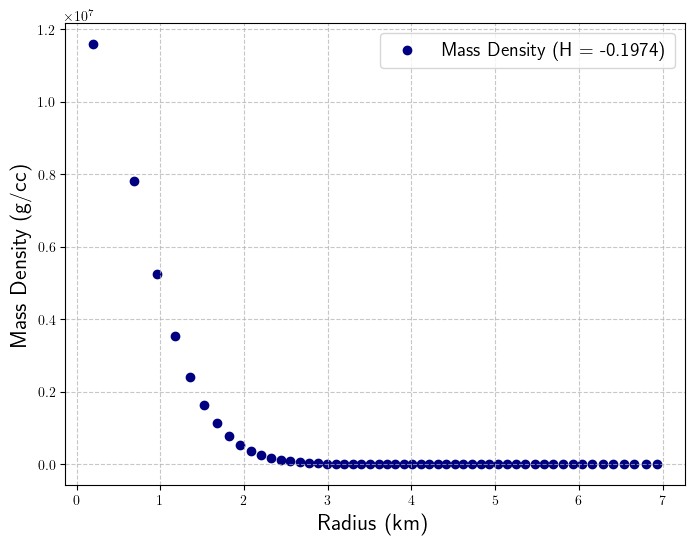

cutoff_index= 161
enthalpy= 161


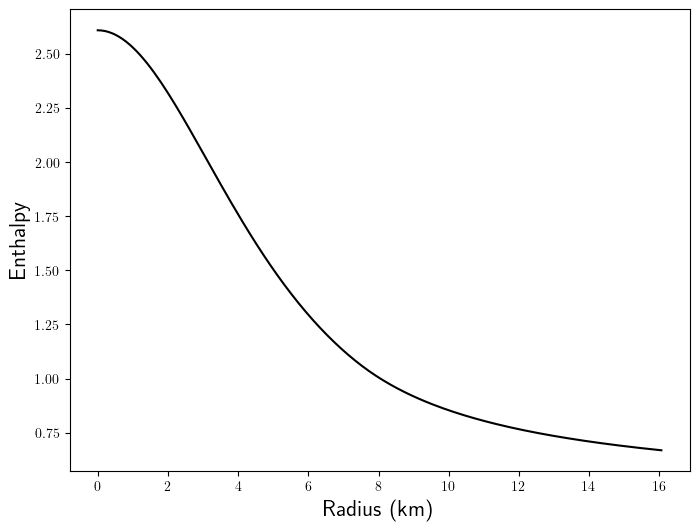

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4164/radius_density_relation.csv


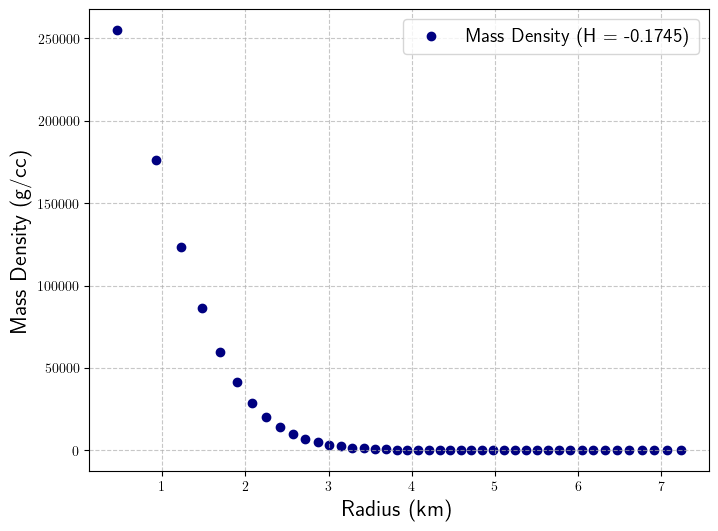

cutoff_index= 156
enthalpy= 156


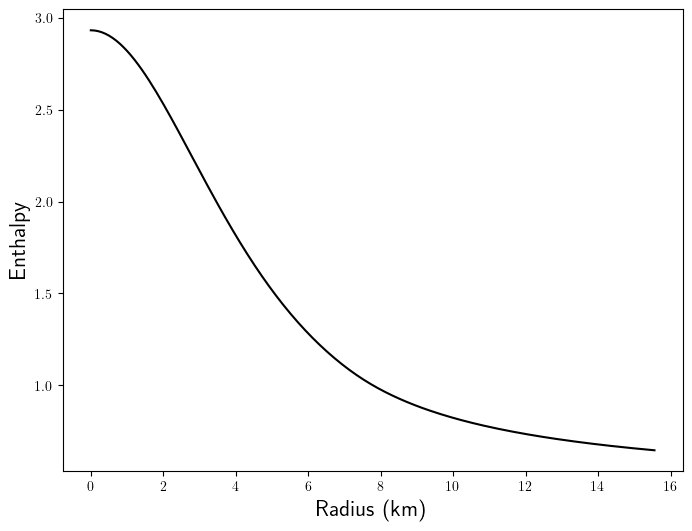

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4673/radius_density_relation.csv


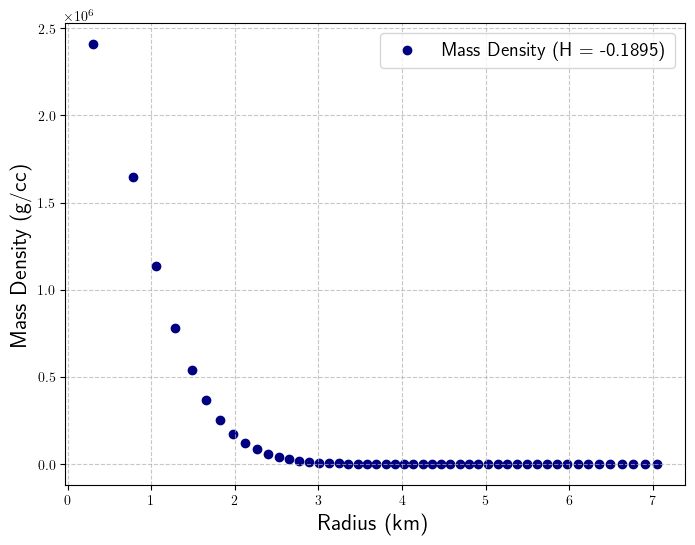

cutoff_index= 155
enthalpy= 155


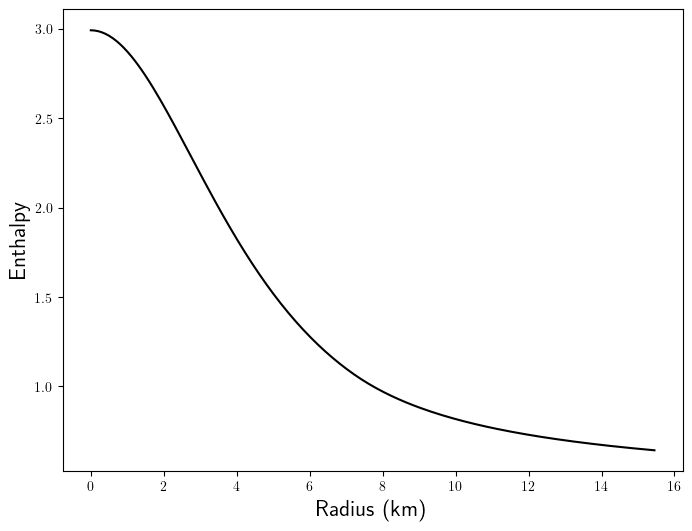

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4758/radius_density_relation.csv


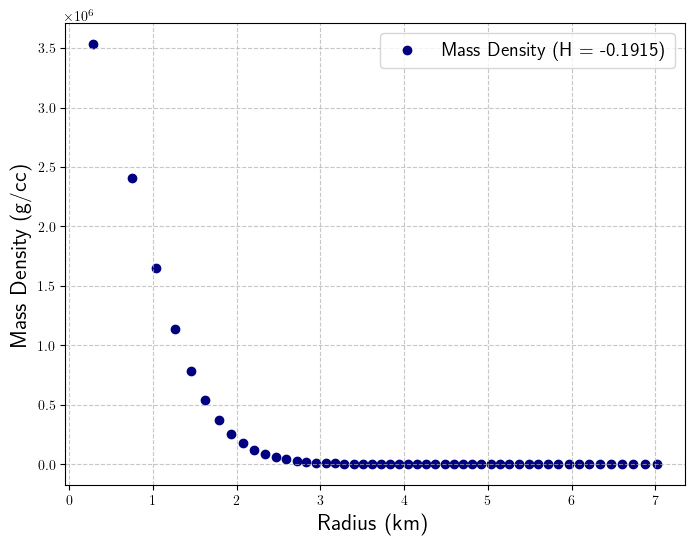

cutoff_index= 132
enthalpy= 132


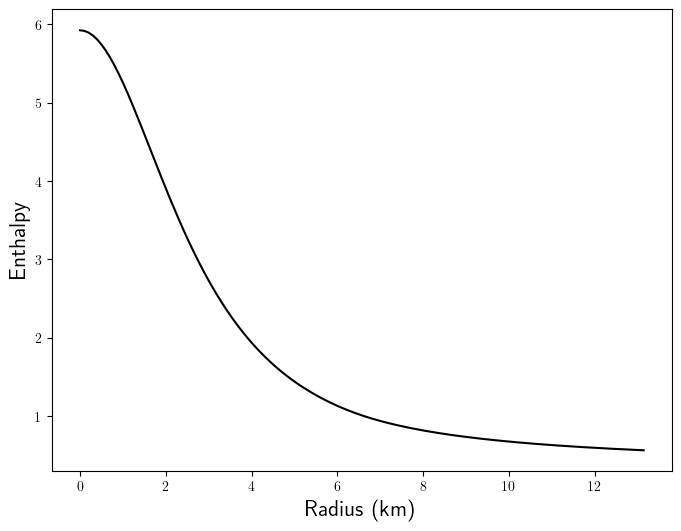

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7727/radius_density_relation.csv


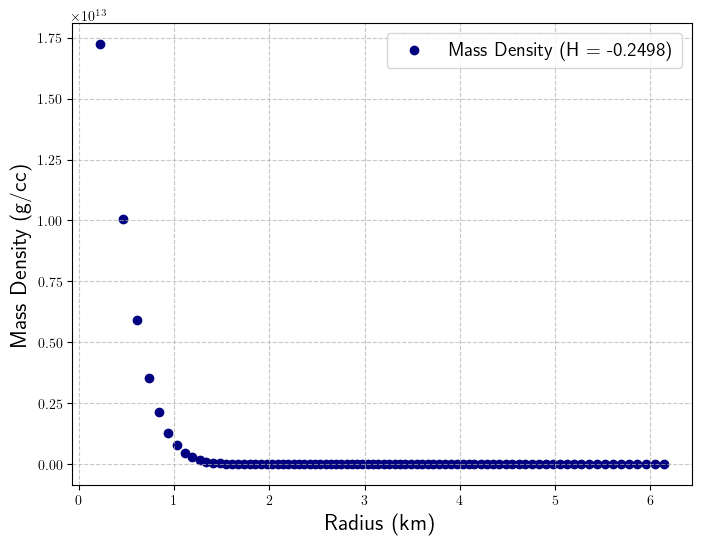

cutoff_index= 170
enthalpy= 170


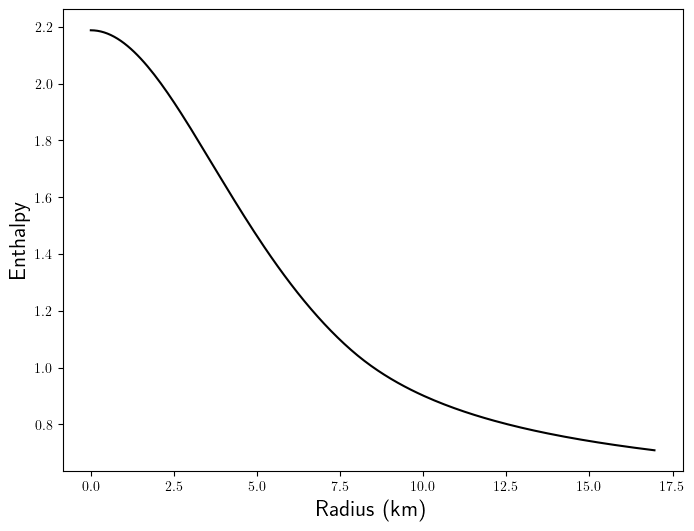

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3400/radius_density_relation.csv


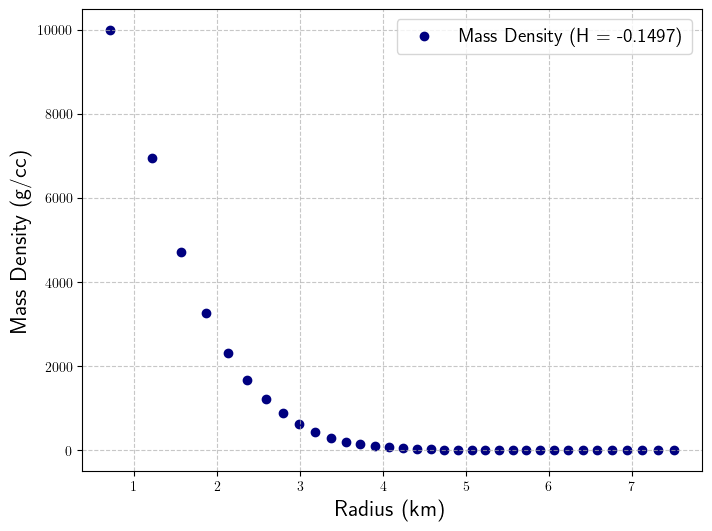

cutoff_index= 162
enthalpy= 162


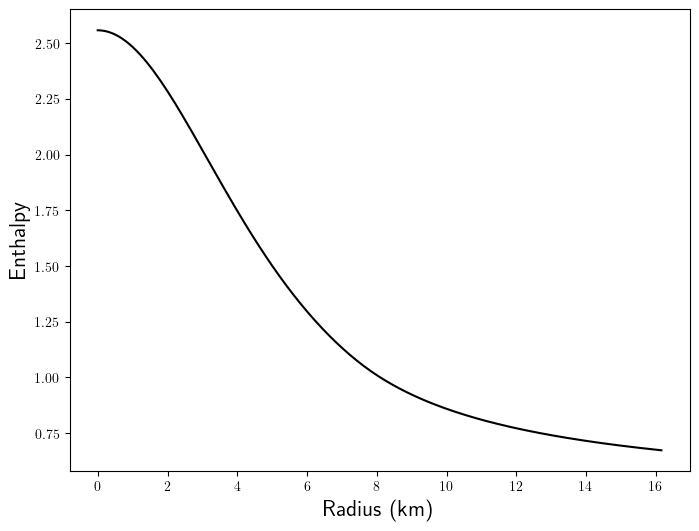

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4079/radius_density_relation.csv


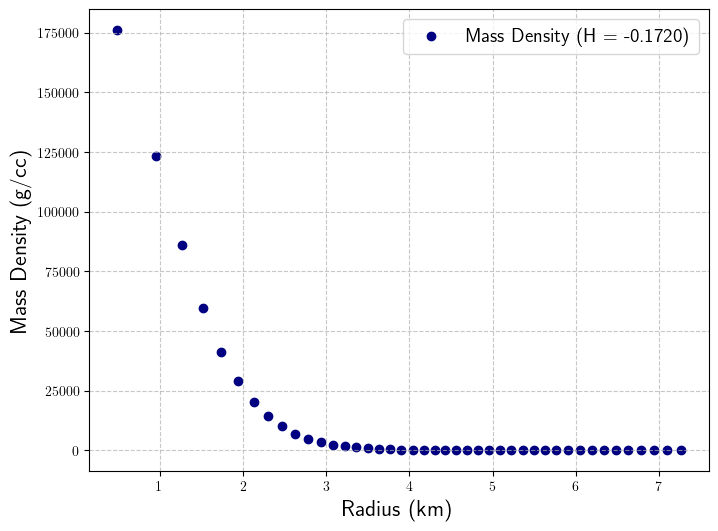

cutoff_index= 183
enthalpy= 183


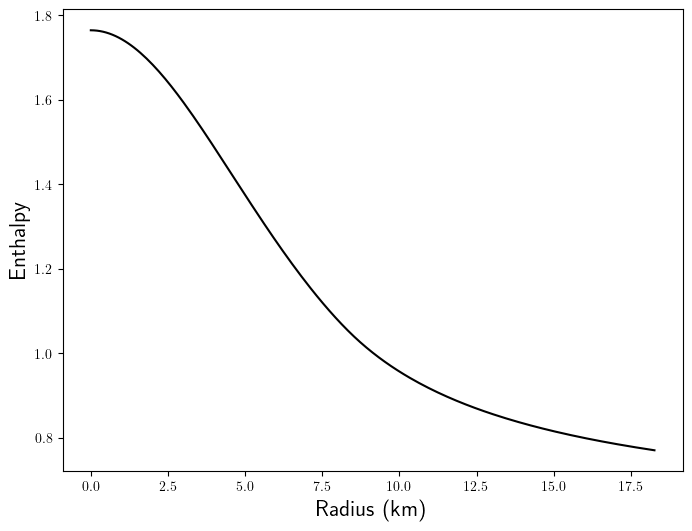

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2467/radius_density_relation.csv


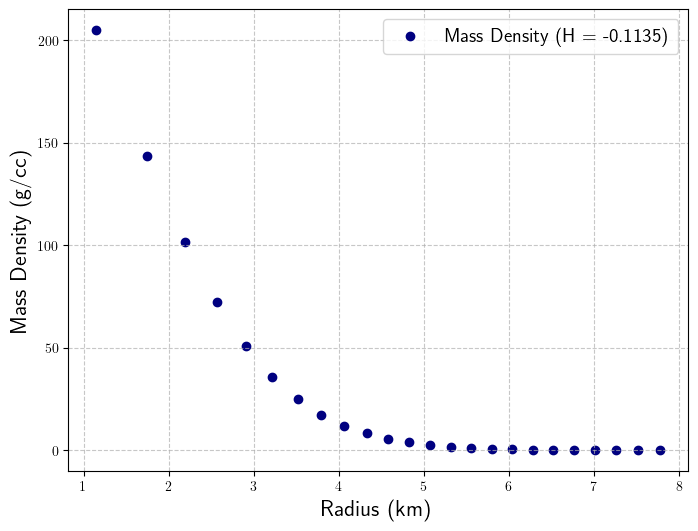

cutoff_index= 133
enthalpy= 133


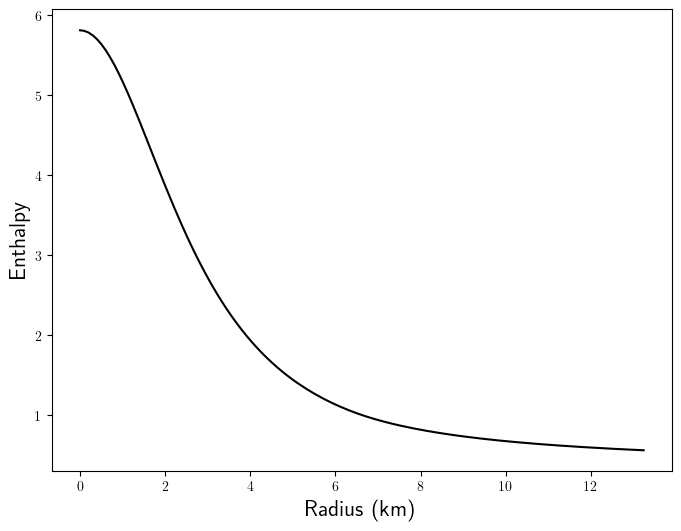

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7642/radius_density_relation.csv


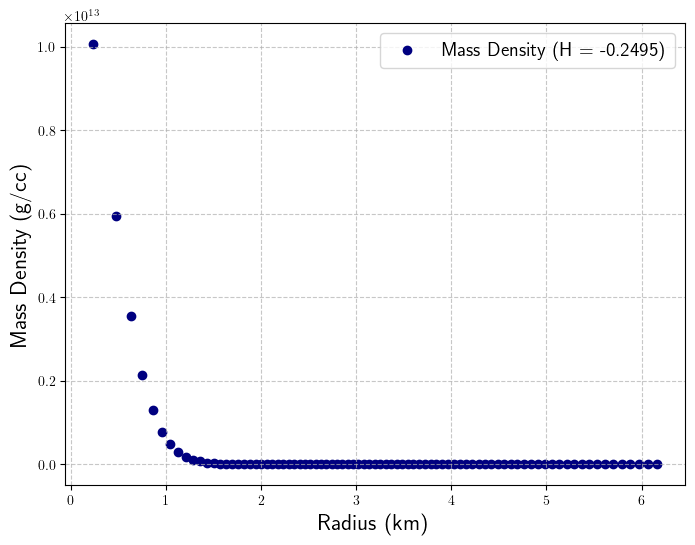

cutoff_index= 191
enthalpy= 191


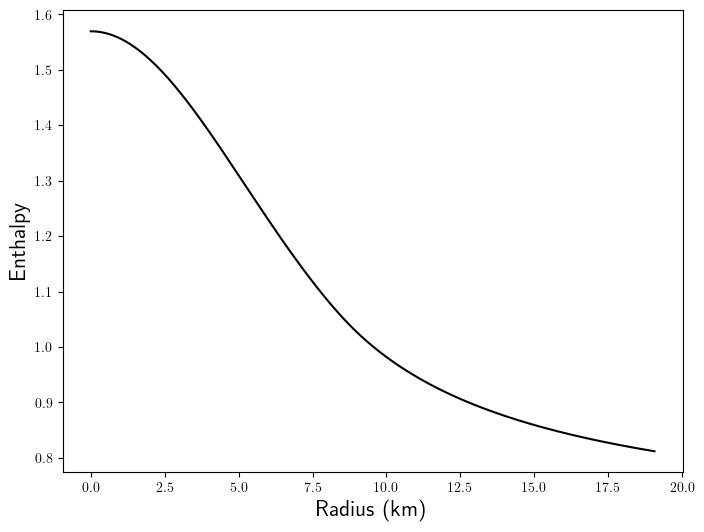

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1958/radius_density_relation.csv


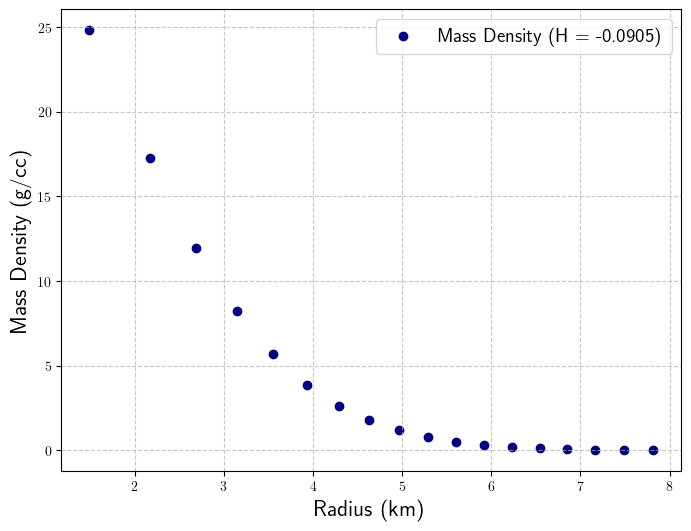

cutoff_index= 201
enthalpy= 201


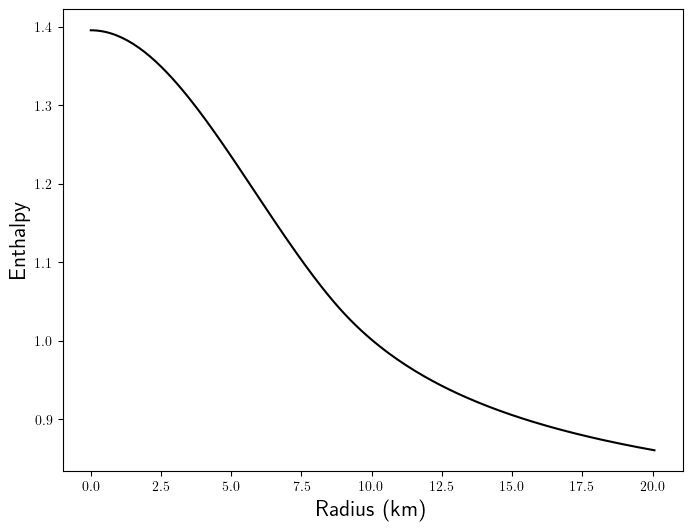

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1448/radius_density_relation.csv


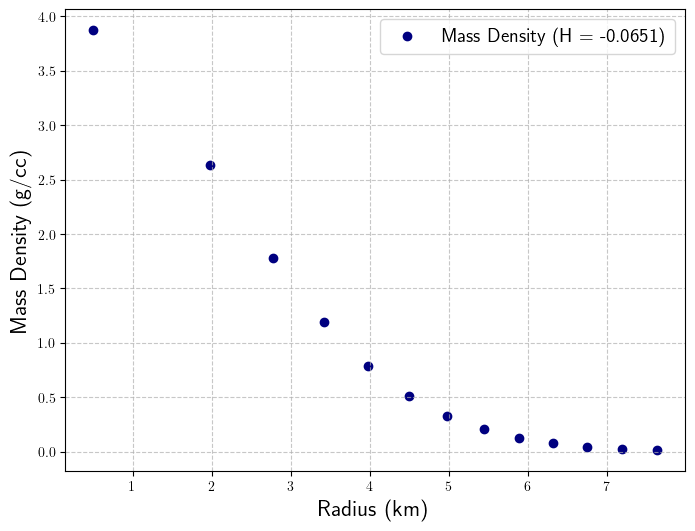

cutoff_index= 130
enthalpy= 130


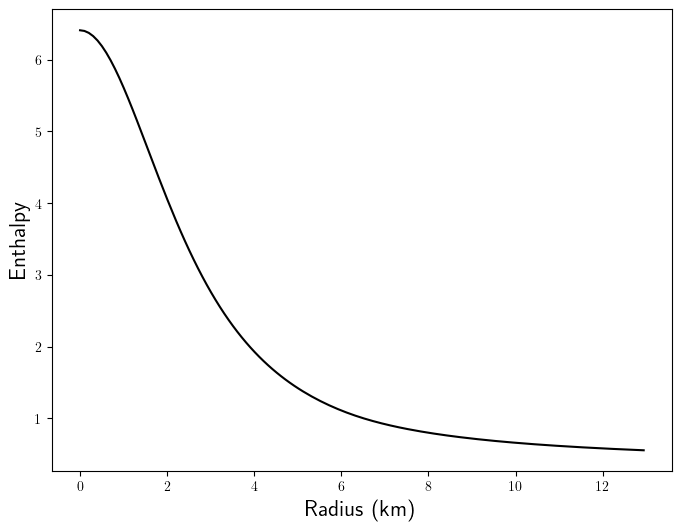

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.8067/radius_density_relation.csv


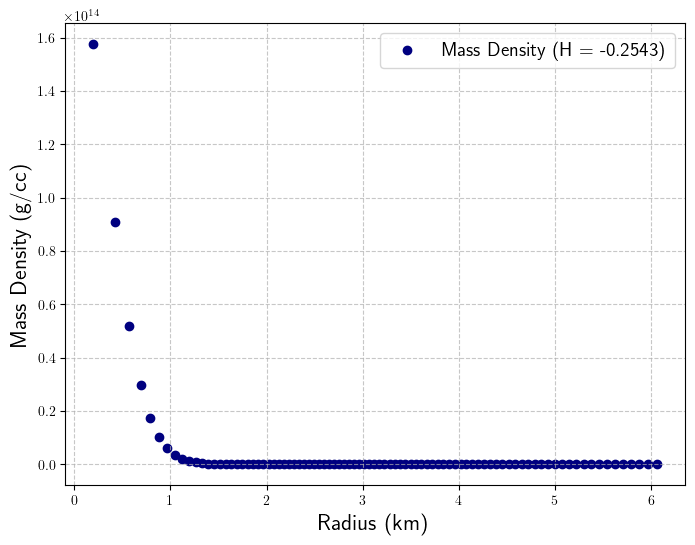

cutoff_index= 149
enthalpy= 149


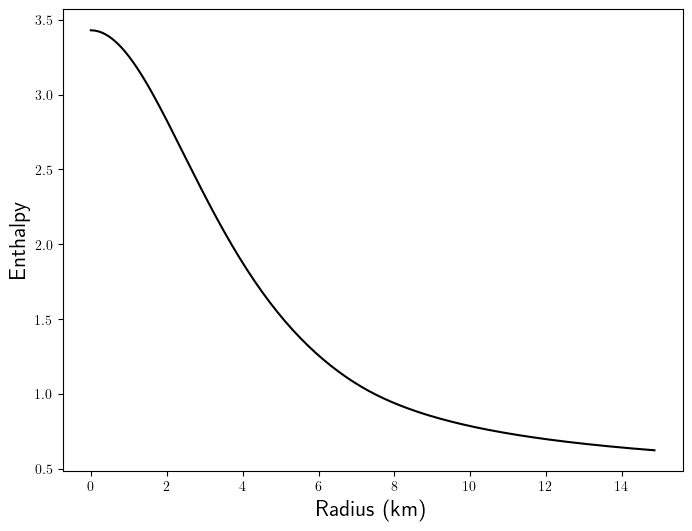

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5352/radius_density_relation.csv


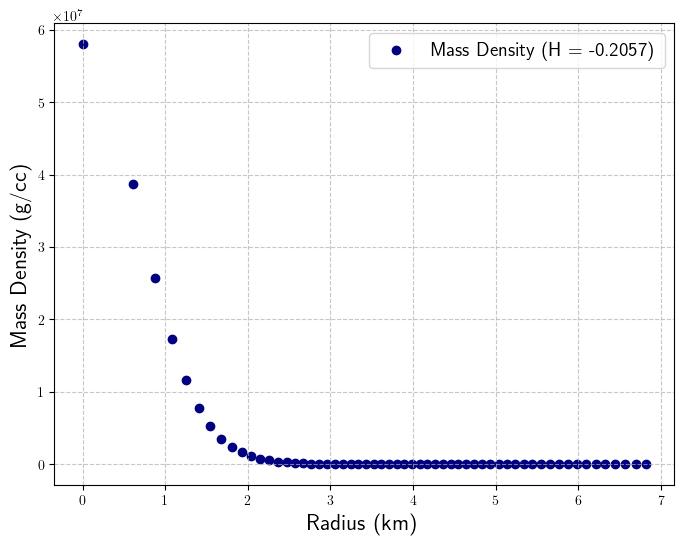

cutoff_index= 140
enthalpy= 140


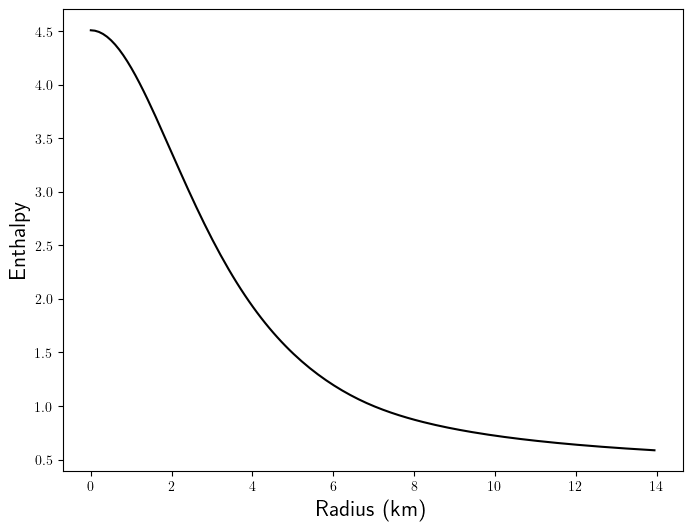

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6539/radius_density_relation.csv


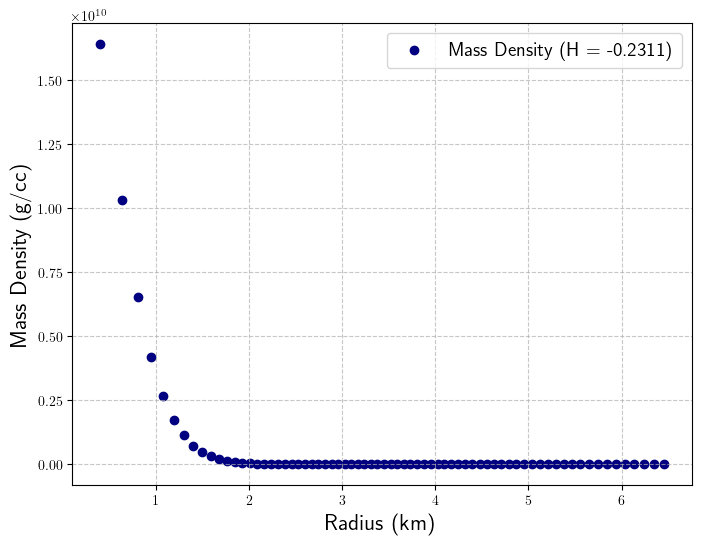

cutoff_index= 166
enthalpy= 166


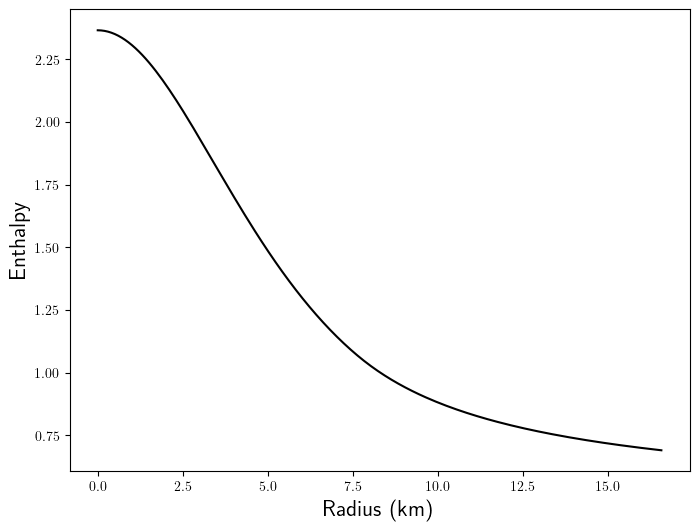

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3739/radius_density_relation.csv


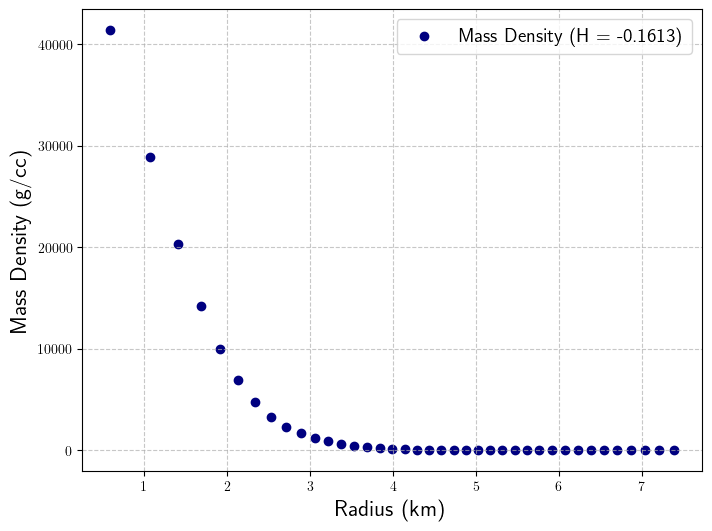

cutoff_index= 172
enthalpy= 172


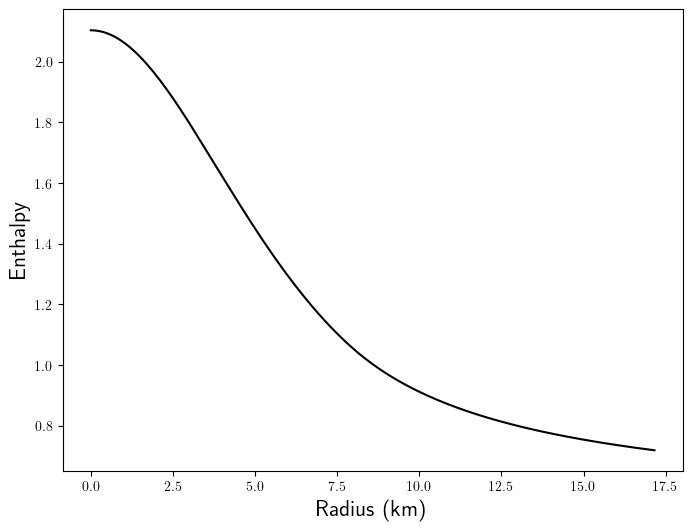

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3230/radius_density_relation.csv


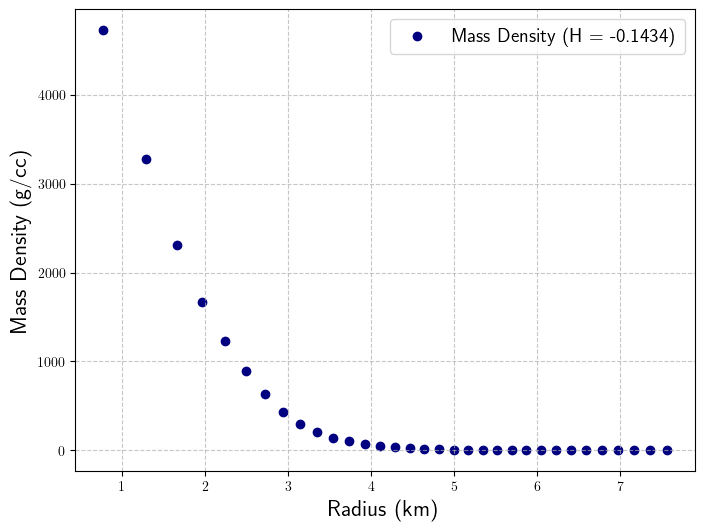

cutoff_index= 150
enthalpy= 150


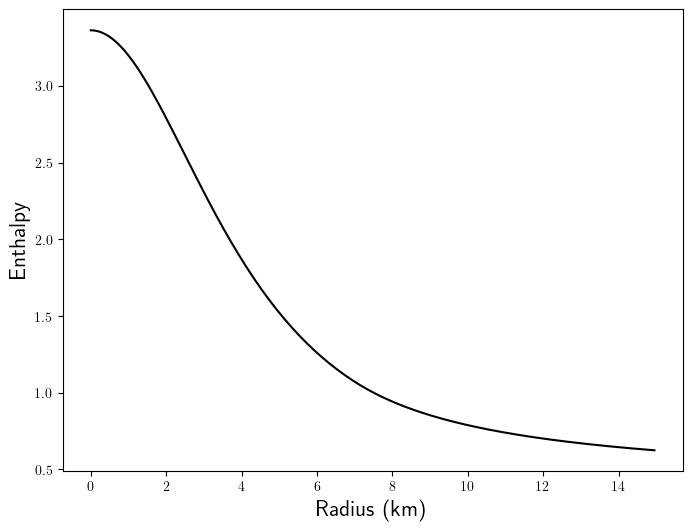

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5267/radius_density_relation.csv


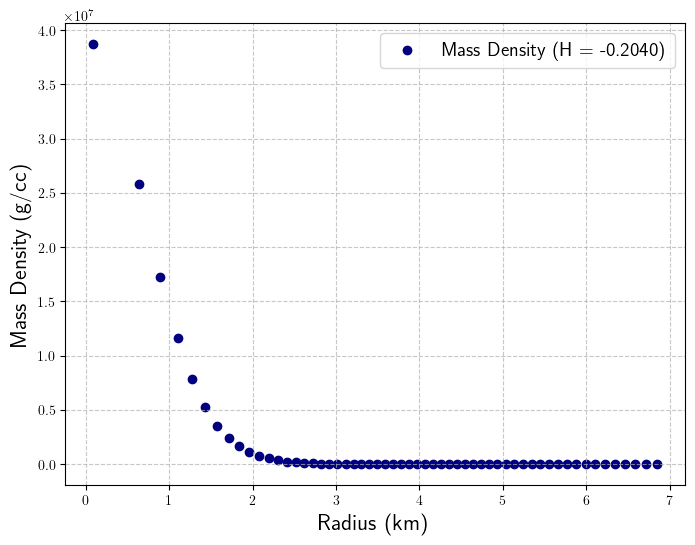

cutoff_index= 213
enthalpy= 213


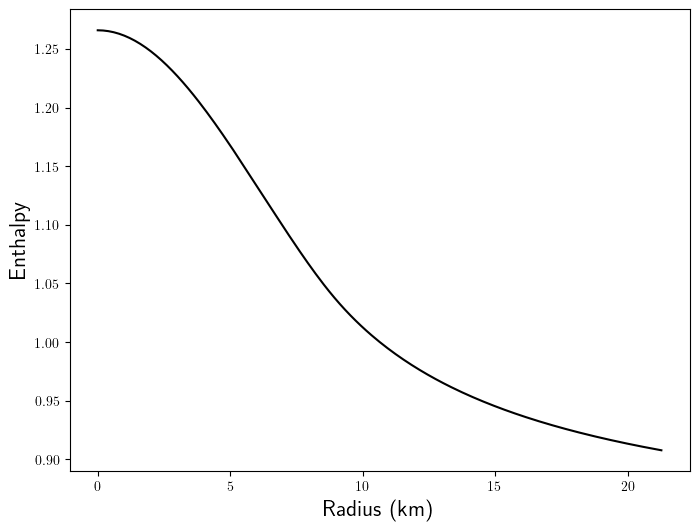

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1024/radius_density_relation.csv


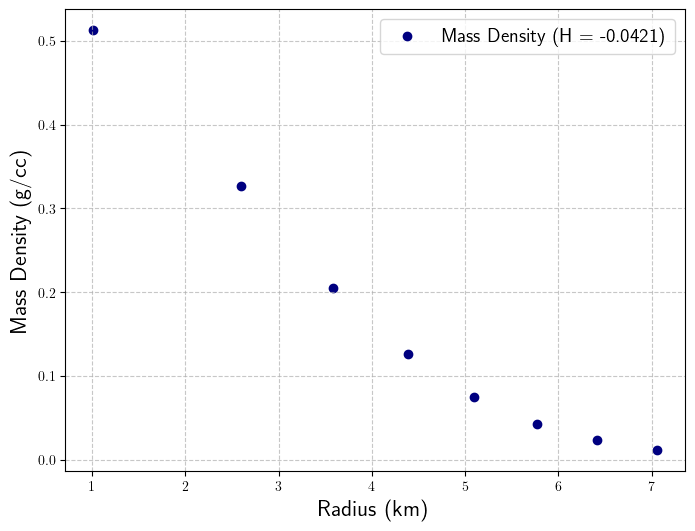

cutoff_index= 221
enthalpy= 221


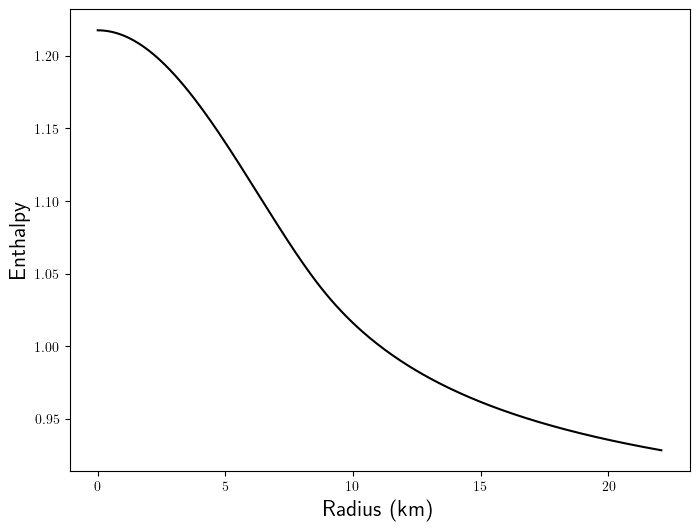

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.0855/radius_density_relation.csv


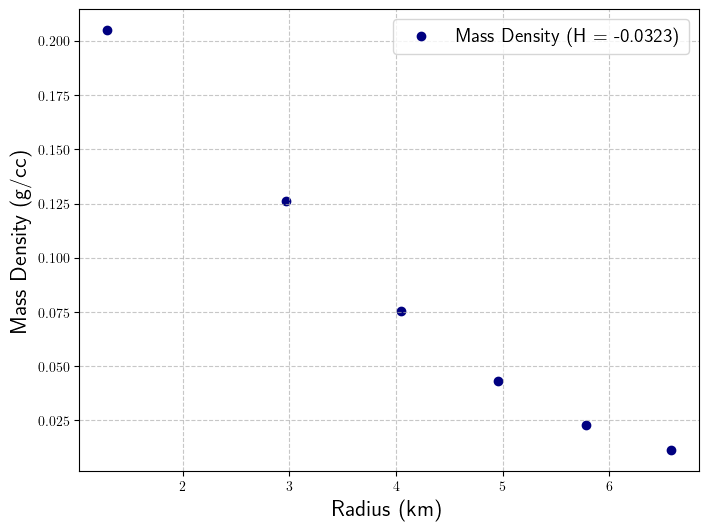

cutoff_index= 136
enthalpy= 136


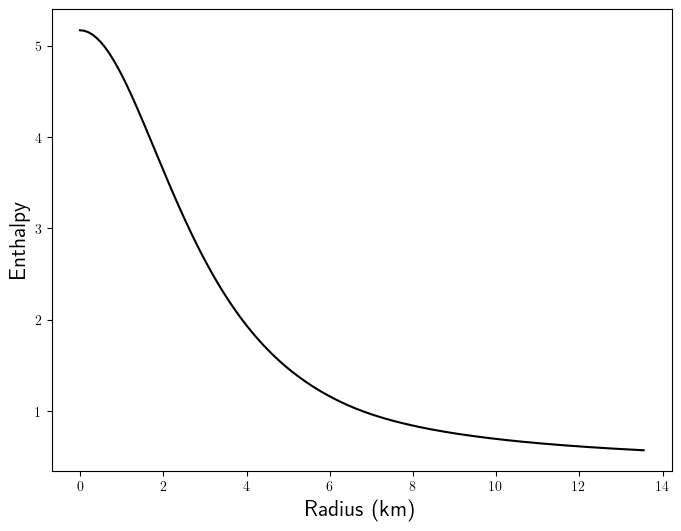

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7133/radius_density_relation.csv


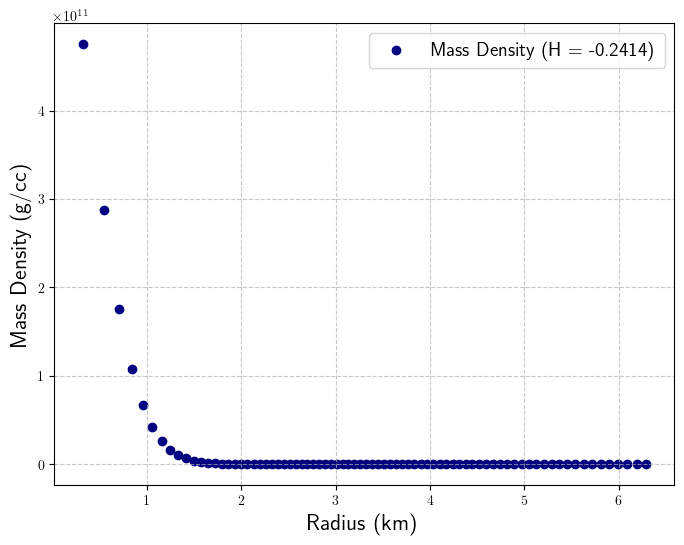

cutoff_index= 157
enthalpy= 157


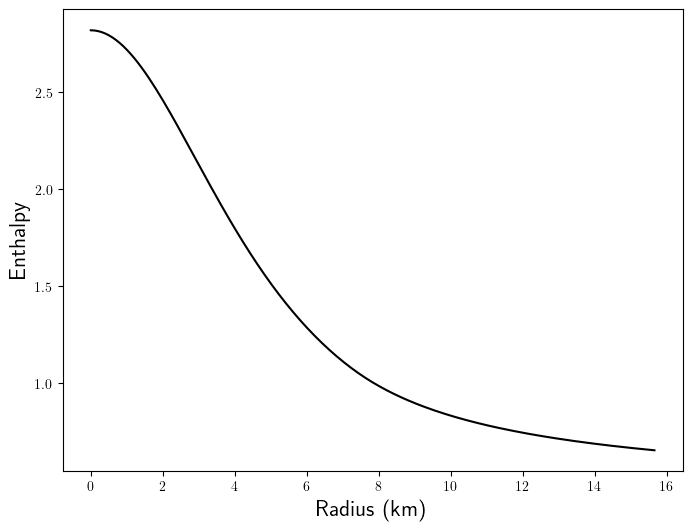

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4503/radius_density_relation.csv


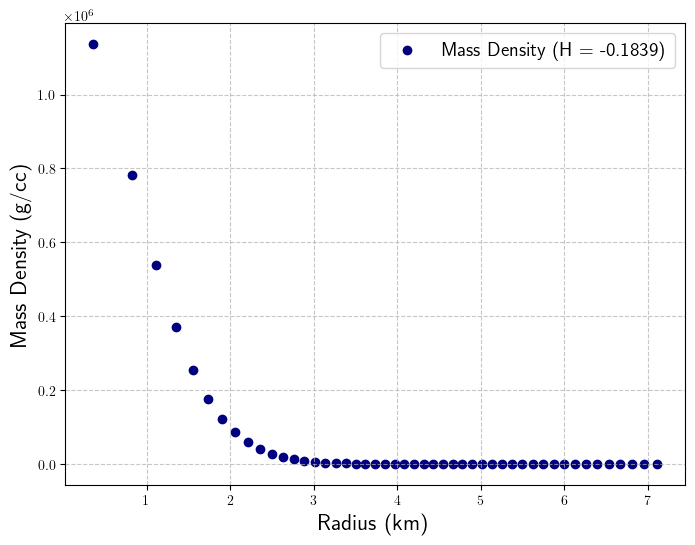

cutoff_index= 128
enthalpy= 128


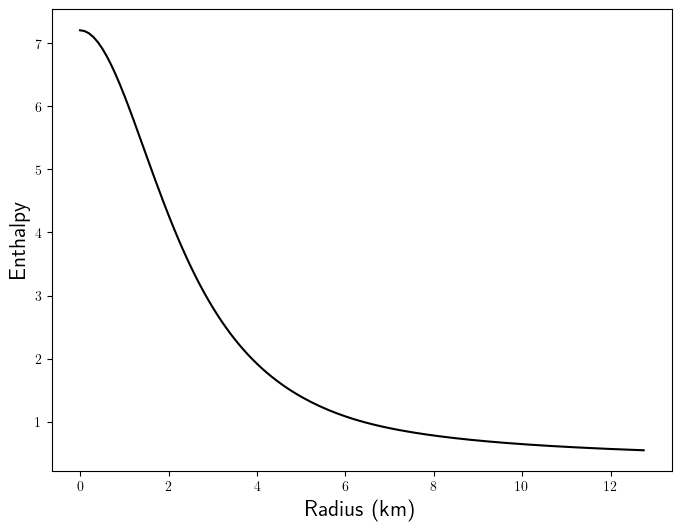

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.8576/radius_density_relation.csv


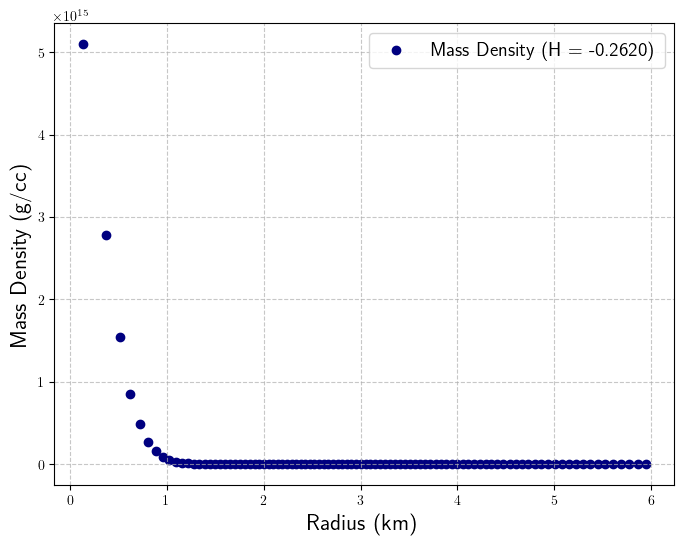

cutoff_index= 132
enthalpy= 132


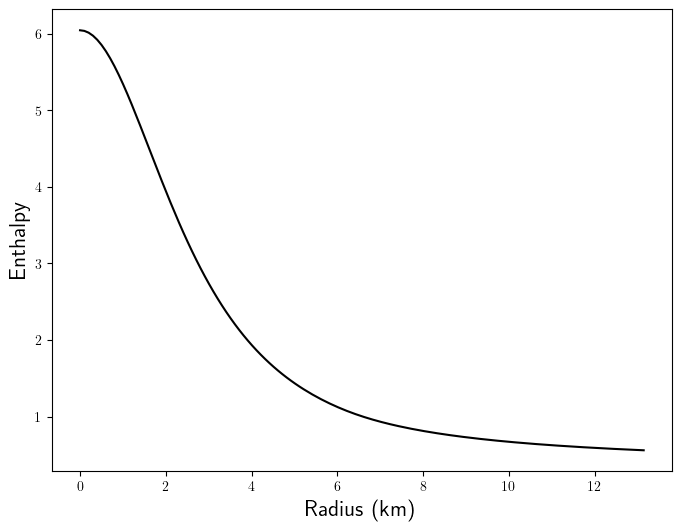

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7812/radius_density_relation.csv


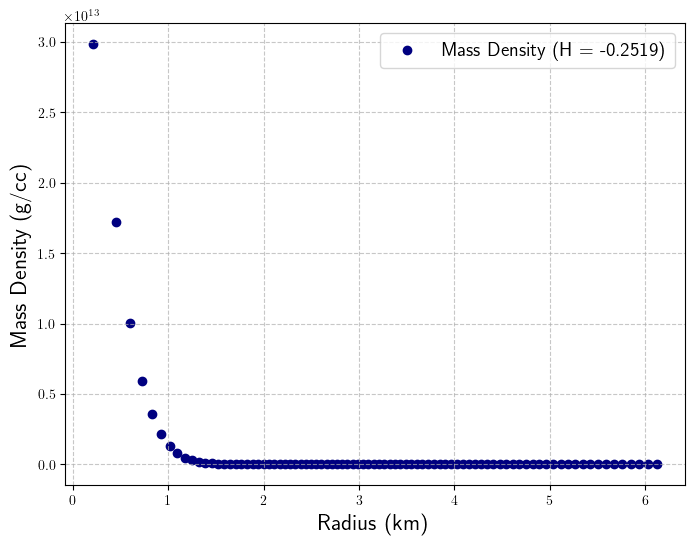

cutoff_index= 176
enthalpy= 176


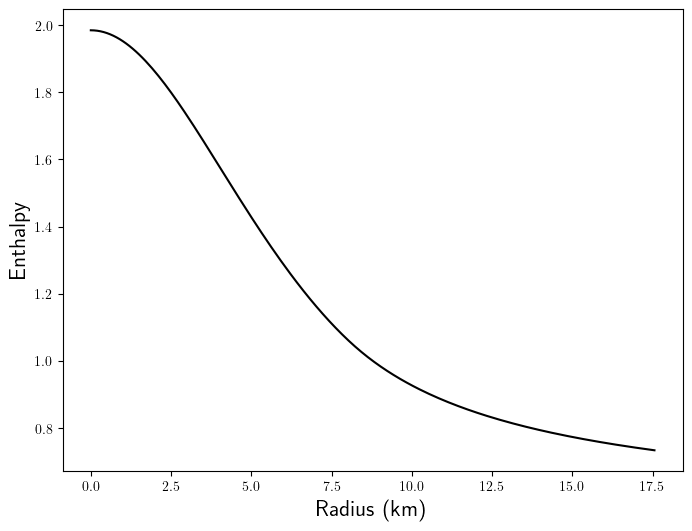

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2976/radius_density_relation.csv


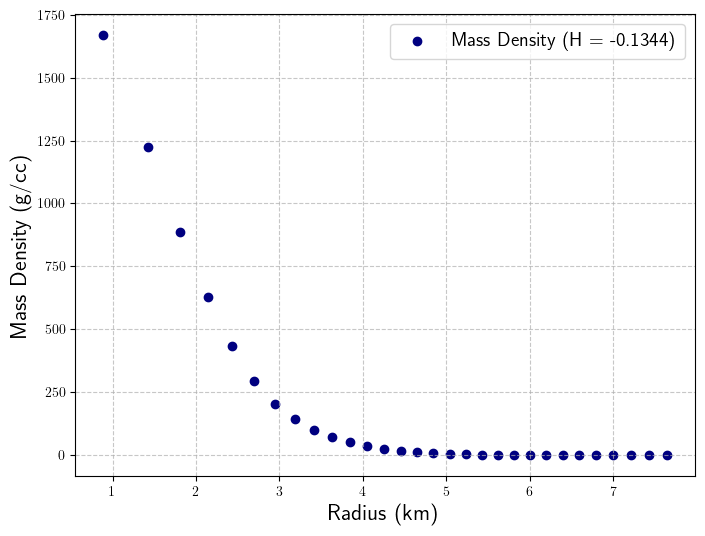

cutoff_index= 138
enthalpy= 138


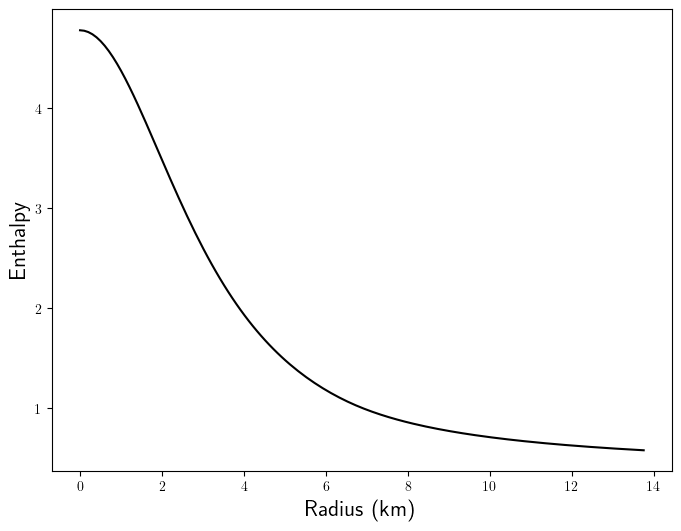

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6794/radius_density_relation.csv


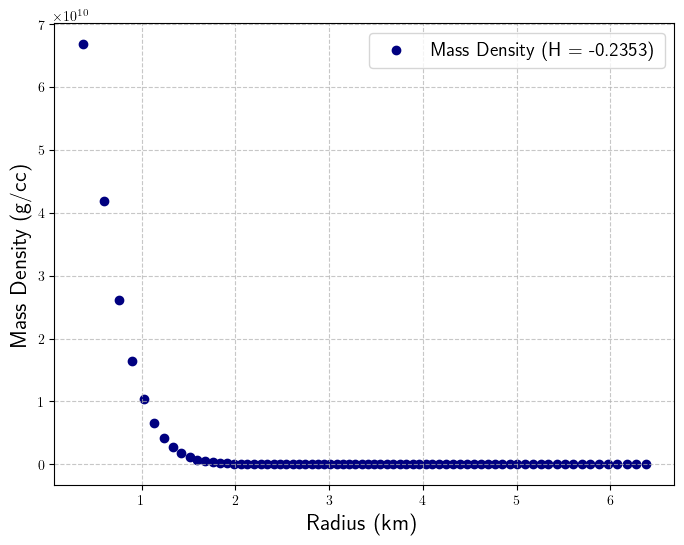

cutoff_index= 131
enthalpy= 131


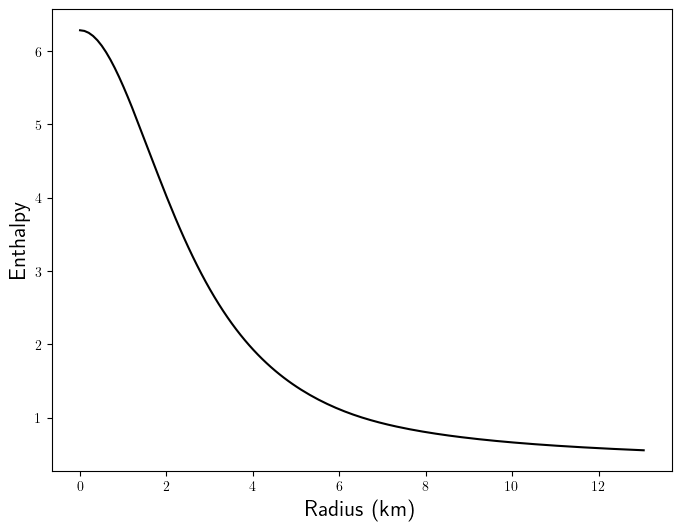

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7982/radius_density_relation.csv


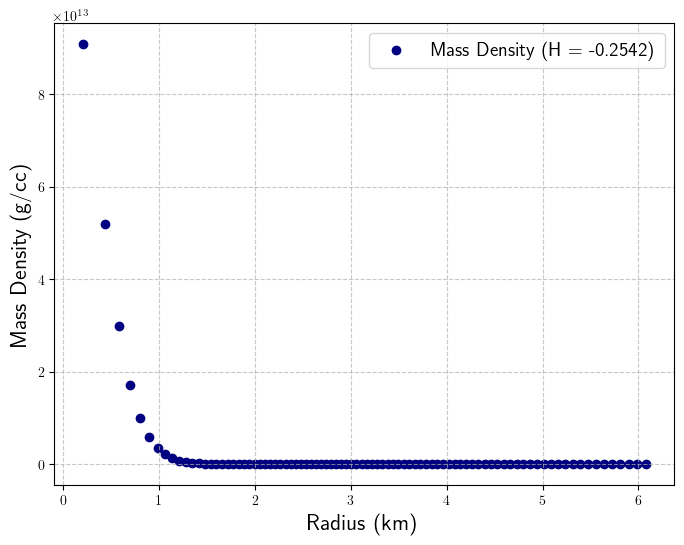

cutoff_index= 159
enthalpy= 159


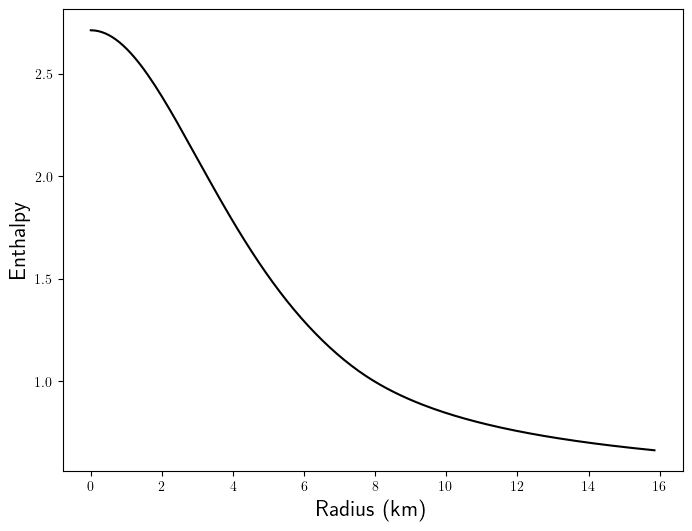

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4333/radius_density_relation.csv


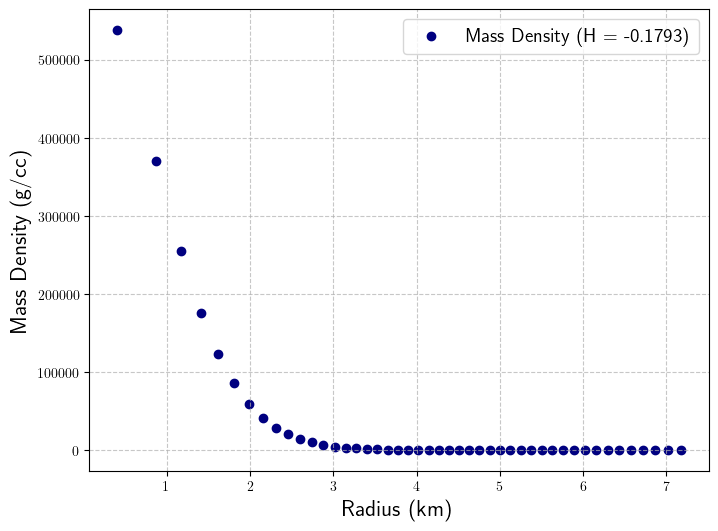

cutoff_index= 171
enthalpy= 171


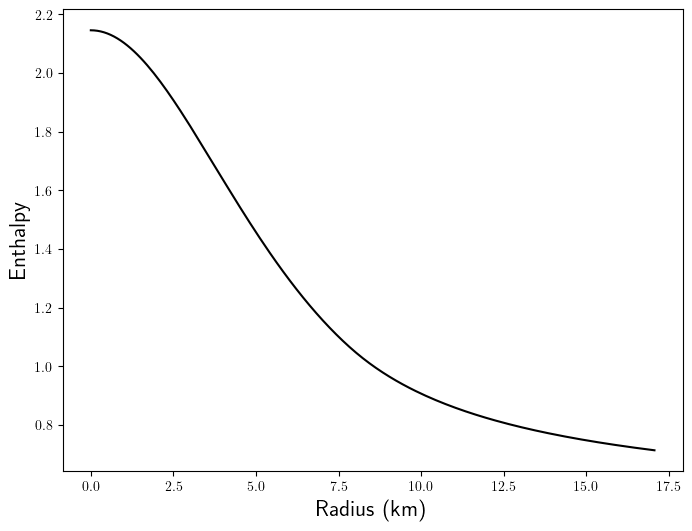

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3315/radius_density_relation.csv


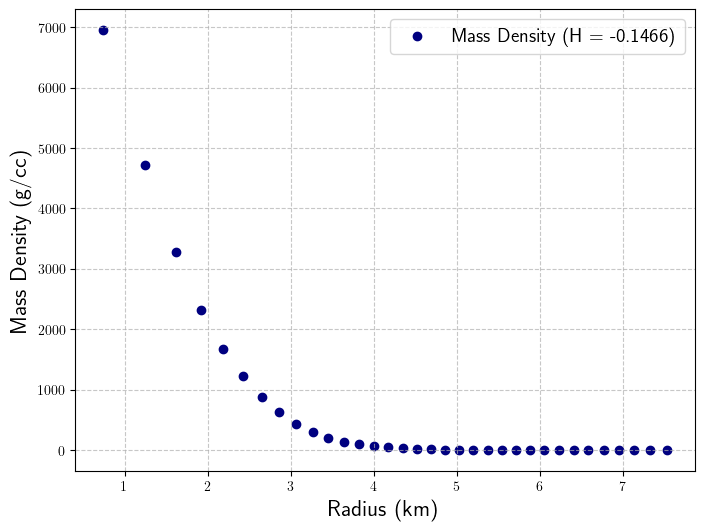

cutoff_index= 168
enthalpy= 168


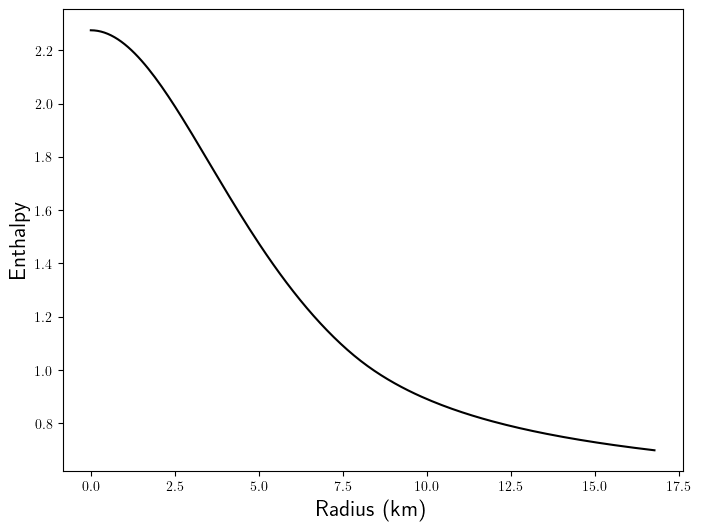

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3570/radius_density_relation.csv


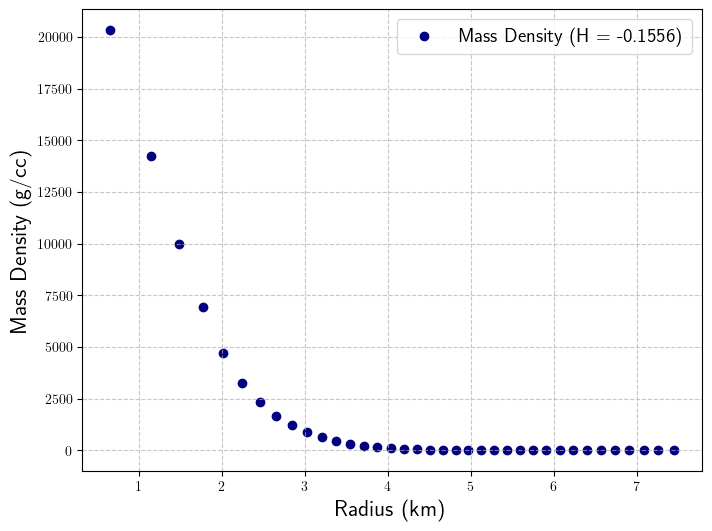

cutoff_index= 134
enthalpy= 134


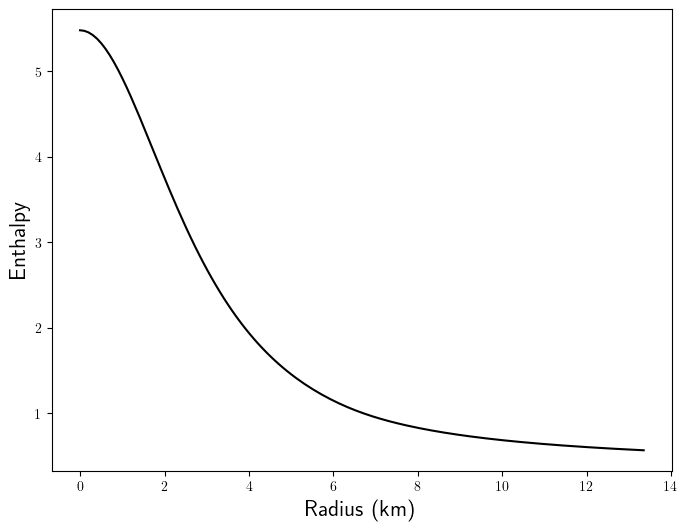

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7388/radius_density_relation.csv


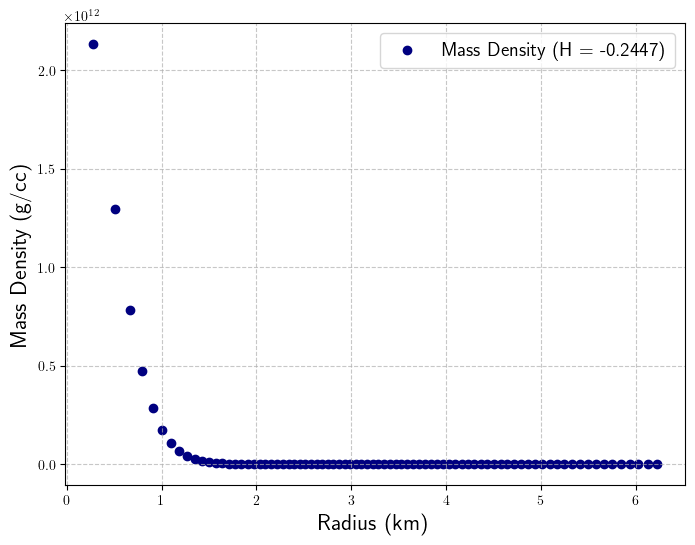

cutoff_index= 139
enthalpy= 139


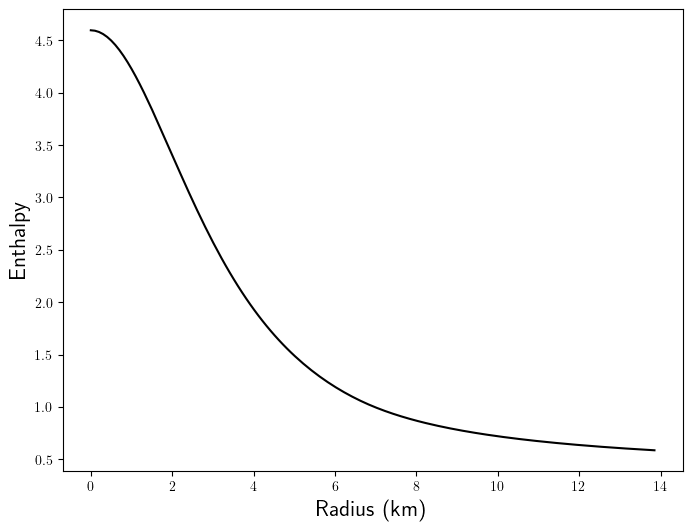

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6624/radius_density_relation.csv


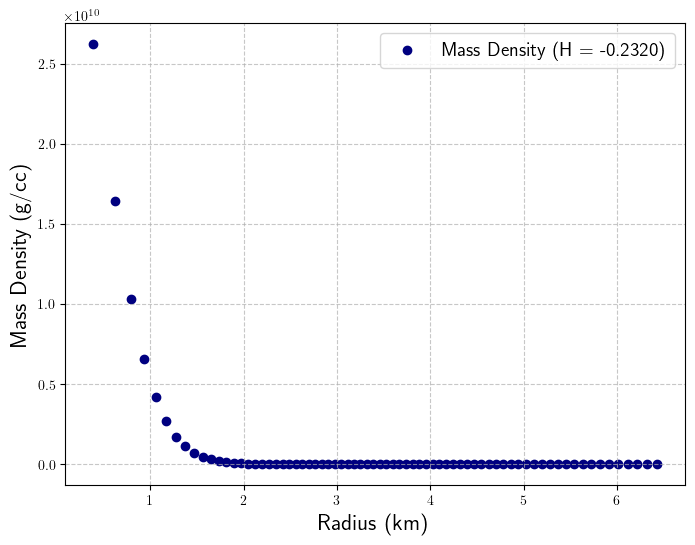

cutoff_index= 128
enthalpy= 128


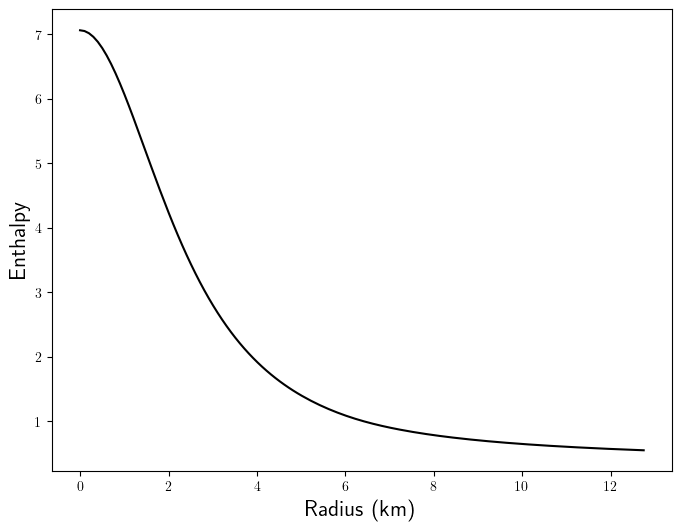

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.8491/radius_density_relation.csv


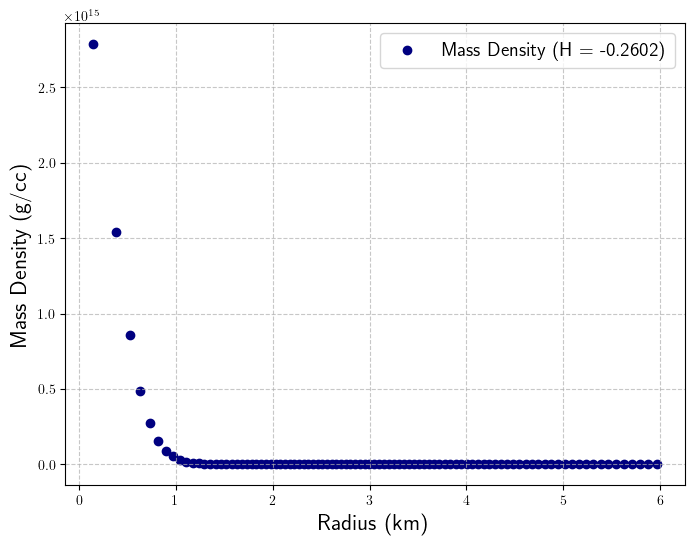

cutoff_index= 197
enthalpy= 197


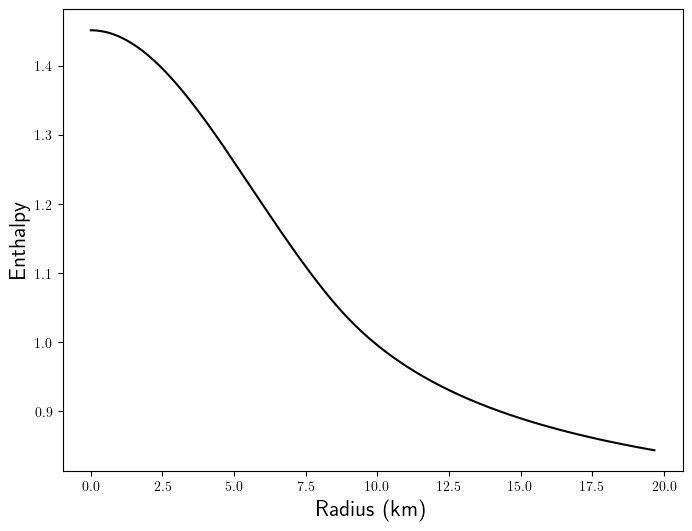

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1618/radius_density_relation.csv


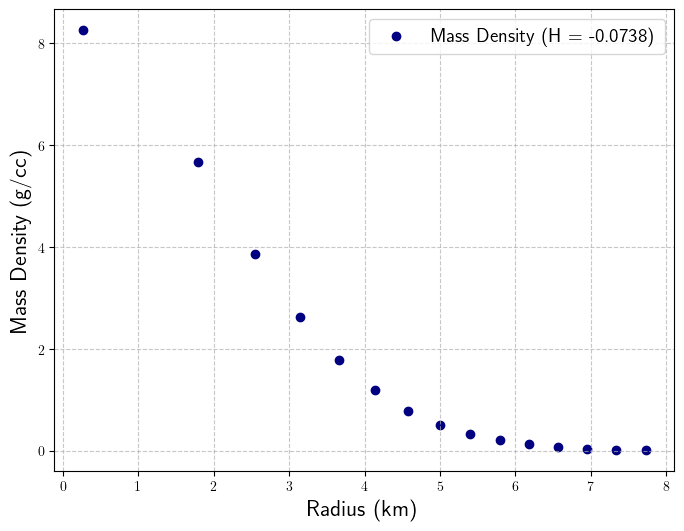

cutoff_index= 193
enthalpy= 193


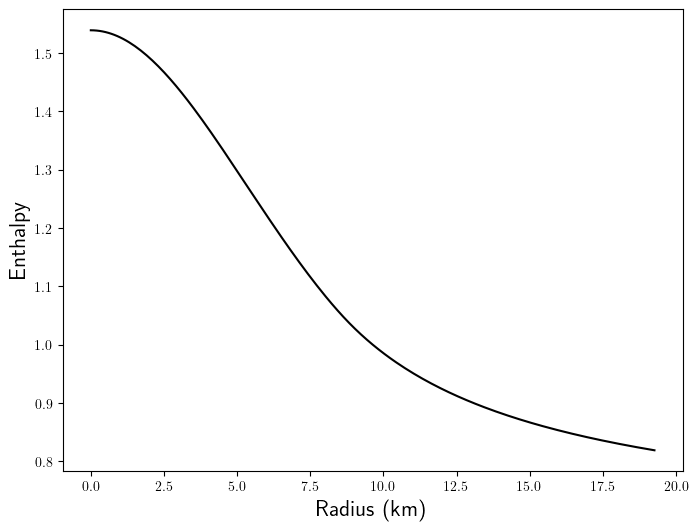

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1873/radius_density_relation.csv


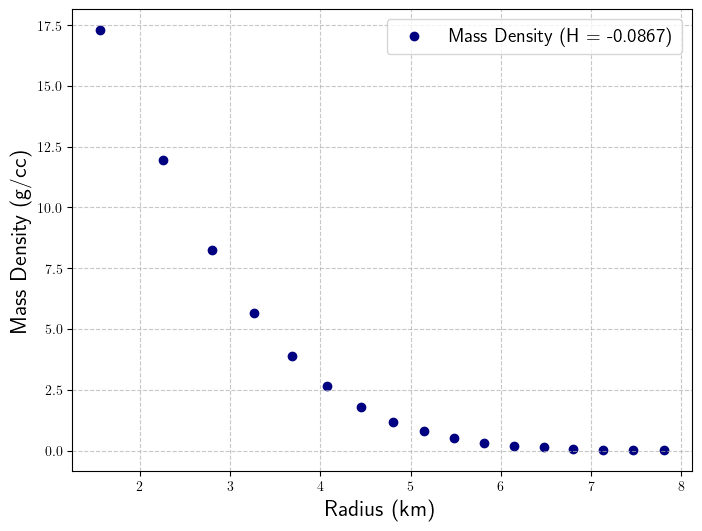

cutoff_index= 163
enthalpy= 163


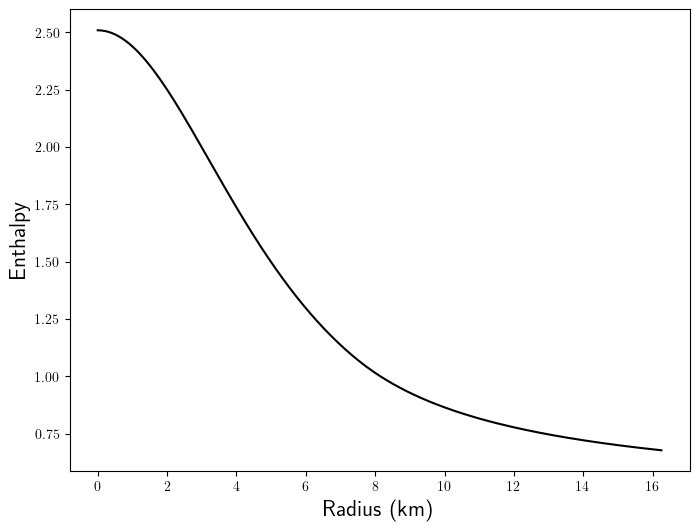

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3994/radius_density_relation.csv


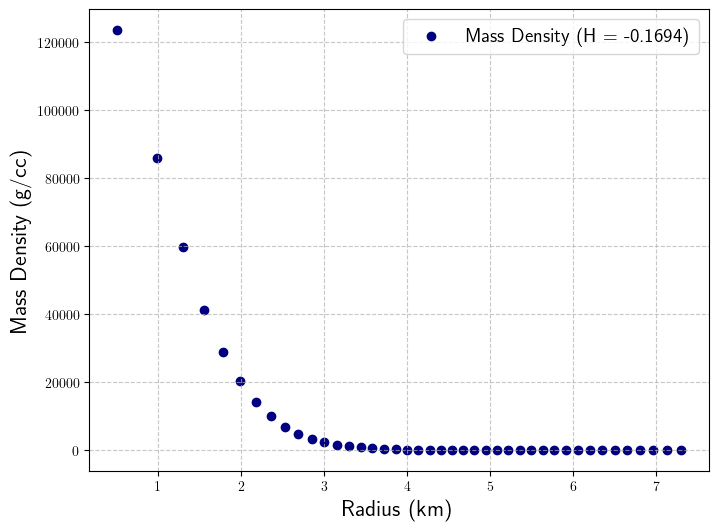

cutoff_index= 144
enthalpy= 144


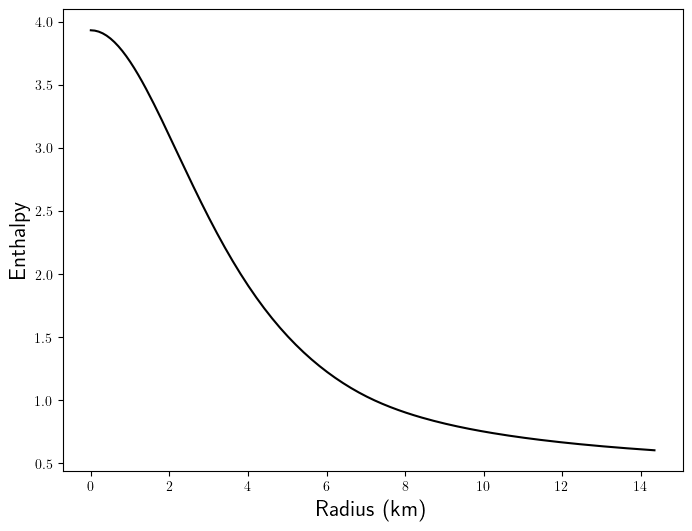

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5945/radius_density_relation.csv


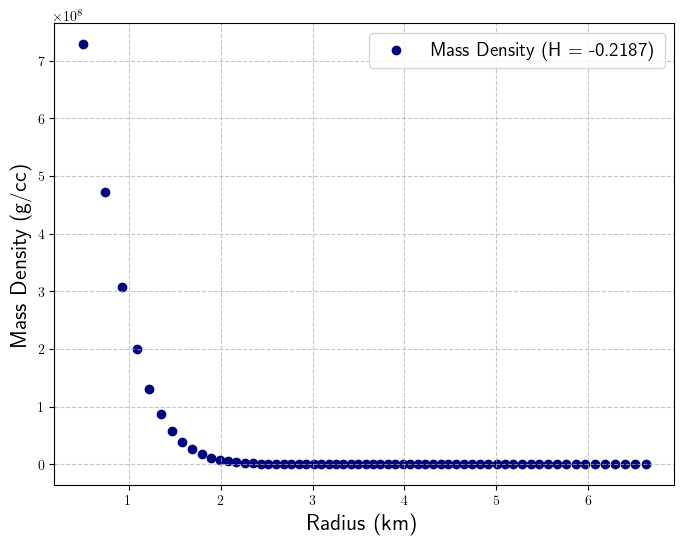

cutoff_index= 236
enthalpy= 236


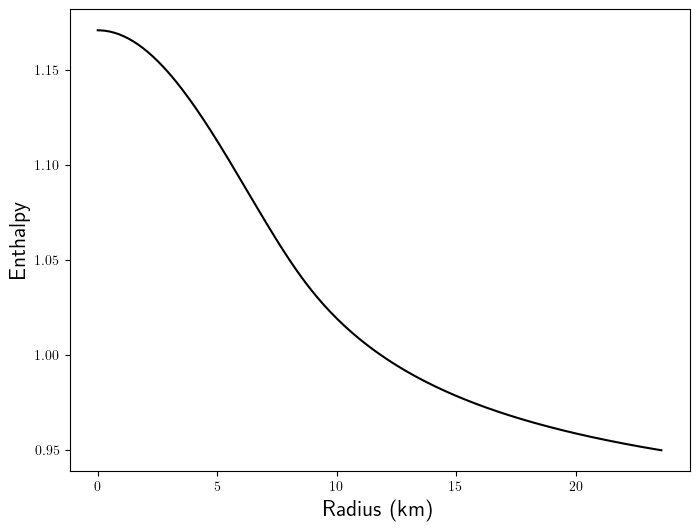

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.0685/radius_density_relation.csv


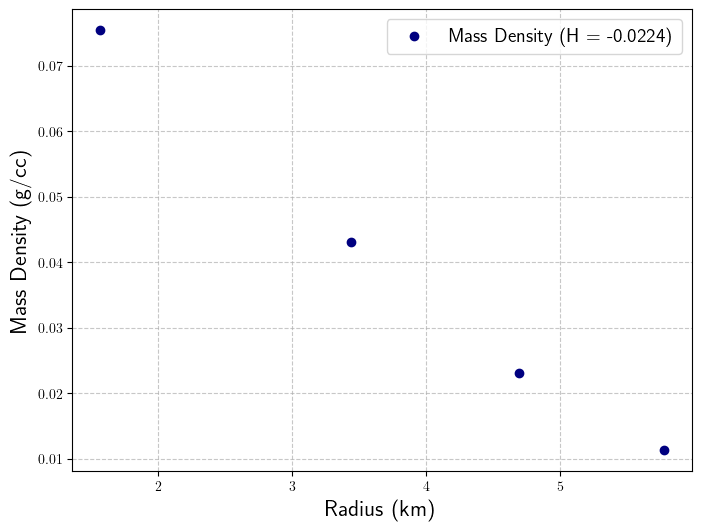

cutoff_index= 251
enthalpy= 251


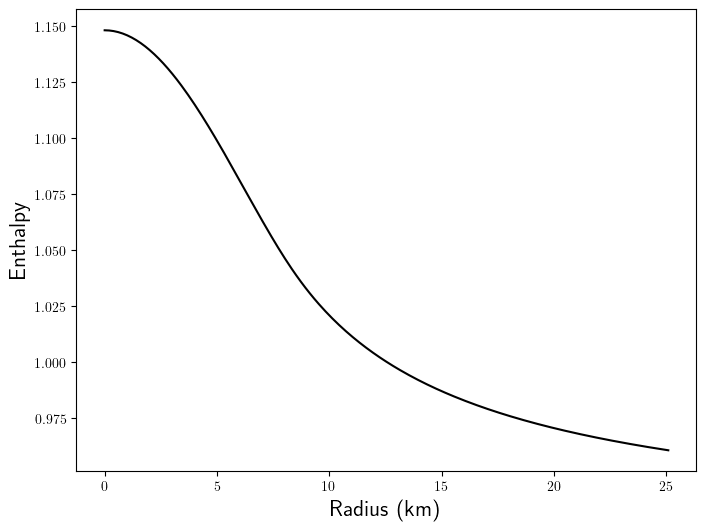

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.0600/radius_density_relation.csv


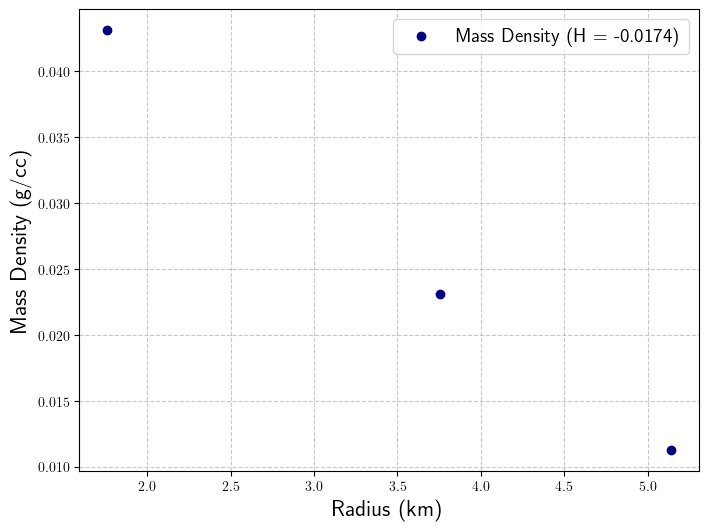

cutoff_index= 178
enthalpy= 178


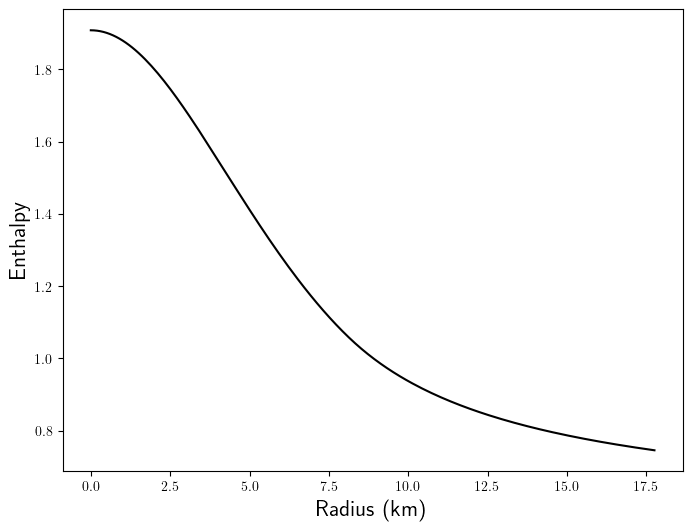

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2806/radius_density_relation.csv


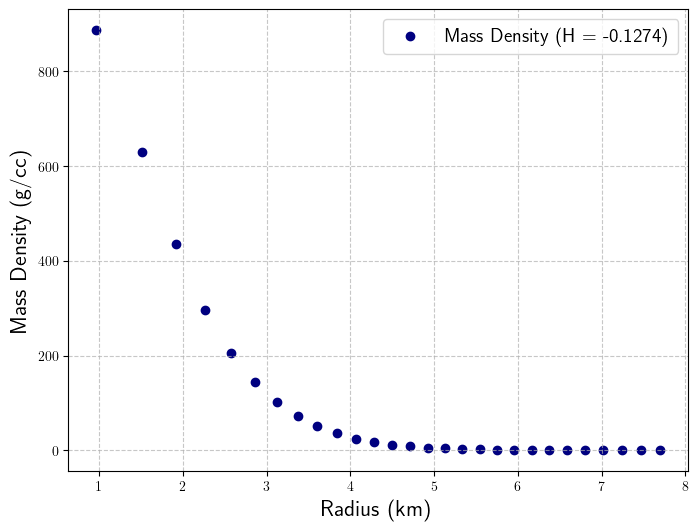

cutoff_index= 199
enthalpy= 199


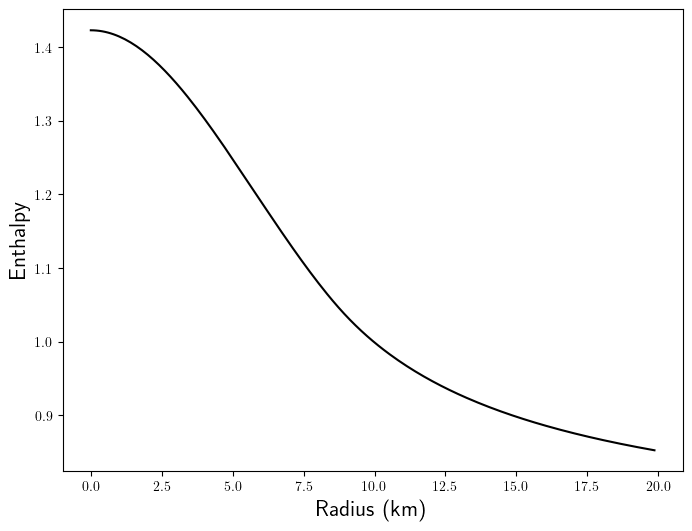

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.1533/radius_density_relation.csv


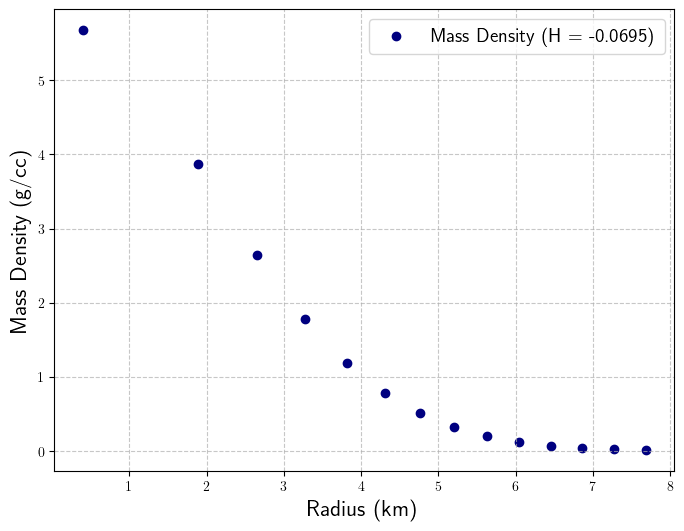

cutoff_index= 188
enthalpy= 188


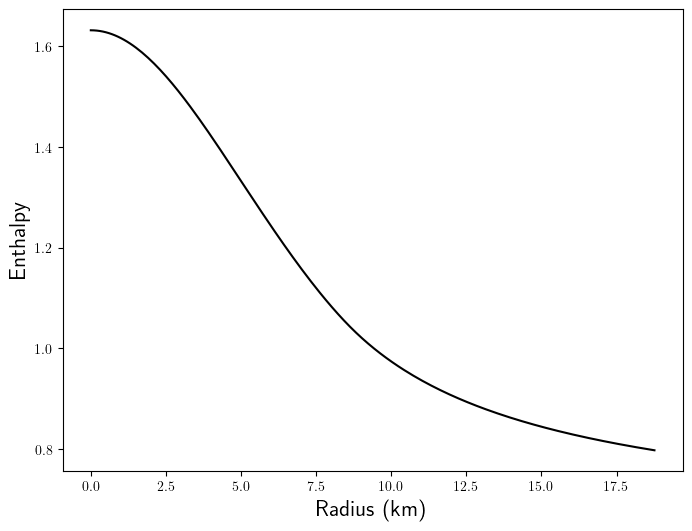

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2127/radius_density_relation.csv


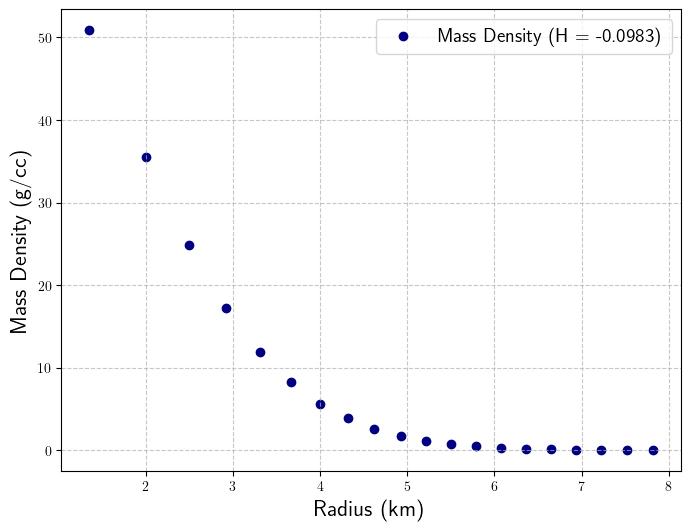

cutoff_index= 158
enthalpy= 158


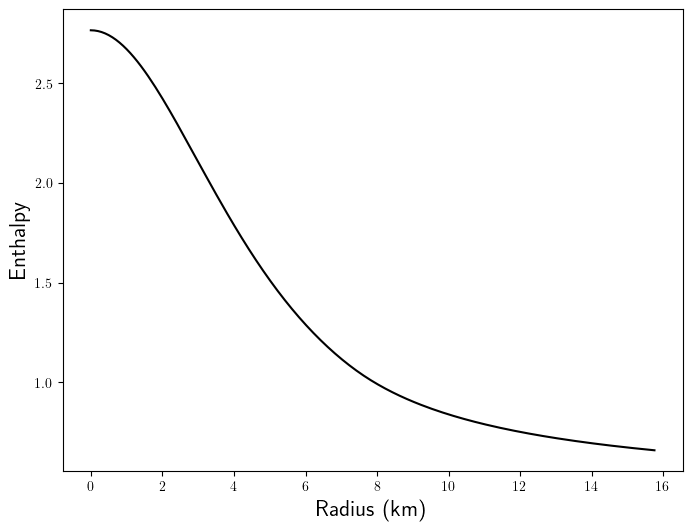

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4418/radius_density_relation.csv


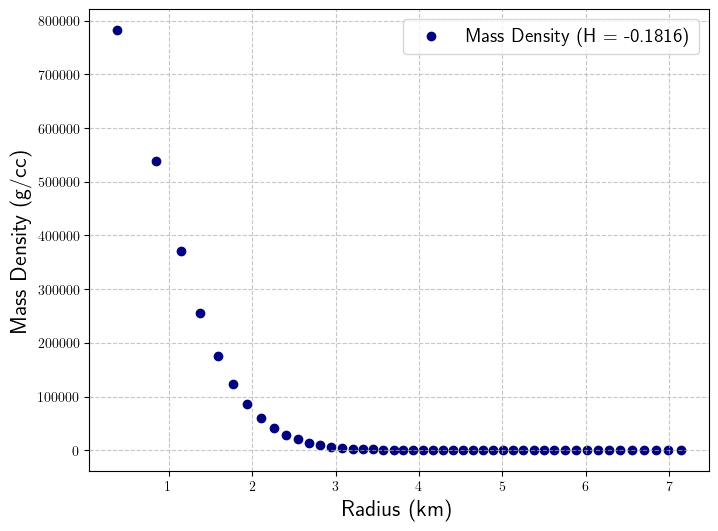

cutoff_index= 165
enthalpy= 165


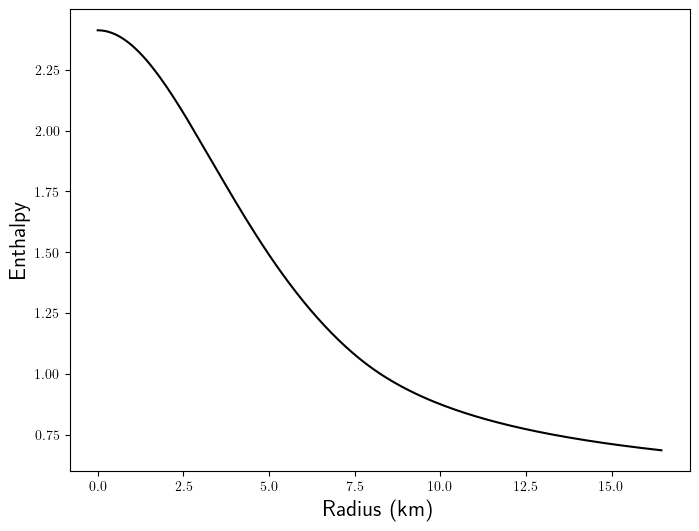

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.3824/radius_density_relation.csv


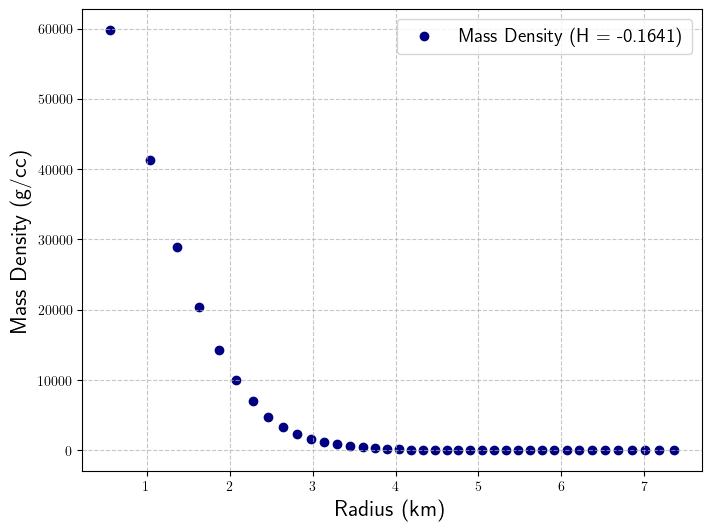

cutoff_index= 126
enthalpy= 126


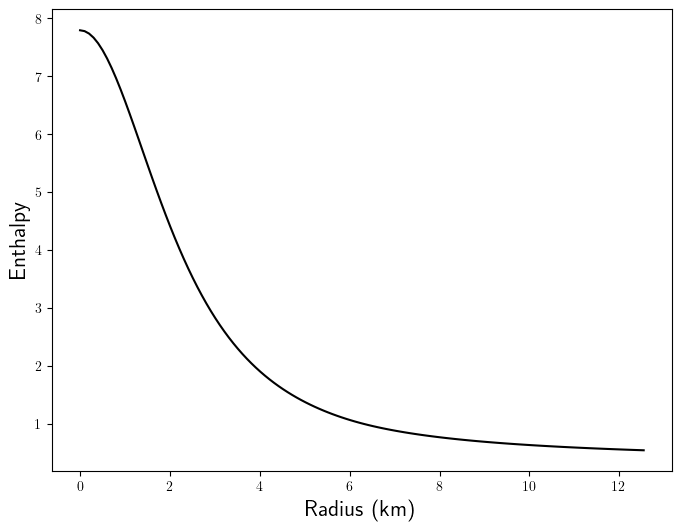

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.8915/radius_density_relation.csv


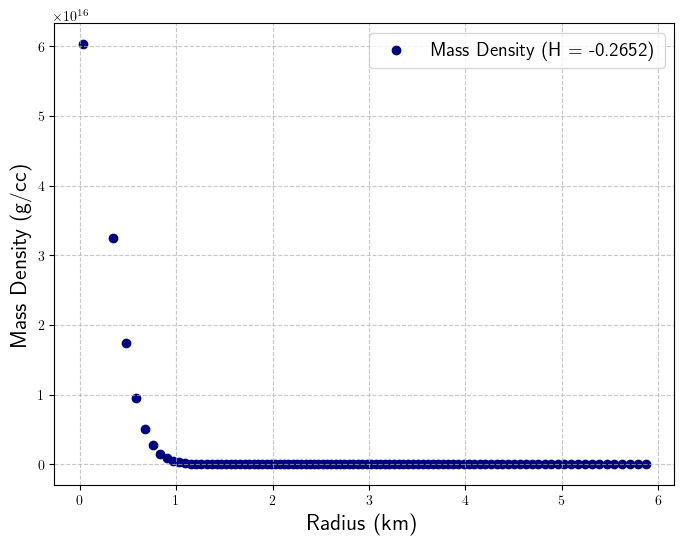

cutoff_index= 127
enthalpy= 127


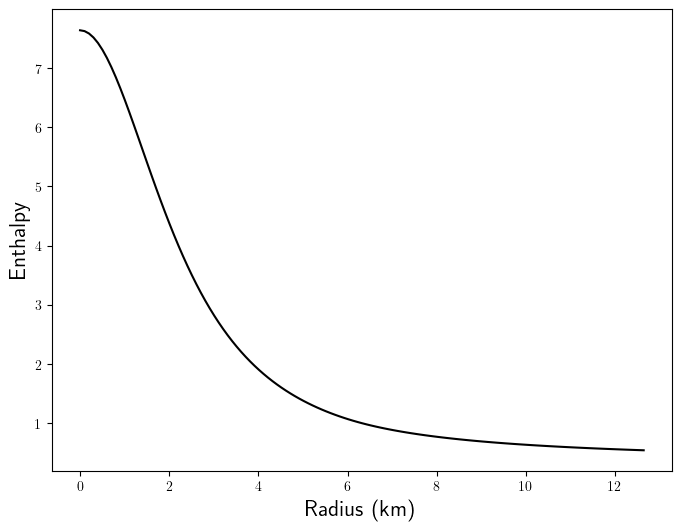

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.8830/radius_density_relation.csv


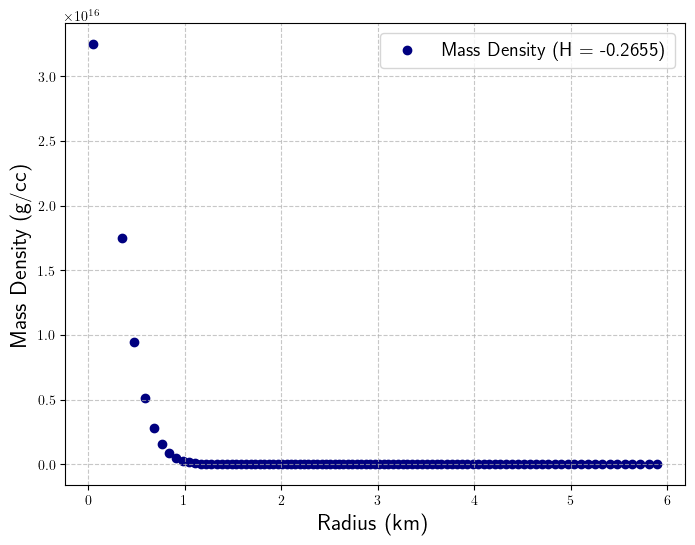

cutoff_index= 160
enthalpy= 160


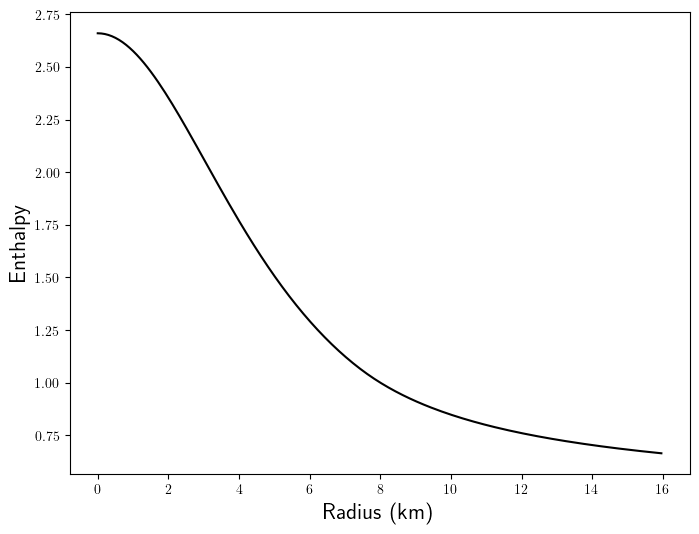

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.4248/radius_density_relation.csv


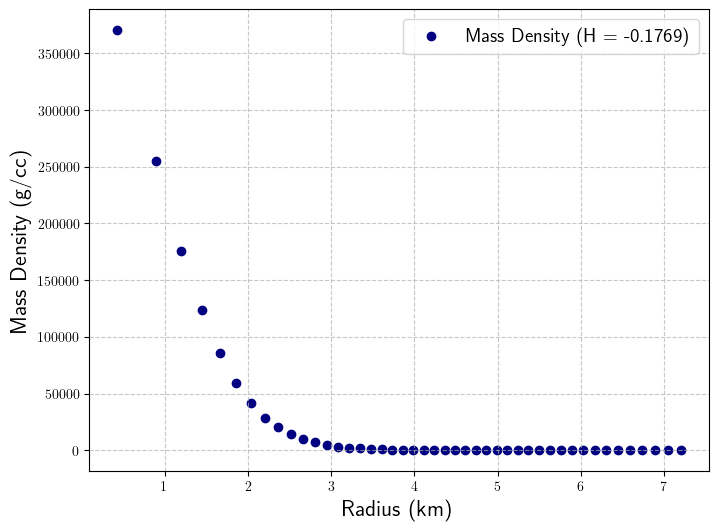

cutoff_index= 187
enthalpy= 187


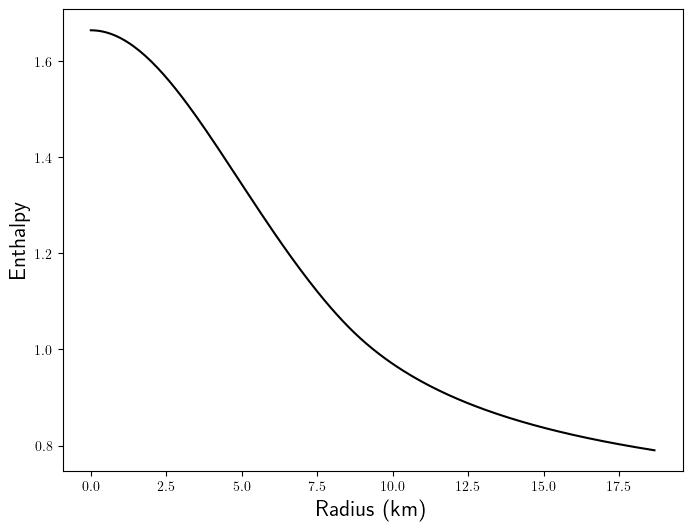

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2212/radius_density_relation.csv


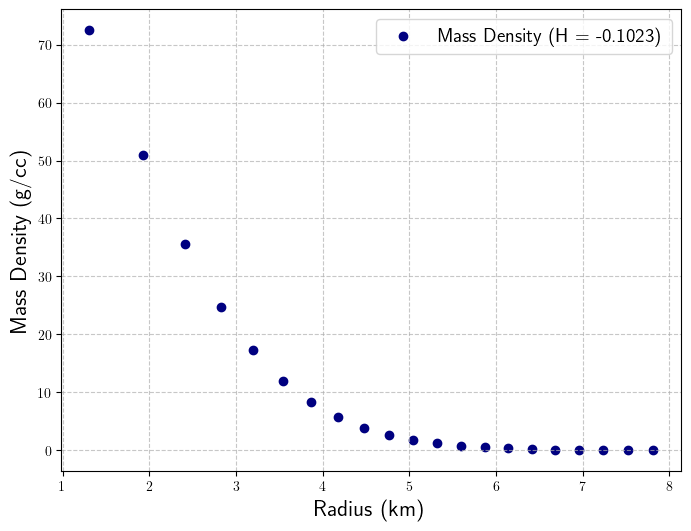

cutoff_index= 177
enthalpy= 177


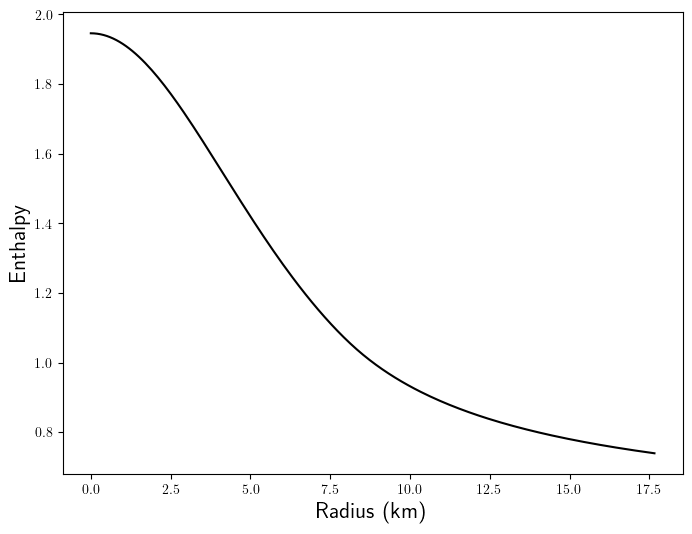

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2891/radius_density_relation.csv


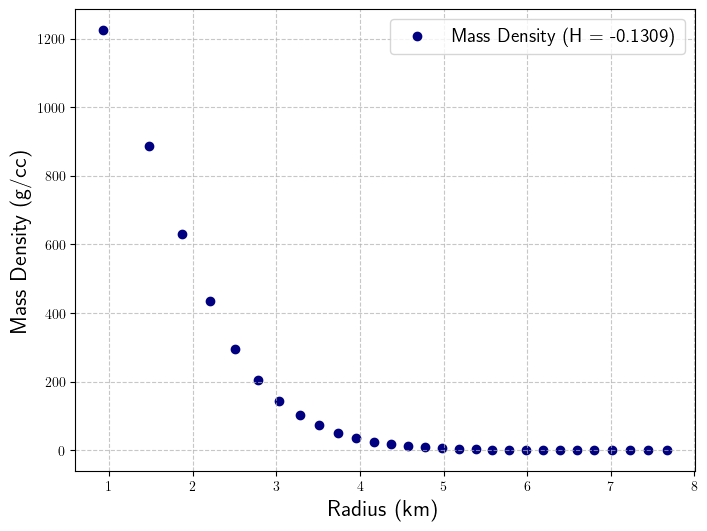

cutoff_index= 144
enthalpy= 144


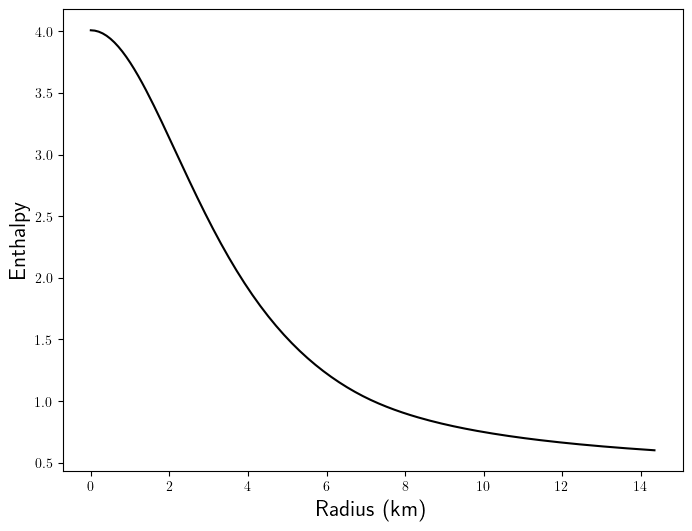

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.6030/radius_density_relation.csv


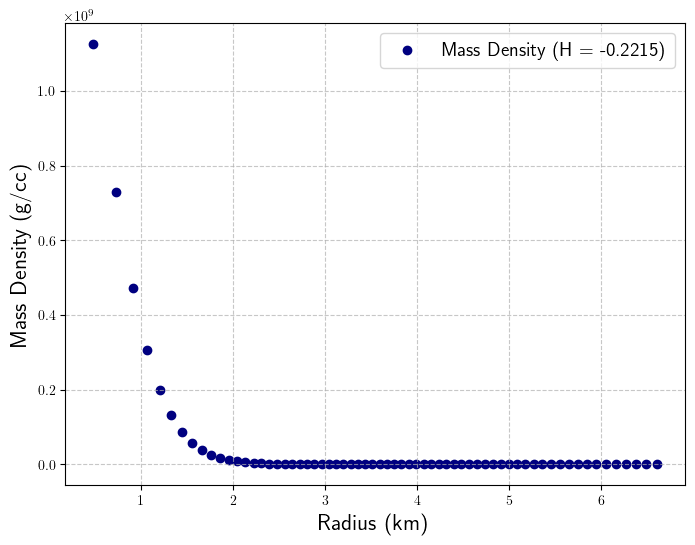

cutoff_index= 131
enthalpy= 131


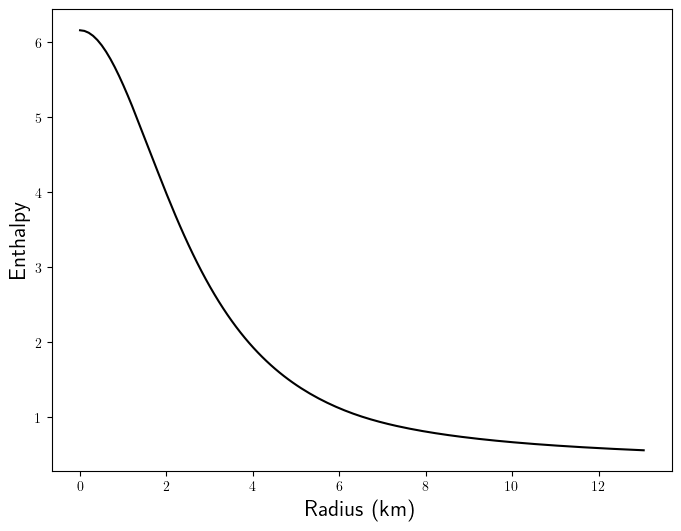

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.7897/radius_density_relation.csv


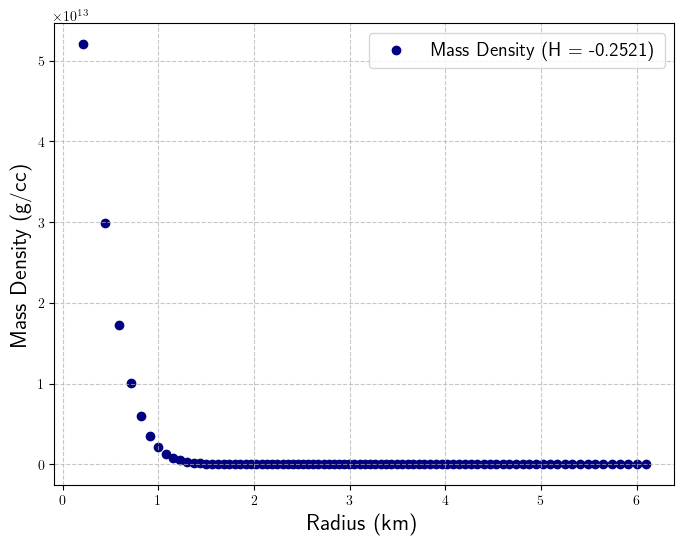

cutoff_index= 152
enthalpy= 152


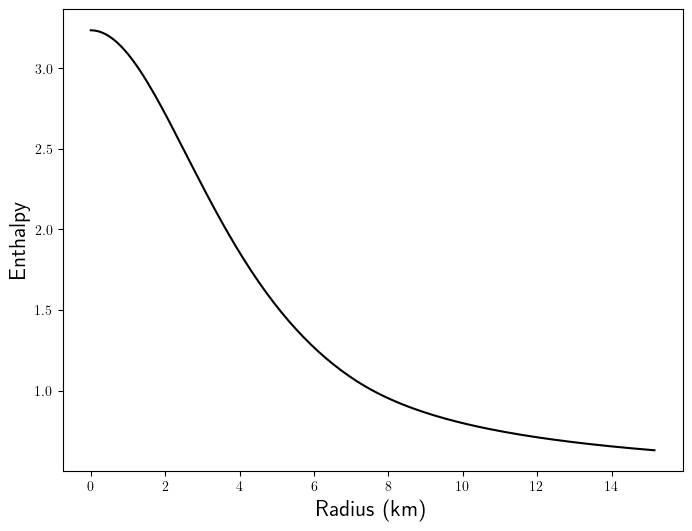

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.5097/radius_density_relation.csv


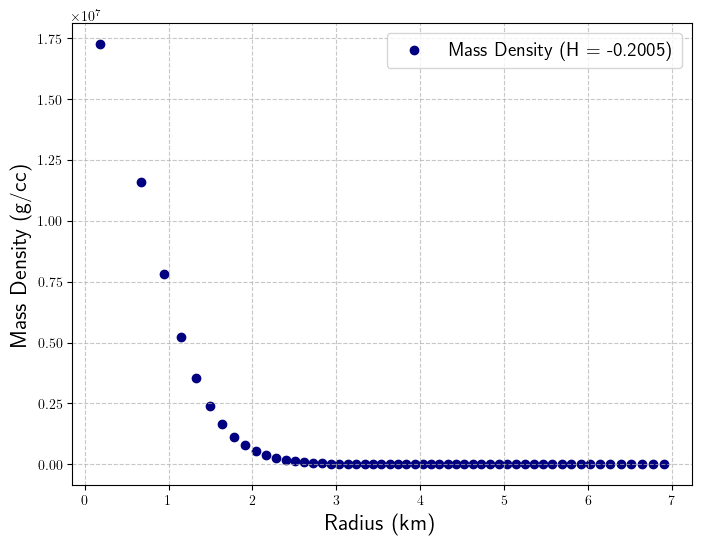

cutoff_index= 186
enthalpy= 186


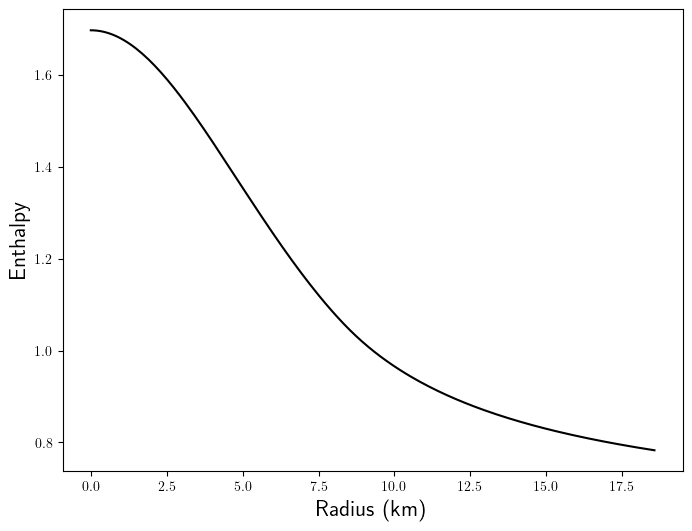

100
Density-Radius relation saved to /home/sanjana/apps/Lorene/Codes/Nrotstar_(APR100)_(0.06-0.9)_stat_nrot/results_H_0.2297/radius_density_relation.csv


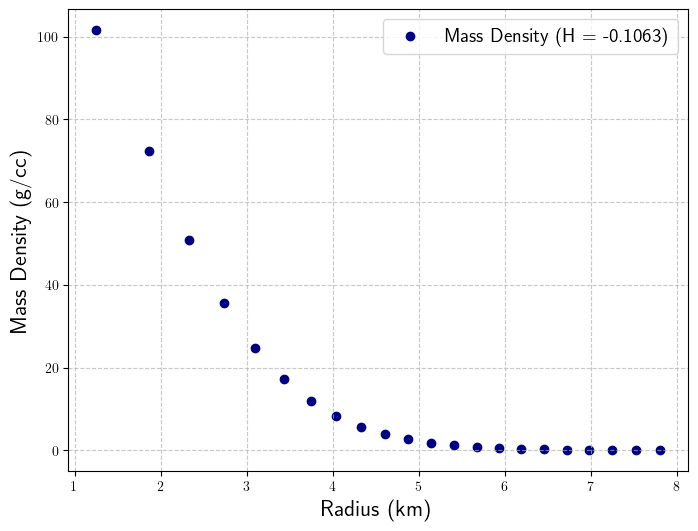

In [6]:
# Base directory
base_dir = "/home/sanjana/apps/Lorene/Codes/"
csv_dir = "/home/sanjana/ashoka/thesis/lorene_stuff"

# Baryon mass in grams (approximate mass of a proton/neutron)
baryon_mass = 1.6726219e-24  # g
c = 29979245800
c_squared = c**2

# Conversion factor from fm^-3 to cm^-3
fm3_to_cm3 = 1e39

# List of folder names
folders = [
    "Nrotstar_(APR100)_(0.06-0.9)_stat_nrot",
]

# Find the extracted data CSV file
extracted_data_files = glob.glob(os.path.join(csv_dir, "*_nrot_extracted_data.csv"))
if not extracted_data_files:
    raise FileNotFoundError("No '_nrot_extracted_data.csv' file found in the base directory.")

extracted_data_file = extracted_data_files[0]  # Assuming only one such file exists

# Read extracted enthalpy and central baryon density data
df = pd.read_csv(extracted_data_file)

enthalpy_vals = df["Central enthalpy"].values  # Enthalpy from CSV
density_vals = df["Central proper energy density"].values  

plt.figure(figsize=(8, 6))
plt.plot(density_vals, enthalpy_vals, 'g')
plt.xlabel("Energy Density", fontsize = 16)
plt.ylabel("Enthalpy", fontsize = 16)
plt.show()

enthalpy_vals = 10**enthalpy_vals ###################

# Iterate through each folder
for folder in folders:
    folder_path = os.path.join(base_dir, folder)

    # Identify subfolders starting with 'results_H_'
    for subfolder in os.listdir(folder_path):
        if subfolder.startswith("results_H_"):
            subfolder_path = os.path.join(folder_path, subfolder)
            prof_file = os.path.join(subfolder_path, "prof_h.d")

            if os.path.exists(prof_file):
                # Load radius and enthalpy data from 'prof_h.d'
                data = np.loadtxt(prof_file, usecols=(0, 1))  # First column: radius, second: enthalpy
                radius_km = data[:, 0]  # Radius in km
                enthalpy = data[:, 1]  # Enthalpy 
                enthalpy = 10**enthalpy
                
                # Find the index where enthalpy first becomes zero
                zero_index = np.where(enthalpy ==1)[0]
                if len(zero_index) > 0:
                    cutoff_index = zero_index[0]  # Get first occurrence of zero
                    print('cutoff_index=',cutoff_index) 
                    radius_km = radius_km[:cutoff_index]  # Keep values before zero
                    #print('radius_km=',radius_km)
                    enthalpy = enthalpy[:cutoff_index]  # Keep values before zero
                    print('enthalpy=',len(enthalpy))

                enthalpy = enthalpy[::-1]
                radius_km = radius_km[::-1]

                plt.figure(figsize=(8, 6))
                plt.plot(radius_km, enthalpy, 'k')
                plt.xlabel("Radius (km)", fontsize = 16)
                plt.ylabel("Enthalpy", fontsize = 16)
                plt.show()
                
                enthalpy_to_radius_spline = interp.CubicSpline(enthalpy, radius_km, bc_type='natural', extrapolate=False) ########
                # Interpolate density from enthalpy
                log_energy_density = density_vals 

                # Convert log number density (fm^-3) to actual number density (cm^-3)
                #number_density_cm3 = (10 ** log_number_density) * fm3_to_cm3
                energy_density_cgs = 10**(log_energy_density) * 2.3e14 #(kg/m3 to g/cc)

                radius_km = enthalpy_to_radius_spline(enthalpy_vals)

                # Convert number density to mass density (g/cc)
                mass_density = energy_density_cgs/c_squared
                print(len(mass_density))
                # Store results
                all_data = []
                for r, h, e, rho in zip(radius_km, enthalpy, energy_density_cgs, mass_density):
                    all_data.append([folder, subfolder, r, h, e, rho])

                # Convert to DataFrame
                output_df = pd.DataFrame(all_data, columns=["Folder", "Subfolder", "Radius (km)", "Log Enthalpy", "Energy Density (cgs)", "Mass Density (g/cc)"])

                # Save in the `subfolder_path`
                output_file = os.path.join(subfolder_path, "radius_density_relation.csv")
                output_df.to_csv(output_file, index=False)

                print(f"Density-Radius relation saved to {output_file}")

                # **Plot Mass Density vs Radius**
                plt.figure(figsize=(8, 6))
                plt.scatter(radius_km, mass_density, label="Mass Density", color="navy", linewidth=1)
                plt.xlabel("Radius (km)", fontsize = 16)
                plt.ylabel("Mass Density (g/cc)", fontsize = 16)
                plt.legend([f"Mass Density (H = {np.log10(enthalpy[0]):.4f})"], fontsize=14)
                plt.grid(linestyle='--', alpha=0.7)

                # Save plot
                #plt.savefig(plot_file, dpi=300, bbox_inches="tight")
                plt.show()

                #print(f"Mass Density vs Radius plot saved to {plot_file}")

## Comparison

Processing akmalpr:   5%|█▏                     | 5/100 [00:00<00:02, 46.87it/s]

Solve_ivp reached the maximum radius without stopping.
Solve_ivp reached the maximum radius without stopping.
Stopped at r=1783685.9277 cm due to pressure threshold.
Stopped at r=1546056.6117 cm due to pressure threshold.
Stopped at r=1405719.3820 cm due to pressure threshold.
Stopped at r=1316851.6431 cm due to pressure threshold.
Stopped at r=1259406.7620 cm due to pressure threshold.
Stopped at r=1220828.2310 cm due to pressure threshold.


Processing akmalpr:  15%|███▎                  | 15/100 [00:00<00:02, 37.40it/s]

Stopped at r=1193598.4906 cm due to pressure threshold.
Stopped at r=1174792.1645 cm due to pressure threshold.
Stopped at r=1161839.0577 cm due to pressure threshold.
Stopped at r=1153090.4966 cm due to pressure threshold.
Stopped at r=1147165.9547 cm due to pressure threshold.
Stopped at r=1143323.3245 cm due to pressure threshold.
Stopped at r=1140920.3359 cm due to pressure threshold.
Stopped at r=1139471.2212 cm due to pressure threshold.


Processing akmalpr:  23%|█████                 | 23/100 [00:00<00:02, 35.62it/s]

Stopped at r=1138537.7564 cm due to pressure threshold.
Stopped at r=1137911.5750 cm due to pressure threshold.
Stopped at r=1137397.6063 cm due to pressure threshold.
Stopped at r=1136807.6843 cm due to pressure threshold.
Stopped at r=1136120.2485 cm due to pressure threshold.
Stopped at r=1135239.1074 cm due to pressure threshold.
Stopped at r=1134138.2835 cm due to pressure threshold.


Processing akmalpr:  31%|██████▊               | 31/100 [00:00<00:01, 35.31it/s]

Stopped at r=1132813.6801 cm due to pressure threshold.
Stopped at r=1131248.1481 cm due to pressure threshold.
Stopped at r=1129455.3822 cm due to pressure threshold.
Stopped at r=1127461.8904 cm due to pressure threshold.
Stopped at r=1125234.2143 cm due to pressure threshold.
Stopped at r=1122842.3205 cm due to pressure threshold.
Stopped at r=1120272.7391 cm due to pressure threshold.
Stopped at r=1117590.3067 cm due to pressure threshold.


Processing akmalpr:  35%|███████▋              | 35/100 [00:00<00:01, 34.70it/s]

Stopped at r=1114772.8449 cm due to pressure threshold.
Stopped at r=1111820.9179 cm due to pressure threshold.
Stopped at r=1108792.2976 cm due to pressure threshold.
Stopped at r=1105706.5688 cm due to pressure threshold.
Stopped at r=1102550.0136 cm due to pressure threshold.
Stopped at r=1099344.1602 cm due to pressure threshold.
Stopped at r=1096111.5930 cm due to pressure threshold.


Processing akmalpr:  43%|█████████▍            | 43/100 [00:01<00:01, 31.61it/s]

Stopped at r=1092829.8205 cm due to pressure threshold.
Stopped at r=1089541.6676 cm due to pressure threshold.
Stopped at r=1086245.1741 cm due to pressure threshold.
Stopped at r=1082962.1548 cm due to pressure threshold.
Stopped at r=1079677.2005 cm due to pressure threshold.
Stopped at r=1076394.3624 cm due to pressure threshold.
Stopped at r=1073172.8811 cm due to pressure threshold.


Processing akmalpr:  51%|███████████▏          | 51/100 [00:01<00:01, 31.26it/s]

Stopped at r=1069932.9476 cm due to pressure threshold.
Stopped at r=1066736.2659 cm due to pressure threshold.
Stopped at r=1063559.1045 cm due to pressure threshold.
Stopped at r=1060403.2845 cm due to pressure threshold.
Stopped at r=1057293.0940 cm due to pressure threshold.
Stopped at r=1054214.3285 cm due to pressure threshold.
Stopped at r=1051192.2164 cm due to pressure threshold.


Processing akmalpr:  59%|████████████▉         | 59/100 [00:01<00:01, 31.42it/s]

Stopped at r=1048201.7433 cm due to pressure threshold.
Stopped at r=1045243.8995 cm due to pressure threshold.
Stopped at r=1042317.0790 cm due to pressure threshold.
Stopped at r=1039428.2672 cm due to pressure threshold.
Stopped at r=1036585.8166 cm due to pressure threshold.
Stopped at r=1033799.8177 cm due to pressure threshold.
Stopped at r=1031065.1050 cm due to pressure threshold.


Processing akmalpr:  63%|█████████████▊        | 63/100 [00:01<00:01, 31.45it/s]

Stopped at r=1028368.1314 cm due to pressure threshold.
Stopped at r=1025697.6594 cm due to pressure threshold.
Stopped at r=1023063.9254 cm due to pressure threshold.
Stopped at r=1020470.3779 cm due to pressure threshold.
Stopped at r=1017921.0146 cm due to pressure threshold.
Stopped at r=1015423.6914 cm due to pressure threshold.
Stopped at r=1012965.6733 cm due to pressure threshold.


Processing akmalpr:  71%|███████████████▌      | 71/100 [00:02<00:00, 31.24it/s]

Stopped at r=1010546.9266 cm due to pressure threshold.
Stopped at r=1008171.8637 cm due to pressure threshold.
Stopped at r=1005818.9616 cm due to pressure threshold.
Stopped at r=1003480.2186 cm due to pressure threshold.
Stopped at r=1001191.7645 cm due to pressure threshold.
Stopped at r=998980.7601 cm due to pressure threshold.
Stopped at r=996825.8162 cm due to pressure threshold.


Processing akmalpr:  79%|█████████████████▍    | 79/100 [00:02<00:00, 32.05it/s]

Stopped at r=994676.0065 cm due to pressure threshold.
Stopped at r=992517.7786 cm due to pressure threshold.
Stopped at r=990405.6842 cm due to pressure threshold.
Stopped at r=988355.8974 cm due to pressure threshold.
Stopped at r=986350.1187 cm due to pressure threshold.
Stopped at r=984360.0655 cm due to pressure threshold.
Stopped at r=982377.4753 cm due to pressure threshold.


Processing akmalpr:  87%|███████████████████▏  | 87/100 [00:02<00:00, 32.17it/s]

Stopped at r=980430.2932 cm due to pressure threshold.
Stopped at r=978531.3228 cm due to pressure threshold.
Stopped at r=976666.9415 cm due to pressure threshold.
Stopped at r=974820.5525 cm due to pressure threshold.
Stopped at r=972982.1137 cm due to pressure threshold.
Stopped at r=971189.5534 cm due to pressure threshold.
Stopped at r=969450.6350 cm due to pressure threshold.


Processing akmalpr:  91%|████████████████████  | 91/100 [00:02<00:00, 32.21it/s]

Stopped at r=967748.1777 cm due to pressure threshold.
Stopped at r=966058.3360 cm due to pressure threshold.
Stopped at r=964362.5393 cm due to pressure threshold.
Stopped at r=962685.5295 cm due to pressure threshold.
Stopped at r=961036.5951 cm due to pressure threshold.
Stopped at r=959428.4875 cm due to pressure threshold.
Stopped at r=957849.8692 cm due to pressure threshold.


Processing akmalpr: 100%|█████████████████████| 100/100 [00:03<00:00, 32.91it/s]


Stopped at r=956296.3125 cm due to pressure threshold.
Stopped at r=954770.9735 cm due to pressure threshold.
Stopped at r=953265.7891 cm due to pressure threshold.
Stopped at r=951773.8562 cm due to pressure threshold.
Stopped at r=950290.9483 cm due to pressure threshold.
Stopped at r=948842.1333 cm due to pressure threshold.


Processing bbb2:   0%|                                  | 0/100 [00:00<?, ?it/s]

Solve_ivp reached the maximum radius without stopping.
Solve_ivp reached the maximum radius without stopping.
Solve_ivp reached the maximum radius without stopping.


Processing bbb2:   6%|█▌                        | 6/100 [00:00<00:01, 47.88it/s]

Stopped at r=1573445.7876 cm due to pressure threshold.
Stopped at r=1361200.6157 cm due to pressure threshold.
Stopped at r=1259390.8677 cm due to pressure threshold.
Stopped at r=1206690.5539 cm due to pressure threshold.
Stopped at r=1178063.6949 cm due to pressure threshold.
Stopped at r=1162104.2515 cm due to pressure threshold.
Stopped at r=1152988.1757 cm due to pressure threshold.


Processing bbb2:  15%|███▊                     | 15/100 [00:00<00:02, 37.20it/s]

Stopped at r=1147704.0974 cm due to pressure threshold.
Stopped at r=1144561.2058 cm due to pressure threshold.
Stopped at r=1142550.9805 cm due to pressure threshold.
Stopped at r=1141148.1041 cm due to pressure threshold.
Stopped at r=1139970.4566 cm due to pressure threshold.
Stopped at r=1138813.6884 cm due to pressure threshold.
Stopped at r=1137539.7092 cm due to pressure threshold.


Processing bbb2:  19%|████▊                    | 19/100 [00:00<00:02, 34.61it/s]

Stopped at r=1136198.5736 cm due to pressure threshold.
Stopped at r=1134610.9128 cm due to pressure threshold.
Stopped at r=1132827.2193 cm due to pressure threshold.
Stopped at r=1130831.4397 cm due to pressure threshold.
Stopped at r=1128624.3822 cm due to pressure threshold.


Processing bbb2:  23%|█████▊                   | 23/100 [00:00<00:02, 34.71it/s]

Stopped at r=1126234.7925 cm due to pressure threshold.
Stopped at r=1123660.1868 cm due to pressure threshold.


Processing bbb2:  27%|██████▊                  | 27/100 [00:00<00:02, 34.18it/s]

Stopped at r=1120916.2275 cm due to pressure threshold.
Stopped at r=1118017.1412 cm due to pressure threshold.
Stopped at r=1114971.3373 cm due to pressure threshold.
Stopped at r=1111798.9993 cm due to pressure threshold.
Stopped at r=1108518.3000 cm due to pressure threshold.


Processing bbb2:  31%|███████▊                 | 31/100 [00:00<00:02, 33.41it/s]

Stopped at r=1105140.2914 cm due to pressure threshold.
Stopped at r=1101690.7564 cm due to pressure threshold.


Processing bbb2:  35%|████████▊                | 35/100 [00:01<00:01, 33.04it/s]

Stopped at r=1098170.4095 cm due to pressure threshold.
Stopped at r=1094600.5614 cm due to pressure threshold.
Stopped at r=1090991.7054 cm due to pressure threshold.
Stopped at r=1087359.2973 cm due to pressure threshold.
Stopped at r=1083703.7915 cm due to pressure threshold.
Stopped at r=1080042.5521 cm due to pressure threshold.
Stopped at r=1076388.8958 cm due to pressure threshold.


Processing bbb2:  43%|██████████▊              | 43/100 [00:01<00:01, 32.89it/s]

Stopped at r=1072724.1044 cm due to pressure threshold.
Stopped at r=1069081.3265 cm due to pressure threshold.
Stopped at r=1065457.2053 cm due to pressure threshold.
Stopped at r=1061859.1037 cm due to pressure threshold.
Stopped at r=1058292.2568 cm due to pressure threshold.
Stopped at r=1054755.4729 cm due to pressure threshold.
Stopped at r=1051268.3262 cm due to pressure threshold.


Processing bbb2:  47%|███████████▊             | 47/100 [00:01<00:01, 32.02it/s]

Stopped at r=1047815.8893 cm due to pressure threshold.
Stopped at r=1044408.1341 cm due to pressure threshold.
Stopped at r=1041052.9149 cm due to pressure threshold.
Stopped at r=1037741.6674 cm due to pressure threshold.
Stopped at r=1034480.9543 cm due to pressure threshold.


Processing bbb2:  51%|████████████▊            | 51/100 [00:01<00:01, 31.94it/s]

Stopped at r=1031270.2572 cm due to pressure threshold.
Stopped at r=1028109.1863 cm due to pressure threshold.


Processing bbb2:  55%|█████████████▊           | 55/100 [00:01<00:01, 32.51it/s]

Stopped at r=1024996.2528 cm due to pressure threshold.
Stopped at r=1021933.5362 cm due to pressure threshold.
Stopped at r=1018920.5670 cm due to pressure threshold.
Stopped at r=1015959.0115 cm due to pressure threshold.
Stopped at r=1013043.3183 cm due to pressure threshold.


Processing bbb2:  59%|██████████████▊          | 59/100 [00:01<00:01, 32.52it/s]

Stopped at r=1010182.8786 cm due to pressure threshold.
Stopped at r=1007372.6811 cm due to pressure threshold.


Processing bbb2:  63%|███████████████▊         | 63/100 [00:01<00:01, 32.47it/s]

Stopped at r=1004609.8806 cm due to pressure threshold.
Stopped at r=1001898.2322 cm due to pressure threshold.
Stopped at r=999235.2295 cm due to pressure threshold.
Stopped at r=996619.5867 cm due to pressure threshold.
Stopped at r=994032.1603 cm due to pressure threshold.
Stopped at r=991535.5175 cm due to pressure threshold.
Stopped at r=989054.1790 cm due to pressure threshold.


Processing bbb2:  71%|█████████████████▊       | 71/100 [00:02<00:00, 32.77it/s]

Stopped at r=986620.8832 cm due to pressure threshold.
Stopped at r=984230.1300 cm due to pressure threshold.
Stopped at r=981879.5842 cm due to pressure threshold.
Stopped at r=979566.8872 cm due to pressure threshold.
Stopped at r=977297.3962 cm due to pressure threshold.
Stopped at r=975064.2408 cm due to pressure threshold.
Stopped at r=972866.6492 cm due to pressure threshold.


Processing bbb2:  75%|██████████████████▊      | 75/100 [00:02<00:00, 32.43it/s]

Stopped at r=970706.2656 cm due to pressure threshold.
Stopped at r=968583.0609 cm due to pressure threshold.
Stopped at r=966491.7110 cm due to pressure threshold.
Stopped at r=964438.7326 cm due to pressure threshold.
Stopped at r=962417.1157 cm due to pressure threshold.


Processing bbb2:  79%|███████████████████▊     | 79/100 [00:02<00:00, 32.55it/s]

Stopped at r=960427.6266 cm due to pressure threshold.
Stopped at r=958469.5278 cm due to pressure threshold.


Processing bbb2:  83%|████████████████████▊    | 83/100 [00:02<00:00, 32.35it/s]

Stopped at r=956542.1208 cm due to pressure threshold.
Stopped at r=954644.4908 cm due to pressure threshold.
Stopped at r=952783.2616 cm due to pressure threshold.
Stopped at r=950943.7468 cm due to pressure threshold.
Stopped at r=949136.0522 cm due to pressure threshold.


Processing bbb2:  87%|█████████████████████▊   | 87/100 [00:02<00:00, 32.37it/s]

Stopped at r=947357.6383 cm due to pressure threshold.
Stopped at r=945606.7956 cm due to pressure threshold.


Processing bbb2:  91%|██████████████████████▊  | 91/100 [00:02<00:00, 32.76it/s]

Stopped at r=943881.6062 cm due to pressure threshold.
Stopped at r=942184.2152 cm due to pressure threshold.
Stopped at r=940512.8749 cm due to pressure threshold.
Stopped at r=938867.1590 cm due to pressure threshold.
Stopped at r=937243.5004 cm due to pressure threshold.
Stopped at r=935644.3529 cm due to pressure threshold.
Stopped at r=934067.6479 cm due to pressure threshold.


Processing bbb2:  99%|████████████████████████▊| 99/100 [00:02<00:00, 31.63it/s]

Stopped at r=932511.4490 cm due to pressure threshold.
Stopped at r=930980.3120 cm due to pressure threshold.
Stopped at r=929450.4053 cm due to pressure threshold.
Stopped at r=927948.4651 cm due to pressure threshold.
Stopped at r=926459.5593 cm due to pressure threshold.


Processing bbb2: 100%|████████████████████████| 100/100 [00:03<00:00, 33.11it/s]


Stopped at r=924987.2752 cm due to pressure threshold.


Processing bpal12:   0%|                                | 0/100 [00:00<?, ?it/s]

Stopped at r=1684898.1591 cm due to pressure threshold.


Processing bpal12:   4%|▉                       | 4/100 [00:00<00:02, 36.38it/s]

Stopped at r=1483204.6743 cm due to pressure threshold.
Stopped at r=1409325.9004 cm due to pressure threshold.
Stopped at r=1370438.3685 cm due to pressure threshold.
Stopped at r=1344060.2951 cm due to pressure threshold.
Stopped at r=1323150.3900 cm due to pressure threshold.
Stopped at r=1305510.0460 cm due to pressure threshold.


Processing bpal12:   8%|█▉                      | 8/100 [00:00<00:02, 35.21it/s]

Stopped at r=1290215.2760 cm due to pressure threshold.


Processing bpal12:  12%|██▊                    | 12/100 [00:00<00:02, 35.22it/s]

Stopped at r=1276707.0718 cm due to pressure threshold.
Stopped at r=1264548.4628 cm due to pressure threshold.
Stopped at r=1253375.2552 cm due to pressure threshold.
Stopped at r=1242935.4704 cm due to pressure threshold.
Stopped at r=1233070.1525 cm due to pressure threshold.
Stopped at r=1223667.3878 cm due to pressure threshold.
Stopped at r=1214647.4459 cm due to pressure threshold.


Processing bpal12:  16%|███▋                   | 16/100 [00:00<00:02, 35.38it/s]

Stopped at r=1205993.8018 cm due to pressure threshold.


Processing bpal12:  20%|████▌                  | 20/100 [00:00<00:02, 34.76it/s]

Stopped at r=1197662.1291 cm due to pressure threshold.
Stopped at r=1189594.8241 cm due to pressure threshold.
Stopped at r=1181790.6386 cm due to pressure threshold.
Stopped at r=1174238.2070 cm due to pressure threshold.
Stopped at r=1166854.1845 cm due to pressure threshold.
Stopped at r=1159683.9854 cm due to pressure threshold.
Stopped at r=1152711.5997 cm due to pressure threshold.


Processing bpal12:  28%|██████▍                | 28/100 [00:00<00:02, 32.37it/s]

Stopped at r=1145911.8954 cm due to pressure threshold.
Stopped at r=1139281.0084 cm due to pressure threshold.
Stopped at r=1132809.2002 cm due to pressure threshold.
Stopped at r=1126493.0918 cm due to pressure threshold.
Stopped at r=1120324.4231 cm due to pressure threshold.
Stopped at r=1114299.5367 cm due to pressure threshold.
Stopped at r=1108402.2765 cm due to pressure threshold.


Processing bpal12:  36%|████████▎              | 36/100 [00:01<00:01, 33.10it/s]

Stopped at r=1102636.5810 cm due to pressure threshold.
Stopped at r=1096997.1651 cm due to pressure threshold.
Stopped at r=1091479.6667 cm due to pressure threshold.
Stopped at r=1086081.7599 cm due to pressure threshold.
Stopped at r=1080789.1830 cm due to pressure threshold.
Stopped at r=1075613.3635 cm due to pressure threshold.
Stopped at r=1070543.5402 cm due to pressure threshold.


Processing bpal12:  40%|█████████▏             | 40/100 [00:01<00:01, 33.51it/s]

Stopped at r=1065575.0432 cm due to pressure threshold.
Stopped at r=1060706.5779 cm due to pressure threshold.
Stopped at r=1055937.4935 cm due to pressure threshold.
Stopped at r=1051261.2348 cm due to pressure threshold.
Stopped at r=1046677.0150 cm due to pressure threshold.
Stopped at r=1042178.6291 cm due to pressure threshold.


Processing bpal12:  44%|██████████             | 44/100 [00:01<00:01, 33.52it/s]

Stopped at r=1037767.8556 cm due to pressure threshold.


Processing bpal12:  48%|███████████            | 48/100 [00:01<00:01, 33.98it/s]

Stopped at r=1033440.8730 cm due to pressure threshold.
Stopped at r=1029198.1300 cm due to pressure threshold.
Stopped at r=1025029.1189 cm due to pressure threshold.
Stopped at r=1020940.8666 cm due to pressure threshold.
Stopped at r=1016926.6822 cm due to pressure threshold.
Stopped at r=1012986.9334 cm due to pressure threshold.
Stopped at r=1009116.8638 cm due to pressure threshold.


Processing bpal12:  52%|███████████▉           | 52/100 [00:01<00:01, 34.23it/s]

Stopped at r=1005316.4456 cm due to pressure threshold.


Processing bpal12:  56%|████████████▉          | 56/100 [00:01<00:01, 34.33it/s]

Stopped at r=1001582.3299 cm due to pressure threshold.
Stopped at r=997914.3425 cm due to pressure threshold.
Stopped at r=994310.4454 cm due to pressure threshold.
Stopped at r=990767.5189 cm due to pressure threshold.
Stopped at r=987291.7219 cm due to pressure threshold.
Stopped at r=983861.7331 cm due to pressure threshold.
Stopped at r=980495.1450 cm due to pressure threshold.


Processing bpal12:  64%|██████████████▋        | 64/100 [00:01<00:01, 33.85it/s]

Stopped at r=977185.4686 cm due to pressure threshold.
Stopped at r=973927.9142 cm due to pressure threshold.
Stopped at r=970728.7484 cm due to pressure threshold.
Stopped at r=967576.4989 cm due to pressure threshold.
Stopped at r=964476.0078 cm due to pressure threshold.
Stopped at r=961426.7719 cm due to pressure threshold.
Stopped at r=958424.9587 cm due to pressure threshold.


Processing bpal12:  72%|████████████████▌      | 72/100 [00:02<00:00, 31.84it/s]

Stopped at r=955470.7082 cm due to pressure threshold.
Stopped at r=952562.5953 cm due to pressure threshold.
Stopped at r=949699.1557 cm due to pressure threshold.
Stopped at r=946880.1176 cm due to pressure threshold.
Stopped at r=944103.4134 cm due to pressure threshold.
Stopped at r=941368.9839 cm due to pressure threshold.
Stopped at r=938675.9357 cm due to pressure threshold.


Processing bpal12:  76%|█████████████████▍     | 76/100 [00:02<00:00, 32.29it/s]

Stopped at r=936023.2378 cm due to pressure threshold.
Stopped at r=933408.8690 cm due to pressure threshold.
Stopped at r=930842.9615 cm due to pressure threshold.
Stopped at r=928295.4109 cm due to pressure threshold.
Stopped at r=925793.1765 cm due to pressure threshold.
Stopped at r=923326.6221 cm due to pressure threshold.


Processing bpal12:  80%|██████████████████▍    | 80/100 [00:02<00:00, 32.39it/s]

Stopped at r=920894.6525 cm due to pressure threshold.


Processing bpal12:  84%|███████████████████▎   | 84/100 [00:02<00:00, 32.42it/s]

Stopped at r=918497.0411 cm due to pressure threshold.
Stopped at r=916133.7198 cm due to pressure threshold.
Stopped at r=913804.2394 cm due to pressure threshold.
Stopped at r=911504.4434 cm due to pressure threshold.
Stopped at r=909236.4330 cm due to pressure threshold.
Stopped at r=906999.5648 cm due to pressure threshold.
Stopped at r=904792.8309 cm due to pressure threshold.


Processing bpal12:  92%|█████████████████████▏ | 92/100 [00:02<00:00, 32.66it/s]

Stopped at r=902615.4878 cm due to pressure threshold.
Stopped at r=900466.9192 cm due to pressure threshold.
Stopped at r=898346.5959 cm due to pressure threshold.
Stopped at r=896254.3284 cm due to pressure threshold.
Stopped at r=894188.9012 cm due to pressure threshold.
Stopped at r=892151.1065 cm due to pressure threshold.
Stopped at r=890140.0961 cm due to pressure threshold.


Processing bpal12: 100%|██████████████████████| 100/100 [00:03<00:00, 33.24it/s]


Stopped at r=888155.1702 cm due to pressure threshold.
Stopped at r=886196.1000 cm due to pressure threshold.
Stopped at r=884261.4729 cm due to pressure threshold.
Stopped at r=882350.0497 cm due to pressure threshold.
Stopped at r=880460.5904 cm due to pressure threshold.
Stopped at r=878592.2993 cm due to pressure threshold.


Processing fps:   0%|                                   | 0/100 [00:00<?, ?it/s]

Solve_ivp reached the maximum radius without stopping.
Stopped at r=1083817.4073 cm due to pressure threshold.


Processing fps:   4%|█                          | 4/100 [00:00<00:02, 39.23it/s]

Stopped at r=991999.9543 cm due to pressure threshold.
Stopped at r=925149.6564 cm due to pressure threshold.
Stopped at r=879777.5209 cm due to pressure threshold.
Stopped at r=847390.5830 cm due to pressure threshold.
Stopped at r=823138.7870 cm due to pressure threshold.


Processing fps:   8%|██▏                        | 8/100 [00:00<00:02, 33.79it/s]

Stopped at r=804304.8890 cm due to pressure threshold.
Stopped at r=789268.5935 cm due to pressure threshold.


Processing fps:  12%|███                       | 12/100 [00:00<00:02, 32.34it/s]

Stopped at r=776974.6518 cm due to pressure threshold.
Stopped at r=766761.7717 cm due to pressure threshold.
Stopped at r=758142.8000 cm due to pressure threshold.
Stopped at r=750776.1776 cm due to pressure threshold.
Stopped at r=744437.4761 cm due to pressure threshold.
Stopped at r=738924.7541 cm due to pressure threshold.


Processing fps:  16%|████▏                     | 16/100 [00:00<00:02, 31.48it/s]

Stopped at r=734092.1233 cm due to pressure threshold.


Processing fps:  20%|█████▏                    | 20/100 [00:00<00:02, 30.87it/s]

Stopped at r=729841.8437 cm due to pressure threshold.
Stopped at r=726072.9342 cm due to pressure threshold.
Stopped at r=722724.6138 cm due to pressure threshold.
Stopped at r=719735.8883 cm due to pressure threshold.
Stopped at r=717057.9552 cm due to pressure threshold.
Stopped at r=714646.5741 cm due to pressure threshold.
Stopped at r=712477.7141 cm due to pressure threshold.


Processing fps:  24%|██████▏                   | 24/100 [00:00<00:02, 30.85it/s]

Stopped at r=710520.7284 cm due to pressure threshold.
Stopped at r=708742.9006 cm due to pressure threshold.
Stopped at r=707137.0955 cm due to pressure threshold.
Stopped at r=705677.0168 cm due to pressure threshold.


Processing fps:  28%|███████▎                  | 28/100 [00:00<00:02, 30.77it/s]

Stopped at r=704350.0804 cm due to pressure threshold.
Stopped at r=703143.7051 cm due to pressure threshold.
Stopped at r=702046.2589 cm due to pressure threshold.


Processing fps:  32%|████████▎                 | 32/100 [00:01<00:02, 30.71it/s]

Stopped at r=701044.8318 cm due to pressure threshold.
Stopped at r=700130.0281 cm due to pressure threshold.
Stopped at r=699299.7982 cm due to pressure threshold.
Stopped at r=698546.7812 cm due to pressure threshold.
Stopped at r=697855.6031 cm due to pressure threshold.


Processing fps:  36%|█████████▎                | 36/100 [00:01<00:02, 30.80it/s]

Stopped at r=697227.4028 cm due to pressure threshold.
Stopped at r=696656.8443 cm due to pressure threshold.


Processing fps:  40%|██████████▍               | 40/100 [00:01<00:01, 30.60it/s]

Stopped at r=696135.5781 cm due to pressure threshold.
Stopped at r=695670.0955 cm due to pressure threshold.
Stopped at r=695245.2545 cm due to pressure threshold.
Stopped at r=694856.6810 cm due to pressure threshold.
Stopped at r=694508.0516 cm due to pressure threshold.


Processing fps:  44%|███████████▍              | 44/100 [00:01<00:01, 30.90it/s]

Stopped at r=694196.9329 cm due to pressure threshold.
Stopped at r=693911.7439 cm due to pressure threshold.


Processing fps:  48%|████████████▍             | 48/100 [00:01<00:01, 30.95it/s]

Stopped at r=693659.7810 cm due to pressure threshold.
Stopped at r=693438.4856 cm due to pressure threshold.
Stopped at r=693239.2239 cm due to pressure threshold.
Stopped at r=693068.2267 cm due to pressure threshold.
Stopped at r=692916.4702 cm due to pressure threshold.
Stopped at r=692782.9704 cm due to pressure threshold.
Stopped at r=692670.6415 cm due to pressure threshold.


Processing fps:  52%|█████████████▌            | 52/100 [00:01<00:01, 30.81it/s]

Stopped at r=692577.9161 cm due to pressure threshold.
Stopped at r=692500.6604 cm due to pressure threshold.
Stopped at r=692445.3084 cm due to pressure threshold.
Stopped at r=692394.9456 cm due to pressure threshold.


Processing fps:  56%|██████████████▌           | 56/100 [00:01<00:01, 30.48it/s]

Stopped at r=692361.4643 cm due to pressure threshold.
Stopped at r=692341.8778 cm due to pressure threshold.
Stopped at r=692335.4899 cm due to pressure threshold.


Processing fps:  60%|███████████████▌          | 60/100 [00:01<00:01, 30.50it/s]

Stopped at r=692337.6072 cm due to pressure threshold.
Stopped at r=692354.8880 cm due to pressure threshold.
Stopped at r=692379.9733 cm due to pressure threshold.
Stopped at r=692414.2128 cm due to pressure threshold.


Processing fps:  64%|████████████████▋         | 64/100 [00:02<00:01, 30.27it/s]

Stopped at r=692450.0107 cm due to pressure threshold.
Stopped at r=692504.6901 cm due to pressure threshold.
Stopped at r=692556.4148 cm due to pressure threshold.


Processing fps:  68%|█████████████████▋        | 68/100 [00:02<00:01, 30.24it/s]

Stopped at r=692619.2712 cm due to pressure threshold.
Stopped at r=692692.7000 cm due to pressure threshold.
Stopped at r=692771.4801 cm due to pressure threshold.


Processing fps:  72%|██████████████████▋       | 72/100 [00:02<00:00, 30.74it/s]

Stopped at r=692854.8267 cm due to pressure threshold.
Stopped at r=692940.9266 cm due to pressure threshold.
Stopped at r=693033.0370 cm due to pressure threshold.
Stopped at r=693133.5761 cm due to pressure threshold.
Stopped at r=693237.2781 cm due to pressure threshold.
Stopped at r=693344.3303 cm due to pressure threshold.
Stopped at r=693455.7888 cm due to pressure threshold.


Processing fps:  76%|███████████████████▊      | 76/100 [00:02<00:00, 30.91it/s]

Stopped at r=693571.3087 cm due to pressure threshold.
Stopped at r=693691.2663 cm due to pressure threshold.
Stopped at r=693810.1671 cm due to pressure threshold.
Stopped at r=693937.0373 cm due to pressure threshold.


Processing fps:  80%|████████████████████▊     | 80/100 [00:02<00:00, 31.04it/s]

Stopped at r=694061.1565 cm due to pressure threshold.
Stopped at r=694189.8579 cm due to pressure threshold.
Stopped at r=694318.4340 cm due to pressure threshold.


Processing fps:  84%|█████████████████████▊    | 84/100 [00:02<00:00, 30.94it/s]

Stopped at r=694450.9552 cm due to pressure threshold.
Stopped at r=694586.8567 cm due to pressure threshold.
Stopped at r=694717.4945 cm due to pressure threshold.
Stopped at r=694870.4016 cm due to pressure threshold.


Processing fps:  88%|██████████████████████▉   | 88/100 [00:02<00:00, 30.71it/s]

Stopped at r=695010.1374 cm due to pressure threshold.
Stopped at r=695149.2297 cm due to pressure threshold.


Processing fps:  92%|███████████████████████▉  | 92/100 [00:02<00:00, 30.10it/s]

Stopped at r=695295.3631 cm due to pressure threshold.
Stopped at r=695438.6738 cm due to pressure threshold.
Stopped at r=695584.7144 cm due to pressure threshold.
Stopped at r=695737.2426 cm due to pressure threshold.
Stopped at r=695886.8149 cm due to pressure threshold.
Stopped at r=696035.1466 cm due to pressure threshold.


Processing fps:  96%|████████████████████████▉ | 96/100 [00:03<00:00, 29.55it/s]

Stopped at r=696189.7208 cm due to pressure threshold.
Stopped at r=696341.2345 cm due to pressure threshold.
Stopped at r=696495.9518 cm due to pressure threshold.
Stopped at r=696647.5344 cm due to pressure threshold.


Processing fps: 100%|█████████████████████████| 100/100 [00:03<00:00, 30.51it/s]


Stopped at r=696799.1069 cm due to pressure threshold.
Stopped at r=696951.1572 cm due to pressure threshold.


Processing glendnh3:   4%|▉                     | 4/100 [00:00<00:02, 34.07it/s]

Stopped at r=1597682.2891 cm due to pressure threshold.
Stopped at r=1542021.3006 cm due to pressure threshold.
Stopped at r=1508806.3740 cm due to pressure threshold.
Stopped at r=1487697.8437 cm due to pressure threshold.
Stopped at r=1473408.0521 cm due to pressure threshold.


Processing glendnh3:   8%|█▊                    | 8/100 [00:00<00:02, 35.94it/s]

Stopped at r=1463127.9502 cm due to pressure threshold.
Stopped at r=1455225.4558 cm due to pressure threshold.
Stopped at r=1448716.4303 cm due to pressure threshold.


Processing glendnh3:  12%|██▌                  | 12/100 [00:00<00:02, 36.05it/s]

Stopped at r=1443022.8833 cm due to pressure threshold.
Stopped at r=1437753.7508 cm due to pressure threshold.
Stopped at r=1432623.8228 cm due to pressure threshold.
Stopped at r=1427686.4638 cm due to pressure threshold.
Stopped at r=1423096.9945 cm due to pressure threshold.


Processing glendnh3:  16%|███▎                 | 16/100 [00:00<00:02, 36.00it/s]

Stopped at r=1418926.7528 cm due to pressure threshold.
Stopped at r=1414924.4203 cm due to pressure threshold.
Stopped at r=1410806.7500 cm due to pressure threshold.


Processing glendnh3:  20%|████▏                | 20/100 [00:00<00:02, 34.59it/s]

Stopped at r=1406327.7102 cm due to pressure threshold.
Stopped at r=1401537.5470 cm due to pressure threshold.
Stopped at r=1396476.7822 cm due to pressure threshold.
Stopped at r=1391244.9521 cm due to pressure threshold.
Stopped at r=1385851.2298 cm due to pressure threshold.
Stopped at r=1380313.5506 cm due to pressure threshold.
Stopped at r=1374667.0946 cm due to pressure threshold.


Processing glendnh3:  24%|█████                | 24/100 [00:00<00:02, 33.59it/s]

Stopped at r=1368907.0680 cm due to pressure threshold.
Stopped at r=1363078.6499 cm due to pressure threshold.
Stopped at r=1357210.4023 cm due to pressure threshold.
Stopped at r=1351339.8436 cm due to pressure threshold.


Processing glendnh3:  28%|█████▉               | 28/100 [00:00<00:02, 32.95it/s]

Stopped at r=1345418.9116 cm due to pressure threshold.
Stopped at r=1339530.6078 cm due to pressure threshold.
Stopped at r=1333637.8028 cm due to pressure threshold.


Processing glendnh3:  32%|██████▋              | 32/100 [00:00<00:02, 32.76it/s]

Stopped at r=1327768.6073 cm due to pressure threshold.
Stopped at r=1321952.5199 cm due to pressure threshold.
Stopped at r=1316153.2319 cm due to pressure threshold.
Stopped at r=1310438.3581 cm due to pressure threshold.


Processing glendnh3:  36%|███████▌             | 36/100 [00:01<00:01, 33.61it/s]

Stopped at r=1304833.4823 cm due to pressure threshold.
Stopped at r=1299357.3184 cm due to pressure threshold.
Stopped at r=1294009.0761 cm due to pressure threshold.


Processing glendnh3:  40%|████████▍            | 40/100 [00:01<00:01, 34.11it/s]

Stopped at r=1288740.4135 cm due to pressure threshold.
Stopped at r=1283538.4952 cm due to pressure threshold.
Stopped at r=1278412.7668 cm due to pressure threshold.
Stopped at r=1273361.8744 cm due to pressure threshold.
Stopped at r=1268415.8447 cm due to pressure threshold.


Processing glendnh3:  44%|█████████▏           | 44/100 [00:01<00:01, 33.75it/s]

Stopped at r=1263580.4048 cm due to pressure threshold.
Stopped at r=1258829.0701 cm due to pressure threshold.


Processing glendnh3:  48%|██████████           | 48/100 [00:01<00:01, 32.80it/s]

Stopped at r=1254191.7770 cm due to pressure threshold.
Stopped at r=1249602.6293 cm due to pressure threshold.
Stopped at r=1245078.8131 cm due to pressure threshold.
Stopped at r=1240626.1094 cm due to pressure threshold.
Stopped at r=1236236.1294 cm due to pressure threshold.
Stopped at r=1231915.1803 cm due to pressure threshold.
Stopped at r=1227664.5286 cm due to pressure threshold.


Processing glendnh3:  56%|███████████▊         | 56/100 [00:01<00:01, 33.59it/s]

Stopped at r=1223480.1961 cm due to pressure threshold.
Stopped at r=1219378.1724 cm due to pressure threshold.
Stopped at r=1215324.9070 cm due to pressure threshold.
Stopped at r=1211365.2332 cm due to pressure threshold.
Stopped at r=1207462.6177 cm due to pressure threshold.
Stopped at r=1203594.6622 cm due to pressure threshold.
Stopped at r=1199718.2594 cm due to pressure threshold.


Processing glendnh3:  60%|████████████▌        | 60/100 [00:01<00:01, 33.21it/s]

Stopped at r=1195941.8131 cm due to pressure threshold.
Stopped at r=1192271.1041 cm due to pressure threshold.
Stopped at r=1188685.7359 cm due to pressure threshold.
Stopped at r=1185222.4957 cm due to pressure threshold.
Stopped at r=1181833.6529 cm due to pressure threshold.


Processing glendnh3:  64%|█████████████▍       | 64/100 [00:01<00:01, 33.39it/s]

Stopped at r=1178498.4674 cm due to pressure threshold.
Stopped at r=1175221.9254 cm due to pressure threshold.


Processing glendnh3:  68%|██████████████▎      | 68/100 [00:02<00:00, 32.79it/s]

Stopped at r=1171972.4281 cm due to pressure threshold.
Stopped at r=1168768.4535 cm due to pressure threshold.
Stopped at r=1165608.5230 cm due to pressure threshold.
Stopped at r=1162498.2396 cm due to pressure threshold.
Stopped at r=1159434.9680 cm due to pressure threshold.


Processing glendnh3:  72%|███████████████      | 72/100 [00:02<00:00, 32.90it/s]

Stopped at r=1156413.8252 cm due to pressure threshold.
Stopped at r=1153432.9944 cm due to pressure threshold.


Processing glendnh3:  76%|███████████████▉     | 76/100 [00:02<00:00, 32.96it/s]

Stopped at r=1150488.6939 cm due to pressure threshold.
Stopped at r=1147590.9305 cm due to pressure threshold.
Stopped at r=1144706.6165 cm due to pressure threshold.
Stopped at r=1141877.7876 cm due to pressure threshold.
Stopped at r=1139099.0151 cm due to pressure threshold.
Stopped at r=1136362.5714 cm due to pressure threshold.
Stopped at r=1133632.1921 cm due to pressure threshold.


Processing glendnh3:  84%|█████████████████▋   | 84/100 [00:02<00:00, 33.96it/s]

Stopped at r=1130936.6168 cm due to pressure threshold.
Stopped at r=1128275.1271 cm due to pressure threshold.
Stopped at r=1125649.1558 cm due to pressure threshold.
Stopped at r=1123051.2654 cm due to pressure threshold.
Stopped at r=1120427.9472 cm due to pressure threshold.
Stopped at r=1117874.4206 cm due to pressure threshold.
Stopped at r=1115378.0955 cm due to pressure threshold.


Processing glendnh3:  88%|██████████████████▍  | 88/100 [00:02<00:00, 32.99it/s]

Stopped at r=1112878.2752 cm due to pressure threshold.
Stopped at r=1110450.8547 cm due to pressure threshold.
Stopped at r=1108050.5491 cm due to pressure threshold.
Stopped at r=1105671.9712 cm due to pressure threshold.
Stopped at r=1103320.2009 cm due to pressure threshold.


Processing glendnh3:  92%|███████████████████▎ | 92/100 [00:02<00:00, 31.70it/s]

Stopped at r=1100995.0082 cm due to pressure threshold.
Stopped at r=1098696.7567 cm due to pressure threshold.


Processing glendnh3:  96%|████████████████████▏| 96/100 [00:02<00:00, 31.81it/s]

Stopped at r=1096425.3286 cm due to pressure threshold.
Stopped at r=1094179.7723 cm due to pressure threshold.
Stopped at r=1091960.5404 cm due to pressure threshold.
Stopped at r=1089770.3187 cm due to pressure threshold.
Stopped at r=1087597.6497 cm due to pressure threshold.


Processing glendnh3: 100%|████████████████████| 100/100 [00:03<00:00, 33.16it/s]


Stopped at r=1085470.3148 cm due to pressure threshold.
Stopped at r=1083350.3300 cm due to pressure threshold.


Processing sly4:   5%|█▎                        | 5/100 [00:00<00:02, 39.46it/s]

Solve_ivp reached the maximum radius without stopping.
Stopped at r=1799689.8631 cm due to pressure threshold.
Stopped at r=1505773.6033 cm due to pressure threshold.
Stopped at r=1365624.4497 cm due to pressure threshold.
Stopped at r=1291534.4015 cm due to pressure threshold.
Stopped at r=1250109.4586 cm due to pressure threshold.
Stopped at r=1226106.6790 cm due to pressure threshold.


Processing sly4:  13%|███▎                     | 13/100 [00:00<00:02, 35.64it/s]

Stopped at r=1211930.5359 cm due to pressure threshold.
Stopped at r=1203274.4402 cm due to pressure threshold.
Stopped at r=1197832.8087 cm due to pressure threshold.
Stopped at r=1194207.2699 cm due to pressure threshold.
Stopped at r=1191484.8401 cm due to pressure threshold.
Stopped at r=1189187.1803 cm due to pressure threshold.
Stopped at r=1187006.0819 cm due to pressure threshold.


Processing sly4:  17%|████▎                    | 17/100 [00:00<00:02, 34.47it/s]

Stopped at r=1184731.8045 cm due to pressure threshold.
Stopped at r=1182228.1268 cm due to pressure threshold.
Stopped at r=1179529.9699 cm due to pressure threshold.
Stopped at r=1176569.1404 cm due to pressure threshold.
Stopped at r=1173363.6184 cm due to pressure threshold.
Stopped at r=1169920.7331 cm due to pressure threshold.


Processing sly4:  21%|█████▎                   | 21/100 [00:00<00:02, 33.76it/s]

Stopped at r=1166259.9091 cm due to pressure threshold.


Processing sly4:  25%|██████▎                  | 25/100 [00:00<00:02, 33.22it/s]

Stopped at r=1162383.8455 cm due to pressure threshold.
Stopped at r=1158371.3078 cm due to pressure threshold.
Stopped at r=1154224.0685 cm due to pressure threshold.
Stopped at r=1149973.0320 cm due to pressure threshold.
Stopped at r=1145623.5789 cm due to pressure threshold.
Stopped at r=1141198.7913 cm due to pressure threshold.
Stopped at r=1136730.4832 cm due to pressure threshold.


Processing sly4:  33%|████████▎                | 33/100 [00:00<00:02, 32.86it/s]

Stopped at r=1132222.8779 cm due to pressure threshold.
Stopped at r=1127713.7421 cm due to pressure threshold.
Stopped at r=1123195.8297 cm due to pressure threshold.
Stopped at r=1118683.9312 cm due to pressure threshold.
Stopped at r=1114193.3667 cm due to pressure threshold.
Stopped at r=1109726.7960 cm due to pressure threshold.
Stopped at r=1105301.6634 cm due to pressure threshold.


Processing sly4:  41%|██████████▎              | 41/100 [00:01<00:01, 31.55it/s]

Stopped at r=1100911.6420 cm due to pressure threshold.
Stopped at r=1096568.0934 cm due to pressure threshold.
Stopped at r=1092288.2427 cm due to pressure threshold.
Stopped at r=1088034.3033 cm due to pressure threshold.
Stopped at r=1083851.5965 cm due to pressure threshold.
Stopped at r=1079731.2039 cm due to pressure threshold.
Stopped at r=1075667.8494 cm due to pressure threshold.


Processing sly4:  45%|███████████▎             | 45/100 [00:01<00:01, 30.68it/s]

Stopped at r=1071668.2902 cm due to pressure threshold.
Stopped at r=1067733.3891 cm due to pressure threshold.
Stopped at r=1063862.2442 cm due to pressure threshold.
Stopped at r=1060057.1676 cm due to pressure threshold.
Stopped at r=1056313.5818 cm due to pressure threshold.


Processing sly4:  49%|████████████▎            | 49/100 [00:01<00:01, 30.68it/s]

Stopped at r=1052636.5627 cm due to pressure threshold.
Stopped at r=1049020.4640 cm due to pressure threshold.


Processing sly4:  53%|█████████████▎           | 53/100 [00:01<00:01, 31.27it/s]

Stopped at r=1045480.7675 cm due to pressure threshold.
Stopped at r=1041984.7272 cm due to pressure threshold.
Stopped at r=1038559.1661 cm due to pressure threshold.
Stopped at r=1035198.7578 cm due to pressure threshold.
Stopped at r=1031897.9817 cm due to pressure threshold.
Stopped at r=1028655.1676 cm due to pressure threshold.
Stopped at r=1025473.0816 cm due to pressure threshold.


Processing sly4:  61%|███████████████▎         | 61/100 [00:01<00:01, 31.65it/s]

Stopped at r=1022347.3765 cm due to pressure threshold.
Stopped at r=1019279.6667 cm due to pressure threshold.
Stopped at r=1016268.4455 cm due to pressure threshold.
Stopped at r=1013313.6172 cm due to pressure threshold.
Stopped at r=1010409.3774 cm due to pressure threshold.
Stopped at r=1007560.2398 cm due to pressure threshold.
Stopped at r=1004764.2163 cm due to pressure threshold.


Processing sly4:  65%|████████████████▎        | 65/100 [00:02<00:01, 31.40it/s]

Stopped at r=1002016.2995 cm due to pressure threshold.
Stopped at r=999317.5679 cm due to pressure threshold.
Stopped at r=996667.6065 cm due to pressure threshold.
Stopped at r=994062.6511 cm due to pressure threshold.
Stopped at r=991509.4409 cm due to pressure threshold.


Processing sly4:  69%|█████████████████▎       | 69/100 [00:02<00:01, 30.89it/s]

Stopped at r=988998.4545 cm due to pressure threshold.


Processing sly4:  73%|██████████████████▎      | 73/100 [00:02<00:00, 30.31it/s]

Stopped at r=986531.1634 cm due to pressure threshold.
Stopped at r=984107.1386 cm due to pressure threshold.
Stopped at r=981724.2329 cm due to pressure threshold.
Stopped at r=979384.0372 cm due to pressure threshold.
Stopped at r=977082.7027 cm due to pressure threshold.
Stopped at r=974822.2578 cm due to pressure threshold.


Processing sly4:  77%|███████████████████▎     | 77/100 [00:02<00:00, 30.02it/s]

Stopped at r=972599.5807 cm due to pressure threshold.
Stopped at r=970415.6205 cm due to pressure threshold.
Stopped at r=968268.2459 cm due to pressure threshold.
Stopped at r=966156.5415 cm due to pressure threshold.
Stopped at r=964078.4562 cm due to pressure threshold.


Processing sly4:  81%|████████████████████▎    | 81/100 [00:02<00:00, 29.44it/s]

Stopped at r=962044.6083 cm due to pressure threshold.


Processing sly4:  84%|█████████████████████    | 84/100 [00:02<00:00, 29.23it/s]

Stopped at r=960028.1066 cm due to pressure threshold.
Stopped at r=958052.2890 cm due to pressure threshold.
Stopped at r=956107.7547 cm due to pressure threshold.
Stopped at r=954193.8706 cm due to pressure threshold.
Stopped at r=952311.1031 cm due to pressure threshold.


Processing sly4:  87%|█████████████████████▊   | 87/100 [00:02<00:00, 29.13it/s]

Stopped at r=950458.3927 cm due to pressure threshold.


Processing sly4:  90%|██████████████████████▌  | 90/100 [00:02<00:00, 28.95it/s]

Stopped at r=948633.5083 cm due to pressure threshold.
Stopped at r=946837.0501 cm due to pressure threshold.
Stopped at r=945072.8899 cm due to pressure threshold.
Stopped at r=943327.4458 cm due to pressure threshold.
Stopped at r=941614.0568 cm due to pressure threshold.


Processing sly4:  93%|███████████████████████▎ | 93/100 [00:02<00:00, 29.15it/s]

Stopped at r=939926.3767 cm due to pressure threshold.


Processing sly4:  97%|████████████████████████▎| 97/100 [00:03<00:00, 29.59it/s]

Stopped at r=938265.2949 cm due to pressure threshold.
Stopped at r=936629.5548 cm due to pressure threshold.
Stopped at r=935020.2809 cm due to pressure threshold.
Stopped at r=933432.7740 cm due to pressure threshold.
Stopped at r=931868.4003 cm due to pressure threshold.
Stopped at r=930323.7413 cm due to pressure threshold.


Processing sly4: 100%|████████████████████████| 100/100 [00:03<00:00, 31.23it/s]


Stopped at r=928798.7321 cm due to pressure threshold.


Processing balbn1h1:   4%|▉                     | 4/100 [00:00<00:02, 35.19it/s]

Stopped at r=1760153.8287 cm due to pressure threshold.
Stopped at r=1449258.5825 cm due to pressure threshold.
Stopped at r=1364344.1772 cm due to pressure threshold.
Stopped at r=1330103.9363 cm due to pressure threshold.
Stopped at r=1314709.8107 cm due to pressure threshold.
Stopped at r=1307642.8839 cm due to pressure threshold.
Stopped at r=1304108.6340 cm due to pressure threshold.


Processing balbn1h1:  12%|██▌                  | 12/100 [00:00<00:02, 33.78it/s]

Stopped at r=1301989.6087 cm due to pressure threshold.
Stopped at r=1300212.5159 cm due to pressure threshold.
Stopped at r=1298366.3364 cm due to pressure threshold.
Stopped at r=1295976.4860 cm due to pressure threshold.
Stopped at r=1293075.4574 cm due to pressure threshold.
Stopped at r=1290308.3034 cm due to pressure threshold.
Stopped at r=1288520.2221 cm due to pressure threshold.


Processing balbn1h1:  20%|████▏                | 20/100 [00:00<00:02, 32.79it/s]

Stopped at r=1287263.9918 cm due to pressure threshold.
Stopped at r=1286252.7106 cm due to pressure threshold.
Stopped at r=1285068.9360 cm due to pressure threshold.
Stopped at r=1283385.1289 cm due to pressure threshold.
Stopped at r=1281066.3149 cm due to pressure threshold.
Stopped at r=1278142.2352 cm due to pressure threshold.
Stopped at r=1274592.6912 cm due to pressure threshold.


Processing balbn1h1:  24%|█████                | 24/100 [00:00<00:02, 32.62it/s]

Stopped at r=1270546.1760 cm due to pressure threshold.
Stopped at r=1265967.0788 cm due to pressure threshold.
Stopped at r=1260927.1243 cm due to pressure threshold.
Stopped at r=1255448.7683 cm due to pressure threshold.
Stopped at r=1249606.9382 cm due to pressure threshold.
Stopped at r=1243404.5440 cm due to pressure threshold.


Processing balbn1h1:  28%|█████▉               | 28/100 [00:00<00:02, 32.05it/s]

Stopped at r=1236925.1374 cm due to pressure threshold.


Processing balbn1h1:  32%|██████▋              | 32/100 [00:00<00:02, 31.78it/s]

Stopped at r=1230247.6848 cm due to pressure threshold.
Stopped at r=1223386.5057 cm due to pressure threshold.
Stopped at r=1216325.1133 cm due to pressure threshold.
Stopped at r=1209205.7077 cm due to pressure threshold.
Stopped at r=1201989.0928 cm due to pressure threshold.
Stopped at r=1194748.2056 cm due to pressure threshold.
Stopped at r=1187451.2012 cm due to pressure threshold.


Processing balbn1h1:  40%|████████▍            | 40/100 [00:01<00:01, 31.37it/s]

Stopped at r=1180178.6067 cm due to pressure threshold.
Stopped at r=1172903.7909 cm due to pressure threshold.
Stopped at r=1165665.5859 cm due to pressure threshold.
Stopped at r=1158502.3853 cm due to pressure threshold.
Stopped at r=1151409.8526 cm due to pressure threshold.
Stopped at r=1144393.8518 cm due to pressure threshold.


Processing balbn1h1:  44%|█████████▏           | 44/100 [00:01<00:01, 30.47it/s]

Stopped at r=1137487.7214 cm due to pressure threshold.
Stopped at r=1130671.8151 cm due to pressure threshold.
Stopped at r=1123918.5451 cm due to pressure threshold.
Stopped at r=1117308.8685 cm due to pressure threshold.
Stopped at r=1110809.4801 cm due to pressure threshold.
Stopped at r=1104430.9505 cm due to pressure threshold.


Processing balbn1h1:  52%|██████████▉          | 52/100 [00:01<00:01, 29.63it/s]

Stopped at r=1098141.0940 cm due to pressure threshold.
Stopped at r=1091974.3619 cm due to pressure threshold.
Stopped at r=1085978.9313 cm due to pressure threshold.
Stopped at r=1080029.6298 cm due to pressure threshold.
Stopped at r=1074261.7130 cm due to pressure threshold.
Stopped at r=1068579.7202 cm due to pressure threshold.


Processing balbn1h1:  60%|████████████▌        | 60/100 [00:01<00:01, 30.04it/s]

Stopped at r=1063019.9084 cm due to pressure threshold.
Stopped at r=1057561.0423 cm due to pressure threshold.
Stopped at r=1052252.5878 cm due to pressure threshold.
Stopped at r=1047033.5929 cm due to pressure threshold.
Stopped at r=1041948.9484 cm due to pressure threshold.
Stopped at r=1036947.5841 cm due to pressure threshold.
Stopped at r=1032046.1565 cm due to pressure threshold.


Processing balbn1h1:  64%|█████████████▍       | 64/100 [00:02<00:01, 29.55it/s]

Stopped at r=1027298.0439 cm due to pressure threshold.
Stopped at r=1022554.3810 cm due to pressure threshold.
Stopped at r=1017963.0131 cm due to pressure threshold.
Stopped at r=1013471.2117 cm due to pressure threshold.
Stopped at r=1009070.9681 cm due to pressure threshold.
Stopped at r=1004761.1348 cm due to pressure threshold.


Processing balbn1h1:  70%|██████████████▋      | 70/100 [00:02<00:01, 29.10it/s]

Stopped at r=1000544.8477 cm due to pressure threshold.
Stopped at r=996449.1285 cm due to pressure threshold.
Stopped at r=992396.2303 cm due to pressure threshold.
Stopped at r=988603.4299 cm due to pressure threshold.
Stopped at r=984892.4805 cm due to pressure threshold.
Stopped at r=981258.5590 cm due to pressure threshold.


Processing balbn1h1:  77%|████████████████▏    | 77/100 [00:02<00:00, 29.76it/s]

Stopped at r=977685.3914 cm due to pressure threshold.
Stopped at r=974169.1145 cm due to pressure threshold.
Stopped at r=970764.7714 cm due to pressure threshold.
Stopped at r=967580.0911 cm due to pressure threshold.
Stopped at r=964104.0186 cm due to pressure threshold.
Stopped at r=960898.2509 cm due to pressure threshold.
Stopped at r=957695.8996 cm due to pressure threshold.


Processing balbn1h1:  84%|█████████████████▋   | 84/100 [00:02<00:00, 29.22it/s]

Stopped at r=954562.6957 cm due to pressure threshold.
Stopped at r=951468.8583 cm due to pressure threshold.
Stopped at r=948453.0447 cm due to pressure threshold.
Stopped at r=945495.4432 cm due to pressure threshold.
Stopped at r=942569.1076 cm due to pressure threshold.
Stopped at r=939281.2499 cm due to pressure threshold.


Processing balbn1h1:  90%|██████████████████▉  | 90/100 [00:02<00:00, 29.00it/s]

Stopped at r=936875.0374 cm due to pressure threshold.
Stopped at r=934298.7426 cm due to pressure threshold.
Stopped at r=931380.9202 cm due to pressure threshold.
Stopped at r=928705.7764 cm due to pressure threshold.
Stopped at r=926066.2961 cm due to pressure threshold.
Stopped at r=923458.3403 cm due to pressure threshold.


Processing balbn1h1:  96%|████████████████████▏| 96/100 [00:03<00:00, 28.46it/s]

Stopped at r=920875.4250 cm due to pressure threshold.
Stopped at r=918353.3462 cm due to pressure threshold.
Stopped at r=915897.8586 cm due to pressure threshold.
Stopped at r=913437.9651 cm due to pressure threshold.
Stopped at r=911044.6342 cm due to pressure threshold.
Stopped at r=908687.6971 cm due to pressure threshold.


Processing balbn1h1: 100%|████████████████████| 100/100 [00:03<00:00, 30.29it/s]


Stopped at r=906355.7870 cm due to pressure threshold.
Stopped at r=903890.6062 cm due to pressure threshold.
Stopped at r=901786.9398 cm due to pressure threshold.


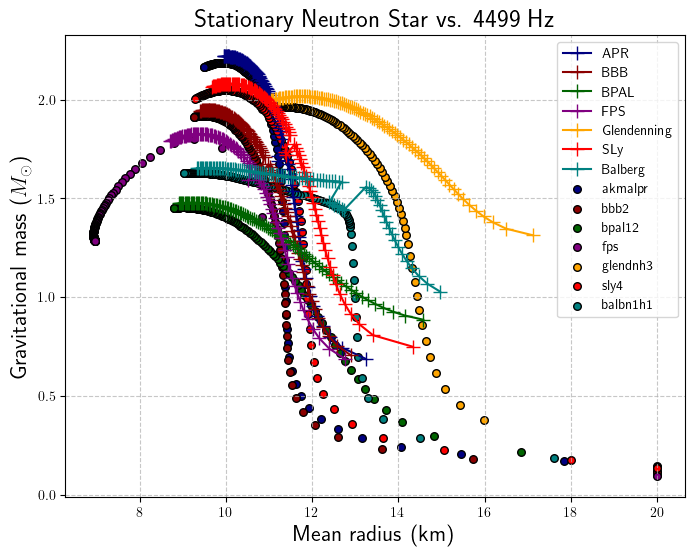

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from tqdm import tqdm
from scipy.integrate import solve_ivp
import pandas as pd
import os
import re
import csv

G = 6.6743e-8  # cm^3/g/s^2
c = 29979245800     # cm/s

# Array of EOS names
eos_names = ["akmalpr", 'bbb2', 'bpal12', 'fps', 'glendnh3', 'sly4', 'balbn1h1']
source_dir = '/home/sanjana/ashoka/thesis/EoS/'  # Directory containing EOS files

# Define markers and colors for different EOS
markers = ['+', '+', '+', '+', '+', '+', '+']
colors = ["navy", "darkred", "darkgreen", "purple", "orange", "red", "teal"]

eos_results = {}

# Loop over each EOS
for eos_name in eos_names:
    data = np.genfromtxt(f"{source_dir}eos_{eos_name}.txt", delimiter=None)
    baryon_density = data[:, 1]
    density = data[:, 2]
    pressure = data[:, 3]

    min_density = 2.4e14 #np.min(density) #1e14  # Lower bound on central density
    max_density = np.max(density)
    
    valid_indices = (density > 0) & (pressure > 0)
    density = density[valid_indices]
    pressure = pressure[valid_indices]
    baryon_density = baryon_density[valid_indices]
    
    log_density = np.log(density)
    log_pressure = np.log(pressure)

    log_pressure_to_log_density = CubicSpline(log_pressure, log_density, bc_type='natural')
    log_density_to_log_pressure = CubicSpline(log_density, log_pressure, bc_type='natural')

    def pressure_to_density(pressure):
        log_pressure = np.log(pressure)
        # Determine the valid range
        min_log_p, max_log_p = log_pressure_to_log_density.x[0], log_pressure_to_log_density.x[-1]
    
        # Clip values outside the interpolation range and show a warning
        if log_pressure < min_log_p or log_pressure > max_log_p:
            clipped_value = np.exp(np.clip(log_pressure, min_log_p, max_log_p))
            print(f"Warning: Extrapolation detected for pressure {pressure:.4e}, clipping to {clipped_value:.4e}.")
            log_pressure = np.clip(log_pressure, min_log_p, max_log_p)
    
        log_density = log_pressure_to_log_density(log_pressure)
        return np.exp(log_density)
    
    def density_to_pressure(density):
        log_density = np.log(density)
        # Determine the valid range
        min_log_rho, max_log_rho = log_density_to_log_pressure.x[0], log_density_to_log_pressure.x[-1]
    
        # Clip values outside the interpolation range and show a warning
        if log_density < min_log_rho or log_density > max_log_rho:
            clipped_value = np.exp(np.clip(log_density, min_log_rho, max_log_rho))
            print(f"Warning: Extrapolation detected for density {density:.4e}, clipping to {clipped_value:.4e}.")
            log_density = np.clip(log_density, min_log_rho, max_log_rho)
    
        log_pressure = log_density_to_log_pressure(log_density)
        return np.exp(log_pressure)

    # TOV equations
    def compute_derivatives(r, state_vars):
        mass, pressure = state_vars

        if pressure <= 1e-18 * density_to_pressure(min_density):  # Stop condition
            return [0, 0]

        density = pressure_to_density(pressure)
        dm_dr = 4.0 * np.pi * (r**2) * density
        dP_dr = -(((G * mass * density) / (r**2)) * (1 + (pressure / (density * c * c))) *
                  (1 + ((4 * np.pi * pressure * (r**3)) / (mass * c * c)))) / (1 - ((2 * G * mass) / (r * c * c)))
        return [dm_dr, dP_dr]

    # Stopping condition for solve_ivp
    def pressure_stop_condition(r, y):
        threshold_pressure = 1e-18 * density_to_pressure(min_density)
        #print(f"Threshold pressure: {threshold_pressure:.4e}")
        #print(f"Checking stop condition at r={r:.2f} cm: P={y[1]:.4e}, threshold={threshold_pressure:.4e}")
        return y[1] - threshold_pressure  # Stop when P < threshold

    pressure_stop_condition.terminal = True  # Stop integration
    pressure_stop_condition.direction = -1  # Stop when pressure is decreasing
    
    # Solve the neutron star structure
    def solve_neutron_star_structure(central_density, eos_type):
        initial_pressure = density_to_pressure(central_density)
        state_variables_initial = [1e-10, initial_pressure]  # Small initial mass

        sol = solve_ivp(compute_derivatives, [1e-2, 2e6], state_variables_initial, method="RK45", rtol=1e-5, atol=1e-5, events=pressure_stop_condition, dense_output=False) 

        # Determine stopping radius
        if sol.status == 1 and sol.t_events[0].size > 0:  
            stopping_radius = sol.t_events[0][0]  # Stopping point due to pressure threshold
            print(f"Stopped at r={stopping_radius:.4f} cm due to pressure threshold.")
        else:
            stopping_radius = sol.t[-1]  # If not stopped by event, take last value
            print("Solve_ivp reached the maximum radius without stopping.")

        final_radius = stopping_radius  # cm
        final_mass = sol.y[0, -1]  # g
    
        return final_radius, final_mass
    
    central_densities = np.linspace(min_density, max_density, 100)
    results = np.zeros([2, len(central_densities)])

    for i in tqdm(range(len(central_densities)), desc=f"Processing {eos_name}"):
        results[:, i] = solve_neutron_star_structure(central_densities[i], eos_name)
    
    eos_results[eos_name] = (central_densities, results[0,] / 1e5, results[1,] / 1.989e33)

    radius = results[0,] / 1e5  # Convert to km
    mass = results[1,] / 1.989e33  # Convert to solar masses
    eos_results[eos_name] = (central_densities, radius, mass)

##############################################################################################

# Dictionary for pretty axis labels
units = {
    "Central enthalpy": r"Log Central enthalpy (c$^2$)",
    "Central proper baryon density": r"Log Central baryon density (g/cm$^3$)",
    "Gravitational mass": r"Gravitational mass ($M_\odot$)",
    "Mean radius": r"Mean radius (km)",
    "Moment of inertia": r"Moment of inertia (10$^{45}$ gcm$^2$)",
    "Compactness": r"Compactness (GM/Rc$^2$)"
}

# Define colors and markers for distinction
colors = ["navy", "darkred", "darkgreen", "purple", "orange", "red", "teal"]
marker_size = 10  # Reduce marker size here

#################################################################

# List of EOS files and their labels (Stationary Neutron Star)
eos_files_stationary = {
    "APR": "Nrotstar_(APR100)_(0.06-0.9)_4499Hz_nrot_extracted_data.csv",
    "BBB": "Nrotstar_(BBB100)_(0.05-0.8)_4499Hz_nrot_extracted_data.csv",
    "BPAL": "Nrotstar_(BPAL100)_(0.06-0.6)_4499Hz_nrot_extracted_data.csv",
    "FPS": "Nrotstar_(FPS100)_(0.04-0.9)_4499Hz_nrot_extracted_data.csv",
    "Glendenning": "Nrotstar_(Glendenning100)_(0.06-0.68)_4499Hz_nrot_extracted_data.csv",
    "SLy": "Nrotstar_(SLy100)_(0.04-0.9)_4499Hz_nrot_extracted_data.csv",
    "Balberg": "Nrotstar_(Balberg100)_(0.08-0.7)_4499Hz_nrot_extracted_data.csv"
}

# Column pairs for plotting
columns = [
    ("Mean radius", "Gravitational mass"),
]

# Plot for stationary neutron stars
for x_col, y_col in columns:
    plt.figure(figsize=(8,6))

    for (eos, file), color, marker in zip(eos_files_stationary.items(), colors, markers):
        df = pd.read_csv(file)
        
        # Convert numeric columns properly
        for col in df.columns:
            try:
                df[col] = pd.to_numeric(df[col])
            except ValueError:
                pass  # Ignore non-numeric columns

        # Filter out invalid values
        df = df[(df[x_col] != "N/A") & (df[y_col] != "N/A")]
        df[x_col] = df[x_col].astype(float)
        df[y_col] = df[y_col].astype(float)

        # Plot data with reduced marker size
        plt.plot(df[x_col], df[y_col], marker=marker, linestyle="-", color=color, 
                 label=eos, markersize=marker_size)

    plt.xlabel(units.get(x_col, x_col), fontsize=16)
    plt.ylabel(units.get(y_col, y_col), fontsize=16)
    plt.title("Stationary Neutron Star vs. 4499 Hz", fontsize=18)
    plt.legend(title="EOS Models", fontsize=12)
    plt.grid(linestyle='--', alpha=0.7)

##############################################################################################
markers = ["o", "o", "o", "o", "o", "o", "o"]
#plt.figure()
#plt.title(r"Stationary NS Plot: Mass vs Radius")
#plt.ylabel(r"Mass of the Star [$M_\odot$]")
#plt.xlabel(r"Radius of the Star [km]")

for eos_name, (central_densities, radius, mass), marker, color in zip(eos_results.keys(), eos_results.values(), markers, colors):
    plt.scatter(radius, mass, label=f"{eos_name}", marker=marker, color=color, s=30, edgecolor="black")
plt.legend()
plt.savefig("MvsRStat_Comparison_nrot_4499_2.png", dpi=300)
plt.show()